In [97]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [98]:
import os, time
import matplotlib.pyplot as plt
import itertools
import pickle
import imageio
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchvision
import torchvision.utils as vutils
import cv2

from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import torchvision.datasets as dset
from torch.utils.data import DataLoader
import torch.utils.data as data
from torch.utils.data import Dataset, TensorDataset

In [99]:
def read_images(dataset_path):
    # Image Parameters
    image_height = 14 #CHANGE HERE, the image height to be resized to
    image_width = 14 #CHANGE HERE, the image width to be resized to

    imagepaths, labels = list(), list()

    # An ID will be affected to each sub-folders by alphabetical order
    label = 0
    # List the directory
    try:  # Python 2
        classes = sorted(os.walk(dataset_path).next()[1])
    except Exception:  # Python 3
        classes = sorted(os.walk(dataset_path).__next__()[1])

    # List each sub-directory (the classes)
    for c in classes:
        c_dir = os.path.join(dataset_path, c)

        try:  # Python 2
            walk = os.walk(c_dir).next()

        except Exception:  # Python 3
            walk = os.walk(c_dir).__next__()
        # Add each image to the training set

        for sample in walk[2]:
            # Only keeps jpeg images
            if sample.endswith('.jpg'):
                img = cv2.imread(os.path.join(c_dir, sample))
                img = cv2.resize(img,(image_height,image_width),interpolation = cv2.INTER_AREA)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                imagepaths.append(img)
                labels.append(label)

        label += 1

    print (len(imagepaths))
    print (len(labels))

    return imagepaths, labels

In [100]:
def read_orignalimages(dataset_path):
    # Image Parameters
    image_height = 14 #CHANGE HERE, the image height to be resized to
    image_width = 14 #CHANGE HERE, the image width to be resized to

    imagepaths, labels = list(), list()

    # An ID will be affected to each sub-folders by alphabetical order
    label = 0
    # List the directory
    try:  # Python 2
        classes = sorted(os.walk(dataset_path).next()[1])
    except Exception:  # Python 3
        classes = sorted(os.walk(dataset_path).__next__()[1])

    # List each sub-directory (the classes)
    for c in classes:
        c_dir = os.path.join(dataset_path, c)

        try:  # Python 2
            walk = os.walk(c_dir).next()

        except Exception:  # Python 3
            walk = os.walk(c_dir).__next__()
        # Add each image to the training set

        for sample in walk[2]:
            # Only keeps jpeg images
            if sample.endswith('.png'):
                img = cv2.imread(os.path.join(c_dir, sample))
                img = cv2.resize(img,(image_height,image_width),interpolation = cv2.INTER_AREA)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                imagepaths.append(img)
                labels.append(label)

        label += 1

    print (len(imagepaths))
    print (len(labels))

    return imagepaths, labels

In [101]:
Orignal_Path=r'D:\Faheem\Resized orignalk\Test Orignal'
LL_Path = r'D:\Faheem\MNIST\TEst\LL Test' #The dataset file or root folder path.
LH_Path = r'D:\Faheem\MNIST\TEst\LH Test'
HL_Path = r'D:\Faheem\MNIST\TEst\HL Test' #The dataset file or root folder path.
HH_Path = r'D:\Faheem\MNIST\TEst\HH Test'#The dataset file or root folder path.
LL_input, LLy_input = read_images(LL_Path)
LH_input, LHy_input = read_images(LH_Path)
HL_input, HLy_input = read_images(HL_Path)
HH_input, HHy_input = read_images(HH_Path)
Orignal_input, Orignaly_input=read_orignalimages(Orignal_Path)

LL_input = np.asarray(LL_input)
#X_input = (X_input.astype(np.float32) - 127.5) / 127.5
LL_input = (LL_input.astype(np.float32) - LL_input.mean()) / LL_input.std()
LL_input = LL_input.astype(np.float32)
LL_input = np.expand_dims(LL_input, axis=1)
LL_input = torch.tensor(LL_input)

LH_input = np.asarray(LH_input)
#X_target = (X_target.astype(np.float32) - 127.5) / 127.5
LH_input = (LH_input.astype(np.float32) - LH_input.mean()) / LH_input.std()
LH_input = LH_input.astype(np.float32) 
LH_input = np.expand_dims(LH_input, axis=1)
LH_input = torch.tensor(LH_input)

HL_input = np.asarray(HL_input)
#X_target = (X_target.astype(np.float32) - 127.5) / 127.5
HL_input = (HL_input.astype(np.float32) - HL_input.mean()) / HL_input.std()
HL_input = HL_input.astype(np.float32) 
HL_input = np.expand_dims(HL_input, axis=1)
HL_input = torch.tensor(HL_input)

HH_input = np.asarray(HH_input)
#X_target = (X_target.astype(np.float32) - 127.5) / 127.5
HH_input = (HH_input.astype(np.float32) - HH_input.mean()) / HH_input.std()
HH_input = HH_input.astype(np.float32) 
HH_input = np.expand_dims(HH_input, axis=1)
HH_input = torch.tensor(HH_input)

Orignal_input = np.asarray(Orignal_input)
#X_target = (X_target.astype(np.float32) - 127.5) / 127.5
Orignal_input = (Orignal_input.astype(np.float32) - Orignal_input.mean()) / Orignal_input.std()
Orignal_input= Orignal_input.astype(np.float32) 
Orignal_input = np.expand_dims(Orignal_input, axis=1)
Orignal_input = torch.tensor(Orignal_input)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [102]:
class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        x = self.tensors[0][index]
        if self.transform:
            x = self.transform(x)

        y = self.tensors[1][index]
        w = self.tensors[2][index]
        h = self.tensors[3][index]
        z = self.tensors[4][index]
      
        return x, y,w,h,z

    def __len__(self):
        return self.tensors[0].size(0)

In [103]:
def min_max_normalization(tensor):
    min_tensor = tensor.min()
    tensor = (tensor - min_tensor)
    max_tensor = tensor.max()
    tensor = tensor / max_tensor
    tensor = tensor * (1 - 0) + 0
    return tensor


In [104]:
#final_train_data = []
#final_train_data.append(LL_input)
#final_train_data.append(LH_input)
#final_train_data.append(HL_input)
#final_train_data.append(HH_input)
#dataset_f = torch.utils.data.ConcatDataset(final_train_data)
train_dataset_normal = CustomTensorDataset(tensors=(LL_input, LH_input,HL_input,HH_input,Orignal_input), transform=None)
train_loader = torch.utils.data.DataLoader(train_dataset_normal , batch_size=200)
print(len(train_loader))

10000


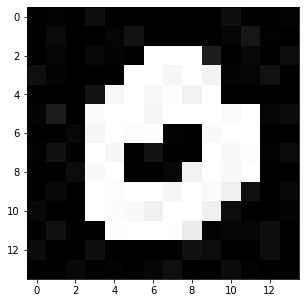

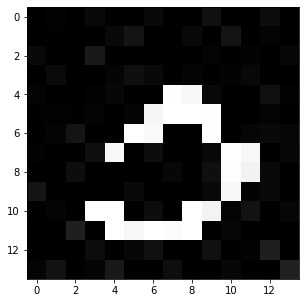

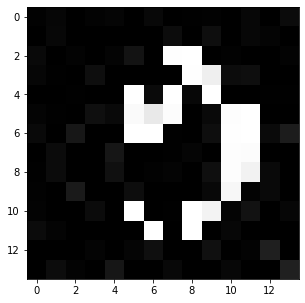

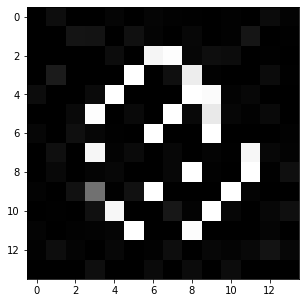

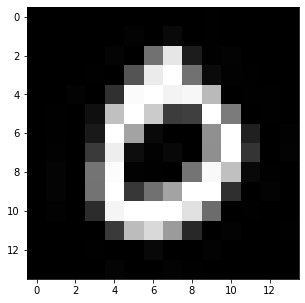

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
LL_input, LH_input, HL_input, HH_input, Orignal_input = dataiter.next()


LL_input = LL_input.numpy()

# get one image from the batch
img = np.squeeze(LL_input[0])
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

LH_input = LH_input.numpy()

# get one image from the batch
img = np.squeeze(LH_input[0])
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

HL_input = HL_input.numpy()

# get one image from the batch
img = np.squeeze(HL_input[0])
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

HH_input = HH_input.numpy()

# get one image from the batch
img = np.squeeze(HH_input[0])
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

Orignal_input = Orignal_input.numpy()


# get one image from the batch
img = np.squeeze(Orignal_input[0])
fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [106]:
class Classifier(nn.Module):
    
    def __init__(self, D_in, H1, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.dropout1 = nn.Dropout(0.2)
        self.linear2 = nn.Linear(H1, D_out)
        self.softmax = torch.nn.Softmax(dim=1)
    def forward(self, x):
        x = F.leaky_relu(self.linear1(x)) 
        x = self.dropout1(x)
        # we need raw output in case of multiclass classification so not using any activation function
        x = self.linear2(x)
        x = self.softmax(x)
        return x
model1 = Classifier(196, 20, 10)
model2 = Classifier(196, 20, 10)
model3 = Classifier(196, 20, 10)
model4 = Classifier(196, 20, 10)
model5 = Classifier(196, 20, 10)

In [107]:
from numpy import ndarray
model1.load_state_dict(torch.load('D:\Faheem\model_save\WithDroput20\MNISTLL20%drop20softmax.pth'))
model2.load_state_dict(torch.load('D:\Faheem\model_save\WithDroput20\MNISTLH20%drop20softmax.pth'))
model3.load_state_dict(torch.load('D:\Faheem\model_save\WithDroput20\MNISTHL20%drop20softmax.pth'))
model4.load_state_dict(torch.load('D:\Faheem\model_save\WithDroput20\MNISTHH20%drop20softmax.pth'))
model5.load_state_dict(torch.load('D:\Faheem\model_save\WithDroput20\MNISTOrignal20%drop20softmax.pth'))
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
LL = ndarray((10000,10),float)
LH = ndarray((10000,10),float)
HL = ndarray((10000,10),float)
HH = ndarray((10000,10),float)
orignal = ndarray((10000,10),float)
i=0
for data in train_loader:
    #print("Length of data",len(data))
    LL_input,LH_input,HL_input,HH_input,Orignal_input = data
    LL_input = LL_input.view(LL_input.shape[0], -1)
    LH_input = LH_input.view(LH_input.shape[0], -1)
    HL_input = HL_input.view(HL_input.shape[0], -1)
    HH_input = HH_input.view(HH_input.shape[0], -1)
    Orignal_input = Orignal_input.view(Orignal_input.shape[0], -1) 
    #rint(Orignal_input.shape)
    output1 = model1(Orignal_input)
    #print(output1)
    arr=output1.data.cpu().numpy()
    #print(LL[:,:].shape)
    LL[:,:]=arr
    #print('Values in LL_Model',arr)
    np.savetxt("output1.csv",LL, delimiter=", ",header='0,1,2,3,4,5,6,7,8,9',newline='\n')
    _, pred1 = torch.max(output1, 1)
    output2 = model2(Orignal_input)
    arr1=output2.data.cpu().numpy()
    LH[:,:]=arr1
    np.savetxt("output2.csv", LH, delimiter=", ",header='0,1,2,3,4,5,6,7,8,9',newline='\n')
    _, pred2 = torch.max(output2, 1)
    output3 = model3(Orignal_input)
    arr3=output3.data.cpu().numpy()
    HL[:,:]=arr3
    np.savetxt("output3.csv", HL, delimiter=", ",header='0,1,2,3,4,5,6,7,8,9',newline='\n')
    _, pred3 = torch.max(output2, 1)
    output4 = model4(Orignal_input)
    arr4=output4.data.cpu().numpy()
    #print('Values in LH_Model',arr4)
    HH[:,:]=arr4
    _, pred4 = torch.max(output4, 1)
    np.savetxt("output4.csv", HH, delimiter=", ",header='0,1,2,3,4,5,6,7,8,9',newline='\n')
    output5 = model5(Orignal_input)
    arr5=output5.data.cpu().numpy()
    #print('Values in LH_Model',arr4)
    orignal[:,:]=arr5
    _, pred5 = torch.max(output5, 1)
    np.savetxt("output5.csv", orignal, delimiter=", ",header='0,1,2,3,4,5,6,7,8,9',newline='\n')
    #print(orignal)
    print(len(Orignal_input))
    print('Class Prediction Using LL-Band=',pred1)
    print('Class Prediction Using LH-Band=',pred2)
    print('Class Prediction Using HL-Band=',pred3)
    print('Class Prediction Using HH-Band=',pred4)
    print('Class Prediction Using Orignal_Images=',pred5)
    y=output1+output2+output3+output4
    y=y/4
    print('Average Value of Bands= \n',y)
    print('Maximum Value with class= \n',torch.max(y,1))
    i=i+1
    
   ## np.savetxt("output1.csv", output1.data.cpu().numpy(), delimiter=", ",newline='\r\n')
   # np.savetxt("output2.csv", output2.data.cpu().numpy(), delimiter=", ",newline='\r\n')
   # np.savetxt("output3.csv", output3.data.cpu().numpy(), delimiter=", ",newline='\r\n')
   # np.savetxt("output4.csv", output4.data.cpu().numpy(), delimiter=", ",newline='\r\n')
   # print("Writing complete")




1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 2.0596e-25, 1.4972e-04, 4.3114e-08, 8.6830e-19, 6.2989e-10,
         1.2871e-10, 2.8596e-08, 7.4971e-01, 1.4017e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7497], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2739e-07, 9.0519e-17, 2.5714e-01, 4.9290e-01, 1.0354e-18, 5.1074e-11,
         1.7622e-18, 5.3805e-09, 2.4996e-01, 1.6008e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.9740e-01, 6.1804e-22, 7.8787e-10, 2.4988e-01, 5.2247e-20, 3.2347e-04,
         1.5121e-09, 1.0421e-14, 2.5240e-01, 9.5680e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4974], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.8946e-01, 3.1465e-24, 6.5122e-06, 2.5000e-01, 1.8693e-20, 7.4090e-08,
         9.2725e-06, 1.6367e-13, 2.6053e-01, 1.0174e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5231e-01, 1.6139e-19, 1.0783e-07, 2.5001e-01, 7.6273e-17, 1.6529e-06,
         2.4655e-01, 2.0962e-14, 2.5113e-01, 3.0028e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2523], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4909e-01, 7.8824e-20, 4.0095e-02, 2.4996e-01, 1.8392e-15, 4.6073e-07,
         6.3834e-12, 4.8540e-08, 4.6086e-01, 1.6552e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5065e-01, 9.8484e-23, 2.4509e-01, 2.5000e-01, 8.3087e-20, 4.2571e-03,
         4.6889e-10, 3.8110e-15, 2.5000e-01, 6.8443e-22]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2506], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.2854e-04, 1.7382e-14, 1.5928e-02, 2.5136e-05, 2.0996e-05, 7.8224e-05,
         7.0913e-01, 1.4686e-08, 2.5185e-01, 2.2844e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.6059e-03, 5.1177e-21, 3.7061e-04, 8.8507e-05, 9.6844e-12, 1.5060e-10,
         1.4485e-07, 3.1993e-07, 9.1916e-01, 7.3779e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9192], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.6727e-08, 4.2175e-23, 1.1861e-05, 1.8354e-08, 9.6607e-17, 2.9374e-07,
         2.0290e-13, 7.6991e-12, 9.9999e-01, 1.5769e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.2293e-03, 1.4539e-22, 2.5000e-01, 2.5011e-01, 8.5972e-23, 4.0247e-08,
         1.2614e-21, 5.9543e-12, 4.9465e-01, 5.9904e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4947], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([0])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.4417e-01, 1.8377e-13, 1.7333e-08, 2.4999e-01, 1.0808e-12, 2.4940e-04,
         5.7940e-07, 4.5483e-13, 5.5856e-03, 2.5091e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[1.6412e-01, 3.8647e-22, 5.6838e-05, 3.5064e-04, 1.9112e-15, 1.2190e-07,
         2.1273e-07, 6.5717e-08, 8.3534e-01, 1.2982e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8353], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[1.6363e-01, 2.0619e-15, 1.7850e-03, 1.2017e-05, 4.9637e-10, 1.2867e-01,
         9.6494e-02, 7.5589e-14, 6.0941e-01, 4.2808e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.0354e-01, 1.2599e-17, 4.2137e-07, 2.5000e-01, 7.3252e-16, 3.1681e-03,
         6.9400e-05, 8.6335e-18, 2.4323e-01, 5.6029e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5035], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.8458e-01, 5.0037e-25, 1.2338e-06, 4.5405e-10, 6.7738e-16, 1.2305e-03,
         4.3153e-07, 2.9790e-14, 5.1418e-01, 4.2387e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.8507e-08, 2.2077e-13, 3.1308e-01, 4.3525e-01, 7.1335e-13, 3.0124e-10,
         1.4850e-13, 7.2916e-06, 2.5166e-01, 1.2810e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4353], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.8609e-03, 3.3777e-22, 2.3722e-07, 1.5659e-07, 8.0168e-15, 6.7803e-08,
         2.7147e-11, 4.1800e-09, 9.9803e-01, 1.0846e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4980e-01, 6.0017e-26, 3.9369e-06, 4.2085e-08, 3.6059e-16, 2.3805e-06,
         1.6706e-08, 1.1093e-12, 7.4703e-01, 3.1670e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7470], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 6.6123e-24, 2.9868e-03, 2.2396e-05, 2.0982e-13, 7.1368e-06,
         5.6910e-04, 4.0374e-13, 7.4220e-01, 4.2126e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.3501e-01, 3.8669e-29, 1.8795e-09, 1.4098e-10, 3.8845e-14, 2.3825e-08,
         5.9195e-10, 7.9229e-16, 7.6499e-01, 1.5254e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7650], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.7963e-02, 1.4211e-17, 7.6029e-06, 1.9545e-01, 4.7966e-12, 4.0884e-02,
         2.8267e-10, 3.8022e-08, 7.2570e-01, 8.3190e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4996e-01, 2.3418e-19, 2.9814e-05, 2.3941e-01, 1.7240e-17, 6.5313e-06,
         2.3082e-11, 7.6879e-08, 5.1045e-01, 1.4589e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5105], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4951e-01, 2.4863e-24, 1.4952e-04, 4.2848e-10, 1.7423e-11, 8.0118e-08,
         6.3581e-09, 4.2870e-14, 7.5034e-01, 4.6096e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5494e-01, 7.0282e-19, 1.2477e-01, 1.3211e-01, 5.3879e-13, 6.3678e-02,
         1.7593e-02, 7.9398e-13, 4.0692e-01, 1.4796e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4069], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([0])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.7725e-01, 1.1179e-10, 2.2175e-02, 2.4974e-01, 1.5862e-06, 1.6069e-01,
         2.9009e-01, 8.0358e-15, 5.8978e-05, 1.8757e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4883e-01, 1.5842e-27, 3.2621e-07, 2.5731e-04, 5.0302e-25, 1.8530e-03,
         6.9878e-19, 6.6663e-17, 7.4905e-01, 3.4174e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7491], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4363e-01, 2.3879e-13, 2.2363e-01, 2.5407e-01, 8.3595e-15, 1.3887e-06,
         6.0005e-06, 8.6779e-09, 2.7865e-01, 6.6397e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 9.3207e-28, 1.7011e-04, 8.0974e-11, 1.2415e-18, 1.3836e-09,
         5.0004e-13, 9.5358e-17, 7.4983e-01, 9.1438e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7498], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5001e-01, 7.0265e-28, 1.5162e-05, 8.0533e-12, 5.2579e-17, 3.4992e-07,
         3.7446e-07, 2.0792e-16, 7.4997e-01, 7.1489e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4949e-01, 1.5023e-21, 1.2643e-03, 1.7224e-01, 5.8682e-17, 2.7988e-05,
         3.9375e-10, 1.3494e-11, 5.7698e-01, 1.6061e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5770], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.6654e-06, 4.9646e-27, 1.1578e-03, 1.3217e-01, 1.2399e-20, 3.5609e-04,
         1.6773e-16, 2.6067e-15, 8.6631e-01, 6.5064e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.3811e-01, 1.1874e-19, 4.8523e-08, 2.0284e-01, 3.7606e-13, 1.9206e-04,
         1.4556e-10, 6.5668e-09, 5.5885e-01, 3.6534e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5589], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.8876e-03, 2.8445e-26, 3.0915e-04, 8.7795e-07, 5.4374e-15, 6.7641e-12,
         1.6240e-09, 1.2389e-07, 9.1032e-01, 8.0479e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([5])
Class Prediction Using HL-Band= tensor([5])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[3.4035e-01, 1.4426e-26, 6.3248e-09, 2.3624e-01, 2.3003e-25, 1.7227e-01,
         2.5628e-12, 4.0703e-19, 2.5114e-01, 7.9146e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3404], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([0])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[7.0430e-01, 3.7483e-14, 1.5642e-04, 2.5000e-01, 7.6175e-08, 2.4162e-02,
         2.1301e-02, 3.8643e-14, 8.4615e-05, 2.3177e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4979e-01, 2.1296e-25, 2.4286e-01, 1.8975e-05, 4.0116e-19, 5.8228e-05,
         2.8753e-13, 4.5875e-13, 5.0727e-01, 1.4970e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5073], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([0])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.9671e-01, 5.5666e-10, 2.4560e-01, 2.5181e-01, 1.8068e-05, 3.9962e-03,
         5.7200e-07, 3.8308e-04, 1.4898e-03, 5.0184e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.4189e-01, 1.0683e-13, 2.1829e-01, 3.7391e-01, 1.0901e-17, 1.0842e-06,
         2.9262e-18, 4.1199e-07, 2.6591e-01, 4.2071e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3739], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.9771e-02, 6.2680e-18, 2.4491e-01, 2.5001e-01, 3.4923e-15, 4.1962e-03,
         3.3685e-13, 1.5282e-09, 4.6111e-01, 2.4044e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.3179e-01, 3.6938e-25, 2.8807e-06, 2.1590e-09, 5.3909e-13, 5.6244e-04,
         1.5709e-08, 2.6825e-10, 5.6763e-01, 1.4496e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5676], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[1.9979e-01, 2.1244e-10, 2.7467e-05, 2.0492e-02, 3.8135e-08, 5.1432e-03,
         1.1697e-04, 1.9435e-07, 7.7443e-01, 4.7665e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([0])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[6.2840e-01, 4.0406e-23, 3.0620e-03, 2.4652e-01, 4.0913e-15, 1.3733e-03,
         3.7464e-05, 1.2134e-10, 1.2061e-01, 5.7436e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6284], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.2041e-01, 5.6502e-17, 2.5019e-05, 3.9991e-06, 3.8181e-09, 2.9026e-06,
         5.8532e-06, 1.9913e-08, 8.7954e-01, 8.4743e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.2801e-03, 2.1067e-16, 2.5557e-01, 4.9026e-01, 2.4520e-17, 2.9568e-07,
         7.8667e-07, 3.9553e-10, 2.4989e-01, 1.1755e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4903], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5018e-01, 2.9923e-28, 2.1093e-03, 2.1057e-11, 2.1198e-21, 1.7803e-04,
         8.9469e-08, 3.9752e-20, 7.4753e-01, 6.2532e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([0])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[5.6920e-01, 1.5226e-19, 1.8349e-07, 3.1735e-11, 1.3945e-03, 9.0432e-06,
         1.6496e-03, 8.8439e-05, 1.4346e-01, 2.8420e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5692], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4813e-01, 5.6560e-17, 1.2938e-01, 2.5002e-01, 9.6041e-13, 2.3876e-07,
         1.8861e-06, 8.6936e-11, 3.7246e-01, 7.5198e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[7.2548e-01, 2.8295e-27, 5.3818e-07, 1.8361e-07, 1.0614e-18, 6.4200e-03,
         1.7423e-02, 1.1861e-16, 2.5067e-01, 6.8634e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7255], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4999e-01, 7.8994e-22, 2.5000e-01, 2.5001e-01, 2.8556e-19, 3.6750e-07,
         1.4010e-12, 2.7327e-14, 2.5000e-01, 4.8651e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.0864e-01, 3.2231e-19, 3.3791e-02, 2.5325e-01, 2.1317e-12, 1.6661e-08,
         3.0288e-12, 1.3671e-08, 5.0432e-01, 8.7329e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5043], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.2390e-01, 9.3073e-19, 2.8150e-06, 5.7251e-11, 1.3395e-03, 2.4813e-08,
         1.2922e-02, 2.3950e-04, 4.2020e-01, 3.4140e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.3479e-09, 1.5126e-29, 2.1031e-17, 4.2146e-15, 1.8156e-19, 1.4065e-06,
         1.9732e-19, 3.3987e-26, 1.0000e+00, 1.6668e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0900e-09, 2.0040e-25, 3.0605e-06, 6.4831e-08, 1.5365e-18, 1.4800e-08,
         4.9342e-16, 9.6524e-14, 1.0000e+00, 1.1240e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[1.9823e-01, 1.1407e-21, 1.4016e-05, 6.7064e-04, 1.3700e-22, 3.0881e-01,
         3.0234e-09, 2.2578e-18, 4.9227e-01, 1.5989e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4923], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[6.6062e-01, 2.0816e-29, 2.4914e-14, 7.6444e-13, 4.8027e-20, 1.2379e-04,
         2.3482e-10, 4.0943e-19, 3.3925e-01, 4.0505e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.9853e-01, 2.0398e-20, 1.3687e-11, 2.5764e-10, 2.3122e-14, 1.4844e-03,
         1.6967e-10, 8.2823e-16, 4.9999e-01, 1.1774e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.9243e-01, 4.0508e-12, 4.8958e-07, 5.1518e-03, 7.7538e-13, 1.9238e-01,
         8.6560e-10, 3.3039e-10, 5.1004e-01, 4.4661e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.9261e-01, 1.7220e-29, 1.6247e-07, 2.5769e-10, 1.4284e-21, 3.0048e-03,
         9.9169e-07, 1.5934e-22, 5.0438e-01, 3.4543e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5044], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.7248e-08, 1.6153e-29, 2.8153e-07, 9.7078e-11, 5.1396e-18, 4.0542e-13,
         4.4226e-14, 7.7398e-19, 1.0000e+00, 1.0136e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4999e-01, 1.5358e-19, 2.4977e-01, 2.5001e-01, 1.3228e-20, 3.4830e-05,
         3.9403e-18, 1.0088e-13, 2.5020e-01, 7.5208e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2502], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[5.3822e-01, 5.2855e-30, 1.8780e-11, 7.5329e-12, 3.4666e-27, 2.1177e-01,
         9.6812e-11, 6.5324e-16, 2.5000e-01, 1.1521e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5040e-08, 8.4826e-28, 6.1481e-08, 3.2698e-05, 2.8792e-20, 3.4864e-10,
         2.0455e-15, 6.7186e-18, 9.9997e-01, 8.1303e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.9042e-07, 1.0498e-29, 1.6439e-11, 7.0037e-10, 2.3774e-21, 1.0529e-09,
         1.7054e-16, 2.6213e-16, 1.0000e+00, 9.0862e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.6365e-03, 2.8332e-30, 2.2194e-01, 1.0406e-07, 3.2671e-17, 2.5127e-01,
         2.0488e-14, 3.7555e-22, 5.1815e-01, 7.3678e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5182], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([5])
Class Prediction Using HL-Band= tensor([5])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1679e-03, 7.8286e-27, 1.4200e-06, 2.4999e-01, 9.2317e-25, 2.5128e-01,
         5.3003e-23, 2.4641e-24, 4.9655e-01, 5.5733e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5026e-01, 8.8426e-27, 4.8267e-08, 3.4401e-08, 4.5717e-19, 1.3626e-03,
         2.4961e-01, 2.5138e-19, 4.9876e-01, 4.4824e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4988], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9033e-01, 8.7410e-24, 1.9903e-04, 5.9606e-02, 1.0947e-18, 2.8580e-05,
         4.8857e-14, 9.0108e-16, 7.4983e-01, 1.3900e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.9159e-01, 6.5670e-24, 4.2005e-09, 2.5000e-01, 8.9778e-18, 5.9931e-06,
         8.4026e-03, 4.2287e-18, 2.5000e-01, 1.3898e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4916], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.1972e-01, 1.6036e-20, 2.3973e-03, 1.7641e-03, 1.9376e-14, 2.2915e-02,
         3.1923e-03, 2.0381e-10, 2.5001e-01, 3.2572e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.8767e-02, 1.1019e-21, 2.3780e-01, 2.7436e-04, 3.1081e-17, 3.7635e-08,
         3.0302e-09, 7.5665e-06, 7.4311e-01, 4.0672e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7431], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 2.8789e-31, 2.8945e-07, 1.1861e-11, 6.2612e-28, 5.9217e-03,
         8.2452e-19, 3.3421e-17, 7.4408e-01, 3.7284e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5007e-01, 2.9448e-28, 1.0395e-06, 5.7553e-02, 1.1240e-27, 7.0662e-03,
         1.2262e-24, 2.7550e-15, 6.8531e-01, 9.0194e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6853], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 1.0914e-30, 2.2875e-01, 4.2944e-05, 6.6073e-32, 3.6041e-05,
         6.5629e-29, 6.8174e-19, 5.2117e-01, 1.6702e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.5593e-08, 8.9675e-28, 1.2442e-10, 1.3092e-09, 5.0997e-20, 2.9875e-07,
         2.4222e-15, 8.1414e-19, 1.0000e+00, 8.6254e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.0349e-10, 5.6952e-18, 9.5788e-06, 3.2126e-03, 5.5452e-14, 1.2139e-09,
         3.8312e-09, 1.2961e-13, 9.9675e-01, 2.3483e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5170e-01, 4.3570e-22, 1.4784e-01, 1.2879e-02, 1.5524e-26, 4.9846e-02,
         1.9668e-21, 1.2938e-14, 5.3774e-01, 7.2864e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5377], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5100e-01, 8.7538e-25, 2.6981e-04, 4.2764e-10, 2.2280e-13, 1.9225e-05,
         2.4581e-01, 3.9095e-16, 5.0290e-01, 1.7344e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.6363e-02, 4.8909e-17, 2.4469e-01, 5.0260e-01, 9.8635e-25, 1.2862e-06,
         1.7027e-23, 1.0008e-10, 2.0635e-01, 9.3172e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5026], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5462e-01, 1.9048e-21, 2.0440e-02, 2.5000e-01, 3.1611e-22, 4.0247e-08,
         3.9493e-16, 1.8702e-08, 3.7493e-01, 4.8447e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.5616e-05, 2.2541e-19, 2.9806e-06, 1.5780e-12, 1.3859e-04, 6.2561e-09,
         7.4984e-01, 3.0186e-06, 3.1685e-06, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7498], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 9.9908e-27, 2.3609e-14, 6.5118e-13, 2.9089e-18, 1.1443e-07,
         1.0211e-12, 9.7735e-11, 7.5000e-01, 1.6877e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4897e-01, 1.0311e-24, 1.3036e-04, 2.5000e-01, 3.8658e-18, 2.4533e-09,
         2.6851e-11, 1.2112e-13, 5.0090e-01, 6.9070e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5009], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3439e-01, 1.2074e-21, 2.5001e-01, 2.5054e-01, 3.7430e-16, 2.2778e-08,
         2.9660e-15, 2.8485e-12, 2.6506e-01, 2.2523e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.2883e-03, 1.5695e-23, 1.2982e-02, 4.8844e-03, 1.7528e-11, 7.7873e-10,
         1.7737e-05, 3.7039e-13, 9.7282e-01, 9.5084e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9728], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4996e-01, 1.3729e-24, 2.0320e-01, 4.0773e-06, 1.7123e-20, 3.1033e-05,
         5.1799e-15, 8.2075e-16, 5.4681e-01, 8.1337e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4551e-01, 6.2965e-22, 1.3579e-01, 2.2004e-05, 6.2050e-19, 6.3961e-03,
         3.2094e-06, 1.5094e-16, 6.1229e-01, 1.6833e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6123], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.3056e-01, 5.3174e-22, 2.4843e-01, 1.9432e-02, 1.4711e-19, 3.1828e-06,
         4.7645e-14, 3.3357e-12, 5.0157e-01, 6.8877e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.3256e-01, 7.8613e-24, 1.7345e-05, 7.7777e-08, 6.0617e-16, 4.0044e-03,
         8.9741e-03, 2.7257e-12, 5.5444e-01, 2.9019e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5544], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[7.3470e-01, 1.9147e-18, 3.2786e-11, 4.2490e-03, 4.0587e-19, 1.1010e-02,
         1.7883e-12, 3.9478e-07, 2.5000e-01, 4.3798e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[7.5027e-05, 5.1928e-22, 2.6488e-01, 1.0533e-03, 1.1102e-13, 2.1771e-14,
         3.6814e-09, 3.9496e-10, 7.3399e-01, 3.4111e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7340], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.2686e-02, 2.0451e-22, 1.9687e-05, 2.0711e-01, 5.4910e-19, 2.1391e-08,
         1.4320e-11, 8.8683e-13, 7.5019e-01, 1.0698e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.0913e-01, 1.2750e-13, 3.6896e-05, 1.6294e-06, 7.6260e-05, 5.4439e-04,
         4.0193e-02, 4.5453e-09, 7.5002e-01, 9.7949e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4995e-01, 8.7248e-25, 3.2787e-07, 1.7059e-06, 3.4994e-19, 5.2751e-08,
         5.1965e-12, 3.7297e-15, 7.5005e-01, 1.7481e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5065e-01, 2.7737e-23, 1.1899e-06, 1.3133e-04, 4.0202e-15, 7.3552e-02,
         9.2844e-06, 2.7473e-13, 6.7566e-01, 2.9979e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6757], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.8728e-01, 3.8612e-26, 5.5357e-04, 1.1038e-07, 1.9267e-18, 2.7075e-04,
         1.3436e-07, 2.0431e-17, 5.1190e-01, 2.5480e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 1.2814e-30, 7.1494e-03, 1.4298e-10, 8.9356e-28, 3.4021e-05,
         3.2012e-20, 2.5072e-17, 7.4282e-01, 1.1035e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7428], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 4.5604e-33, 3.3331e-09, 2.2749e-13, 1.0431e-24, 4.9024e-06,
         2.2908e-17, 2.5284e-13, 7.4999e-01, 4.1232e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 6.4632e-34, 1.8866e-09, 8.5453e-14, 1.6610e-25, 5.4683e-09,
         4.7722e-18, 2.4470e-18, 7.5000e-01, 3.1893e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4999e-01, 1.9751e-27, 1.6250e-02, 7.9423e-07, 1.3324e-25, 1.8668e-05,
         1.4266e-19, 4.6292e-19, 7.3374e-01, 3.5012e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 1.1728e-25, 3.3215e-11, 3.7602e-13, 1.3290e-10, 1.2539e-09,
         4.5880e-06, 1.8103e-08, 7.4988e-01, 1.1989e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7499], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 3.7049e-28, 9.3366e-08, 3.6610e-13, 6.6283e-19, 3.2405e-10,
         7.4425e-11, 6.8415e-14, 7.4998e-01, 2.4495e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[5.1605e-01, 1.4676e-28, 1.2463e-11, 1.1944e-11, 2.0249e-22, 1.4438e-02,
         3.0120e-07, 8.2347e-19, 4.6951e-01, 2.7685e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5161], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4800e-01, 2.1152e-15, 1.0564e-02, 2.9606e-09, 1.4674e-08, 1.9524e-03,
         1.4112e-04, 1.9596e-14, 7.3935e-01, 1.6027e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4453e-01, 1.4410e-20, 4.2883e-03, 9.8727e-04, 1.9591e-12, 9.9499e-06,
         3.3329e-06, 1.7075e-04, 5.3486e-01, 2.1515e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5349], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[5.0000e-01, 8.3212e-27, 1.9509e-13, 4.2081e-07, 4.4177e-28, 2.4942e-01,
         4.4612e-11, 5.9733e-18, 2.5059e-01, 5.6653e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[7.4976e-01, 1.1145e-22, 2.4332e-09, 1.3424e-08, 9.4604e-16, 2.0592e-05,
         1.4232e-04, 8.5887e-12, 2.5007e-01, 2.8526e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7498], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[6.8231e-01, 2.0885e-17, 2.9939e-04, 6.0390e-02, 1.9015e-09, 6.3412e-05,
         3.1390e-06, 1.8433e-08, 2.5368e-01, 3.2598e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.9618e-01, 1.8806e-27, 1.2041e-05, 2.5000e-01, 4.8312e-25, 7.6112e-06,
         5.7633e-11, 8.6467e-12, 2.5380e-01, 6.6026e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4962], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.8789e-01, 1.8406e-24, 8.9572e-08, 3.3485e-07, 7.3635e-16, 1.4332e-02,
         2.4721e-01, 1.8833e-17, 2.5057e-01, 9.0152e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[6.8331e-01, 1.3535e-23, 2.2946e-09, 2.6571e-10, 4.2830e-15, 5.4873e-04,
         6.6146e-02, 4.0906e-18, 2.5000e-01, 1.7390e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6833], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.4965e-02, 2.2659e-23, 7.0444e-05, 9.9150e-08, 1.8665e-16, 1.6756e-01,
         1.6537e-08, 8.7499e-16, 7.4740e-01, 7.1351e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.5299e-01, 1.6708e-28, 1.5566e-07, 9.4784e-09, 2.5160e-25, 2.1122e-06,
         6.2486e-09, 2.5626e-17, 5.4701e-01, 1.5812e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5470], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4897e-01, 1.0332e-25, 7.0424e-03, 5.2385e-06, 1.0895e-19, 1.0265e-03,
         1.2846e-11, 4.6062e-16, 7.4296e-01, 6.8114e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5651e-01, 8.0417e-12, 2.1269e-02, 4.4635e-01, 2.3229e-12, 1.6187e-05,
         1.3620e-05, 7.7431e-09, 1.7585e-01, 5.3102e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4463], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.8716e-01, 3.7827e-22, 3.9918e-06, 1.1127e-03, 4.5128e-19, 6.6283e-03,
         1.4813e-07, 3.9739e-14, 5.0510e-01, 1.7751e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 6.2265e-33, 1.9206e-01, 2.4084e-10, 2.7663e-28, 1.7469e-09,
         6.6825e-19, 8.8354e-15, 5.5794e-01, 5.1211e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5579], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5000e-01, 1.2636e-27, 2.5000e-01, 2.5000e-01, 5.3349e-30, 2.6909e-09,
         1.5450e-26, 1.9700e-19, 2.5000e-01, 7.4945e-25]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.9650e-01, 1.2683e-28, 3.7436e-13, 7.6562e-12, 7.1675e-23, 1.9020e-04,
         1.6974e-18, 5.6125e-16, 5.0326e-01, 5.2413e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5033], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.9981e-01, 1.7821e-28, 9.3607e-11, 3.6031e-03, 1.1013e-29, 2.4650e-01,
         2.1966e-19, 1.6381e-16, 2.5009e-01, 9.6388e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[3.9981e-01, 1.3035e-24, 3.5595e-02, 2.4979e-01, 1.3560e-25, 1.1494e-03,
         2.1478e-15, 1.7346e-13, 3.1365e-01, 6.7215e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3998], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.9995e-01, 5.5067e-22, 1.9819e-01, 2.4975e-01, 7.9510e-24, 4.6959e-02,
         9.9889e-16, 1.0092e-13, 2.0515e-01, 3.6000e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1639e-01, 1.9796e-15, 6.6262e-02, 2.8116e-01, 2.8937e-14, 8.0004e-07,
         1.2222e-13, 1.7854e-08, 4.3618e-01, 4.8541e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4362], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5000e-01, 5.8426e-23, 2.5000e-01, 2.5000e-01, 1.0560e-20, 1.0820e-08,
         9.2637e-19, 9.5517e-16, 2.5000e-01, 1.1579e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.5000e-01, 1.5678e-25, 1.3681e-01, 1.5378e-03, 4.8222e-21, 8.4838e-11,
         6.1821e-18, 1.8719e-11, 6.1165e-01, 1.0710e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6116], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[4.9701e-01, 7.1573e-23, 1.4546e-01, 8.1923e-08, 1.3032e-15, 2.5080e-02,
         7.1527e-07, 7.8378e-15, 3.3245e-01, 9.4364e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[7.4311e-01, 1.6991e-17, 3.1767e-11, 1.6641e-06, 1.0182e-17, 6.8576e-03,
         2.0211e-12, 2.1767e-12, 2.5003e-01, 6.9907e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7431], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5000e-01, 4.5691e-28, 2.5915e-07, 2.9395e-09, 5.4180e-28, 1.4115e-06,
         2.8473e-22, 1.8613e-14, 7.5000e-01, 2.4184e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[6.4940e-03, 2.6432e-15, 2.0525e-07, 2.8700e-03, 4.2182e-09, 5.5226e-02,
         1.5021e-03, 1.6780e-12, 9.3387e-01, 3.9666e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9339], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.4998e-01, 1.4683e-23, 1.0699e-08, 6.3341e-07, 4.7329e-15, 7.9479e-08,
         1.3244e-10, 2.8727e-17, 7.5002e-01, 1.1142e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[5.6464e-01, 1.5829e-16, 5.3112e-06, 6.5335e-04, 2.2230e-15, 1.8465e-01,
         7.7644e-06, 1.2850e-16, 2.5004e-01, 5.5015e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5646], grad_fn=<MaxBackward0>),
indices=tensor([0]))
1
Class Prediction Using LL-Band= tensor([0])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[3.2822e-01, 7.8945e-29, 9.0903e-09, 4.6040e-08, 1.8807e-27, 1.6922e-01,
         1.4898e-17, 2.0143e-17, 5.0257e-01, 1.0390e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.5279e-14, 1.8117e-01, 2.2649e-02, 2.7587e-03, 1.5826e-07, 3.7723e-06,
         5.5685e-04, 1.1891e-09, 7.6175e-01, 3.1114e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7617], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.3614e-07, 3.6832e-05, 1.3785e-06, 4.2308e-04, 7.3923e-09, 4.2142e-04,
         2.8684e-06, 8.9550e-12, 9.9911e-01, 5.4910e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2480e-16, 1.5117e-04, 1.3533e-01, 1.6581e-01, 6.5501e-12, 8.5024e-10,
         1.3460e-09, 2.3772e-08, 6.9871e-01, 9.2670e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6987], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.6910e-19, 1.5943e-05, 6.7217e-05, 7.6705e-05, 1.0420e-13, 6.8267e-12,
         6.4493e-10, 3.5098e-14, 9.9984e-01, 1.0032e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[7.5510e-17, 2.2353e-03, 1.1772e-01, 7.4243e-03, 6.0369e-12, 1.5746e-10,
         1.3488e-06, 6.0244e-12, 8.7262e-01, 5.1552e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8726], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.7468e-14, 3.9029e-02, 3.7137e-01, 5.0195e-02, 2.6802e-10, 2.3441e-07,
         2.7744e-06, 1.1865e-07, 5.3939e-01, 1.6724e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[2.4047e-15, 5.7927e-03, 2.5098e-01, 5.0584e-03, 3.6217e-11, 2.5678e-09,
         2.0435e-08, 5.8659e-07, 7.3817e-01, 6.4783e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7382], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.4764e-09, 2.4889e-01, 4.2455e-02, 1.5107e-01, 3.6734e-06, 1.2254e-03,
         3.6730e-02, 2.0196e-07, 4.6631e-01, 5.3314e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.8213e-17, 6.0689e-03, 2.5027e-04, 3.4665e-05, 1.0528e-09, 7.9709e-10,
         1.1415e-07, 7.3926e-11, 9.9365e-01, 3.8799e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9936], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[5.5152e-10, 2.4940e-01, 1.0213e-02, 2.9716e-04, 2.7547e-06, 2.8095e-05,
         2.3072e-03, 4.0276e-09, 7.3548e-01, 2.2715e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[2.0284e-08, 2.4996e-01, 3.0390e-02, 1.8893e-03, 5.5137e-05, 8.6450e-04,
         4.7487e-02, 3.8492e-07, 4.7460e-01, 1.9476e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4746], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.0703e-19, 4.4117e-05, 1.2048e-03, 4.4341e-02, 9.8665e-13, 4.1031e-10,
         5.6614e-08, 6.9236e-11, 9.5439e-01, 1.5374e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[5.1491e-20, 3.9803e-06, 2.3571e-01, 7.4470e-05, 1.0469e-15, 7.1232e-15,
         6.1013e-10, 4.0887e-14, 7.6421e-01, 4.4312e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7642], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.4122e-15, 7.7947e-05, 2.1505e-01, 6.0188e-02, 1.6191e-13, 9.0541e-09,
         3.6461e-10, 9.0870e-08, 7.2468e-01, 2.9964e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.9218e-13, 2.0575e-01, 2.2960e-01, 3.5650e-02, 3.0665e-10, 3.7339e-06,
         5.0923e-04, 5.7988e-08, 5.2820e-01, 2.9069e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5282], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1376e-13, 4.5258e-02, 4.7769e-04, 3.4549e-03, 4.9645e-09, 3.7309e-05,
         1.3290e-05, 2.2323e-09, 9.5016e-01, 6.0081e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.8074e-08, 2.2756e-01, 9.6537e-05, 1.8483e-03, 3.7276e-06, 1.4625e-03,
         3.6721e-05, 1.4504e-07, 7.6014e-01, 8.8552e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7601], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.2571e-09, 2.4941e-01, 2.5765e-02, 4.4563e-02, 3.1727e-05, 6.9512e-03,
         2.1662e-03, 3.1855e-06, 5.9189e-01, 7.9220e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[7.2849e-09, 1.1195e-03, 1.2870e-04, 2.8215e-02, 1.3770e-08, 5.5134e-06,
         2.0796e-09, 1.0778e-06, 9.7053e-01, 1.3110e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9705], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[6.0457e-07, 2.4982e-01, 1.5487e-04, 9.7416e-05, 2.5516e-04, 3.0849e-04,
         4.4804e-05, 4.9727e-07, 6.8727e-01, 6.2047e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.6714e-14, 1.6524e-04, 1.4191e-01, 8.1911e-02, 1.2715e-11, 8.4938e-11,
         2.7013e-10, 1.3090e-07, 7.7602e-01, 3.9924e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7760], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[5.4555e-12, 2.3722e-01, 2.8046e-01, 2.0670e-02, 1.6179e-07, 3.4982e-05,
         8.0097e-04, 2.7534e-06, 4.6061e-01, 2.1144e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.9833e-18, 1.6735e-06, 2.4931e-01, 1.3691e-03, 5.5042e-16, 2.2212e-11,
         9.7437e-13, 2.1940e-10, 7.4932e-01, 7.1921e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7493], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[5.1335e-13, 2.4883e-01, 2.0023e-02, 4.4137e-05, 4.5055e-08, 1.2204e-06,
         1.3083e-04, 2.5678e-10, 7.3039e-01, 5.8160e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.6160e-13, 2.1982e-01, 1.5424e-01, 6.9214e-03, 1.0693e-09, 1.0234e-07,
         6.6620e-06, 3.2210e-08, 6.1901e-01, 3.8295e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6190], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[2.9117e-09, 2.5642e-01, 1.2976e-01, 1.0177e-01, 2.5241e-05, 2.4016e-03,
         1.6358e-03, 2.4187e-04, 4.7429e-01, 3.3460e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.8000e-25, 3.2856e-14, 2.5001e-01, 2.2301e-02, 5.5118e-14, 8.5825e-15,
         1.2042e-09, 6.5862e-19, 7.2764e-01, 5.3832e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7276], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[2.4353e-09, 2.4695e-01, 8.1486e-02, 3.6803e-03, 1.6151e-05, 1.6649e-04,
         6.8585e-02, 2.8573e-08, 5.9516e-01, 3.9547e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.6034e-12, 2.4682e-04, 3.3993e-06, 2.6724e-02, 5.3417e-08, 1.4177e-05,
         5.5131e-05, 1.3636e-11, 9.6105e-01, 1.1911e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9610], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[7.0033e-18, 1.1227e-01, 2.1183e-02, 2.4389e-01, 5.7684e-06, 1.4874e-04,
         1.9913e-03, 2.3432e-09, 6.2030e-01, 2.1149e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7921e-15, 7.7156e-02, 1.4977e-01, 4.0178e-03, 6.9648e-12, 2.7154e-10,
         7.2718e-07, 3.6981e-09, 7.6906e-01, 7.9173e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7691], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[9.0530e-11, 2.0607e-01, 1.2299e-01, 5.0422e-04, 2.1173e-05, 1.1716e-05,
         4.6187e-01, 3.3389e-10, 1.8000e-01, 2.8531e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[2.7159e-08, 2.5467e-01, 2.0895e-01, 2.0379e-01, 3.0615e-05, 4.6917e-03,
         2.2252e-01, 3.5343e-05, 7.2170e-02, 3.3131e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2547], grad_fn=<MaxBackward0>),
indices=tensor([1]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.9215e-18, 1.0049e-01, 2.9189e-02, 2.3777e-03, 8.3945e-13, 6.4999e-09,
         1.8875e-05, 8.0882e-11, 8.6793e-01, 2.5794e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0399e-18, 1.9562e-06, 2.4039e-01, 2.7015e-01, 4.9592e-11, 4.0251e-08,
         7.3583e-07, 3.9052e-09, 4.8943e-01, 2.7845e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4894], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.5887e-08, 2.4908e-01, 2.6734e-02, 8.4025e-03, 1.4922e-05, 2.3339e-04,
         2.8874e-05, 4.7036e-04, 7.1442e-01, 6.1676e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.8062e-12, 6.7781e-05, 8.4290e-04, 1.5471e-01, 1.6135e-12, 8.6761e-09,
         2.9520e-10, 5.9724e-09, 8.4438e-01, 1.1714e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8444], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[4.1774e-11, 2.4994e-01, 6.9983e-02, 5.3253e-04, 3.1944e-07, 3.5701e-05,
         4.9467e-04, 1.6277e-09, 6.7823e-01, 7.8886e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.7215e-14, 1.3865e-01, 5.8994e-03, 3.6711e-02, 1.4147e-10, 8.5745e-07,
         1.1496e-05, 2.3989e-08, 8.1868e-01, 5.6658e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8187], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[7.5910e-14, 2.2419e-01, 2.3687e-02, 2.5173e-03, 1.9900e-06, 5.4134e-07,
         7.8071e-07, 1.2137e-05, 7.4130e-01, 8.2873e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.9120e-18, 1.0179e-05, 8.5832e-02, 9.1447e-02, 1.0139e-13, 6.8052e-14,
         7.4614e-10, 6.6825e-12, 8.2271e-01, 4.0481e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8227], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.9732e-20, 8.6849e-09, 5.3239e-02, 4.7887e-01, 4.4713e-13, 3.3546e-09,
         1.5398e-09, 2.4806e-11, 4.6707e-01, 8.1578e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.4567e-17, 1.6311e-02, 6.4631e-02, 4.7026e-04, 4.2749e-12, 4.4950e-11,
         1.8719e-06, 8.4254e-12, 9.1859e-01, 1.1993e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9186], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1933e-13, 1.2189e-02, 1.4098e-01, 2.3062e-01, 8.5125e-09, 8.8758e-06,
         1.4117e-05, 1.8689e-06, 6.1578e-01, 4.0739e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.9054e-10, 2.4979e-01, 1.3640e-02, 2.0993e-03, 1.2424e-07, 1.2551e-04,
         2.9376e-03, 1.5727e-10, 7.2901e-01, 2.3988e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7290], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.7224e-10, 5.8097e-02, 2.9877e-02, 3.7510e-01, 7.5068e-07, 8.3670e-04,
         4.7386e-02, 2.2865e-09, 4.0916e-01, 7.9542e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.1953e-06, 2.4963e-01, 1.1957e-01, 4.7090e-03, 2.0572e-05, 1.7022e-03,
         8.9783e-03, 1.4236e-06, 6.0604e-01, 9.3458e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6060], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[2.3581e-10, 2.1675e-01, 1.6561e-02, 3.1989e-02, 8.0357e-07, 1.3329e-05,
         8.0387e-08, 2.5813e-04, 7.3396e-01, 4.6566e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.5069e-08, 2.4956e-01, 6.8670e-02, 9.3705e-03, 2.4226e-05, 1.2755e-03,
         1.1863e-02, 3.4913e-06, 5.9473e-01, 6.4497e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5947], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.1145e-09, 2.4570e-01, 1.0668e-03, 1.1950e-04, 1.1282e-04, 5.6188e-06,
         6.8251e-05, 7.7537e-06, 7.4840e-01, 4.5192e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[4.3974e-09, 2.4958e-01, 9.9947e-02, 7.4220e-02, 3.8850e-05, 2.8826e-03,
         5.0633e-03, 9.3571e-05, 5.0675e-01, 6.1421e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5068], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[3.5513e-14, 2.2293e-01, 2.5162e-01, 2.4170e-02, 1.9663e-09, 5.4806e-06,
         1.8360e-03, 2.8200e-08, 4.9892e-01, 5.2277e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.5034e-18, 1.0324e-01, 3.8908e-02, 1.3201e-03, 3.5932e-12, 8.1264e-09,
         9.2695e-04, 1.3394e-11, 8.5560e-01, 2.2011e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8556], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.9329e-18, 6.1456e-05, 4.8649e-01, 3.0259e-03, 4.7051e-13, 6.8841e-13,
         1.1071e-07, 3.1055e-11, 5.1042e-01, 2.7802e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[6.5721e-08, 2.4990e-01, 1.3643e-01, 1.4665e-02, 5.0578e-05, 2.7564e-03,
         1.6551e-01, 1.7413e-07, 4.1665e-01, 1.4031e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4166], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.3455e-10, 2.4067e-01, 3.1275e-02, 4.9396e-04, 7.4597e-08, 2.0603e-05,
         2.4757e-04, 3.4563e-09, 7.2502e-01, 2.2668e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.0049e-11, 2.0748e-01, 2.0721e-01, 2.0301e-03, 2.0783e-08, 6.9753e-06,
         1.0578e-02, 7.3798e-12, 5.7267e-01, 1.5702e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5727], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5833e-21, 1.4331e-10, 6.8762e-02, 2.3610e-01, 1.9358e-13, 1.3822e-14,
         1.4629e-09, 4.8580e-16, 6.9514e-01, 1.0469e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.1367e-17, 6.3740e-03, 3.5112e-03, 2.8509e-04, 2.2677e-11, 2.3497e-10,
         4.5402e-06, 4.4493e-12, 9.8983e-01, 1.0831e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9898], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[7.9854e-22, 1.6422e-07, 1.2020e-03, 7.7832e-05, 1.1719e-14, 4.7472e-12,
         6.6310e-06, 1.6795e-16, 9.9871e-01, 2.5423e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.6960e-08, 2.0764e-01, 4.1382e-04, 6.9700e-04, 8.1429e-06, 1.1691e-03,
         1.8405e-03, 1.5876e-08, 6.6122e-01, 1.2701e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6612], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.4711e-13, 1.1845e-01, 8.9105e-02, 3.9333e-02, 6.0453e-12, 2.8082e-08,
         2.1258e-07, 3.5498e-08, 7.5311e-01, 5.8590e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.2421e-05, 6.9203e-02, 1.1038e-04, 1.6814e-01, 2.6260e-04, 5.3757e-02,
         3.9904e-03, 1.2011e-06, 4.8502e-01, 2.1943e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4850], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.2051e-17, 2.2960e-01, 1.5963e-01, 2.5065e-03, 1.7772e-12, 1.5940e-08,
         2.1898e-05, 3.8056e-10, 6.0825e-01, 3.9201e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.1765e-09, 1.3059e-02, 6.4766e-06, 2.8526e-04, 2.4323e-06, 7.8932e-05,
         5.3471e-04, 1.1232e-11, 8.7154e-01, 1.1450e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8715], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.9040e-11, 2.4715e-01, 3.4815e-02, 6.6105e-04, 2.4150e-06, 4.1124e-06,
         2.9453e-05, 4.7263e-07, 7.1688e-01, 4.4908e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.0832e-11, 2.2833e-01, 2.1830e-04, 3.8915e-02, 2.9916e-06, 5.0607e-04,
         3.1373e-03, 2.4465e-08, 3.5698e-01, 3.7192e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3719], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.4329e-14, 8.4518e-02, 1.1579e-01, 3.5121e-02, 7.0969e-10, 4.2557e-09,
         1.2628e-07, 1.3002e-06, 7.6457e-01, 1.2990e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.7386e-21, 1.7515e-06, 5.5849e-02, 3.5969e-04, 4.8119e-15, 1.0186e-15,
         3.3862e-11, 1.0893e-13, 9.4379e-01, 1.1314e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9438], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.7923e-21, 1.3715e-07, 3.4417e-02, 2.3480e-03, 1.9284e-13, 9.1899e-16,
         1.2511e-12, 1.2490e-10, 9.6324e-01, 2.9510e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.4621e-06, 3.9333e-04, 2.8111e-06, 6.4379e-02, 1.2169e-06, 1.2905e-01,
         6.5237e-11, 1.5211e-08, 8.0617e-01, 1.8932e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8062], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.2045e-12, 9.3855e-02, 5.5169e-02, 1.3572e-02, 2.8333e-10, 1.5893e-07,
         1.8595e-05, 3.6207e-09, 8.3738e-01, 2.0184e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.7529e-19, 8.7553e-05, 2.4774e-01, 1.1055e-04, 1.9025e-13, 1.0448e-13,
         1.9684e-08, 6.0957e-11, 7.5207e-01, 2.0389e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7521], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.2648e-18, 1.7529e-04, 7.3936e-02, 5.0059e-04, 1.5246e-13, 9.5752e-13,
         5.1461e-09, 1.4550e-12, 9.2539e-01, 1.6894e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.9301e-16, 4.0683e-04, 3.1648e-02, 9.2841e-04, 8.9620e-12, 1.0984e-10,
         3.1432e-08, 4.5233e-11, 9.6702e-01, 1.1025e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9670], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.5169e-17, 1.2967e-03, 7.9786e-03, 2.6712e-03, 4.3261e-10, 1.1270e-10,
         7.2709e-09, 3.3419e-09, 9.8805e-01, 4.1271e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5267e-18, 9.4639e-05, 4.4587e-01, 2.9307e-02, 2.6848e-12, 3.0607e-12,
         1.2854e-07, 1.9689e-11, 5.2473e-01, 2.9754e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5247], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.6964e-21, 1.0503e-06, 1.0440e-04, 6.0499e-04, 2.8966e-10, 6.6029e-08,
         1.1360e-06, 9.6909e-14, 9.9922e-01, 7.2969e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.3745e-15, 1.8571e-01, 4.6478e-02, 1.9393e-03, 3.9722e-12, 1.8216e-09,
         2.7934e-06, 5.1345e-11, 7.6587e-01, 1.3317e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7659], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.6466e-14, 1.5396e-03, 1.1698e-01, 1.3173e-01, 2.7431e-14, 8.4700e-10,
         8.5472e-11, 5.2358e-08, 7.4975e-01, 7.4570e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.7295e-16, 8.6589e-05, 1.3929e-01, 8.0126e-02, 5.8342e-14, 8.8910e-13,
         3.2654e-11, 6.6650e-09, 7.8050e-01, 7.7696e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7805], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.2024e-14, 2.1548e-01, 2.1819e-01, 8.1805e-03, 1.2520e-09, 1.5774e-06,
         4.6266e-05, 4.5076e-10, 5.5809e-01, 1.4149e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.6311e-15, 1.2006e-04, 2.5788e-02, 6.3109e-01, 9.0447e-10, 2.6811e-06,
         3.4754e-03, 5.6033e-09, 3.3943e-01, 9.2282e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6311], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3024e-13, 1.0833e-01, 4.9395e-03, 4.5810e-01, 1.0665e-06, 2.4850e-04,
         2.1918e-03, 1.8509e-07, 4.0244e-01, 2.3742e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.1690e-18, 8.0752e-07, 4.6376e-05, 3.3626e-04, 1.1296e-15, 4.8816e-12,
         6.3045e-10, 4.0912e-15, 9.9962e-01, 1.2211e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9996], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1839e-22, 5.6261e-09, 1.5995e-04, 1.1284e-04, 1.3998e-18, 6.1754e-16,
         1.0493e-12, 3.4482e-17, 9.9973e-01, 2.0025e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.0916e-13, 7.7759e-03, 2.3238e-01, 1.6763e-02, 5.8949e-11, 9.0252e-10,
         8.0277e-08, 1.0817e-07, 7.4308e-01, 4.1337e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7431], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.2451e-15, 1.9361e-03, 1.0842e-01, 1.3333e-01, 2.2522e-13, 5.3511e-11,
         1.2306e-10, 6.5218e-08, 7.5631e-01, 3.8544e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.3090e-14, 2.0789e-01, 2.6010e-01, 5.0358e-03, 8.7766e-09, 1.8587e-06,
         4.1066e-05, 4.5819e-07, 5.2684e-01, 8.3780e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5268], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3143e-19, 1.2081e-07, 1.8202e-01, 3.1637e-01, 6.4317e-12, 9.1364e-09,
         1.0853e-06, 2.6590e-13, 5.0141e-01, 2.0946e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.5764e-18, 9.6440e-04, 1.7484e-01, 2.7836e-05, 1.5959e-11, 1.4437e-11,
         8.3025e-07, 2.6362e-10, 8.2417e-01, 6.8077e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8242], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.5305e-13, 1.4133e-03, 1.4213e-02, 3.0976e-03, 1.1284e-10, 3.8215e-09,
         7.4834e-07, 9.4138e-10, 9.8128e-01, 4.6131e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.1007e-14, 5.9866e-02, 6.6103e-02, 1.4880e-01, 2.0429e-09, 4.6240e-07,
         2.0490e-05, 1.6806e-08, 7.2495e-01, 2.5682e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7250], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.9275e-13, 2.2002e-01, 3.2639e-02, 3.6711e-04, 6.6343e-09, 5.4920e-08,
         2.4792e-05, 2.1944e-07, 7.4695e-01, 9.3675e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.5263e-22, 2.7646e-07, 3.4971e-02, 2.6147e-04, 1.6671e-16, 1.3544e-16,
         2.2305e-12, 2.8645e-15, 9.6477e-01, 3.6275e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9648], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.4924e-18, 1.0691e-03, 7.9147e-03, 3.3466e-04, 4.2144e-11, 6.0679e-12,
         1.0819e-07, 2.1027e-10, 9.9068e-01, 1.5503e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[2.5653e-13, 6.0267e-02, 4.3853e-01, 1.4343e-01, 2.4999e-07, 2.1839e-05,
         1.4080e-01, 2.8288e-06, 2.1202e-01, 4.9225e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4385], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1997e-16, 2.4239e-01, 9.8904e-03, 2.3145e-03, 3.7444e-12, 4.0973e-08,
         2.4296e-06, 8.5265e-09, 7.4541e-01, 1.0227e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0929e-10, 5.1524e-04, 2.1301e-01, 2.0945e-01, 1.9846e-09, 5.5631e-05,
         1.2871e-06, 1.7334e-07, 5.7677e-01, 1.8840e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5768], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6036e-16, 3.4228e-03, 1.8865e-01, 4.8658e-02, 4.1444e-11, 3.4834e-11,
         3.2861e-09, 2.5784e-07, 7.5927e-01, 1.0421e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.4728e-16, 1.1850e-02, 7.6656e-02, 1.1415e-03, 1.2035e-10, 9.9702e-11,
         8.5689e-07, 8.4382e-10, 9.1035e-01, 1.5596e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9104], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.1107e-19, 3.8240e-05, 2.3224e-03, 2.2491e-04, 2.4237e-14, 4.7593e-13,
         8.0794e-10, 7.1345e-15, 9.9741e-01, 4.8089e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[3.9567e-07, 2.1573e-01, 2.6094e-02, 9.4452e-04, 8.4948e-06, 2.8126e-05,
         2.9431e-04, 7.4665e-07, 7.5690e-01, 5.1933e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7569], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[4.4124e-09, 2.2601e-01, 3.0553e-02, 6.0250e-04, 1.3790e-04, 1.2925e-05,
         5.4344e-04, 5.2187e-06, 7.2640e-01, 1.5737e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.9859e-16, 1.2976e-03, 8.5957e-02, 9.0521e-02, 5.0405e-12, 1.7570e-11,
         2.3552e-09, 2.4369e-08, 8.2222e-01, 1.7959e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8222], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.7077e-11, 7.3056e-02, 4.1612e-01, 9.4328e-03, 1.0761e-07, 1.4281e-05,
         6.2719e-02, 4.2651e-08, 4.3017e-01, 8.4852e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.2503e-08, 3.3020e-02, 1.1476e-01, 1.8795e-02, 2.8972e-07, 2.3921e-06,
         3.8568e-06, 4.0421e-07, 8.3340e-01, 1.5213e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8334], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[3.5702e-17, 5.0714e-03, 7.8471e-04, 1.1090e-06, 1.3216e-10, 8.4066e-10,
         1.8559e-07, 2.1496e-10, 9.9414e-01, 2.9629e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[6.3854e-17, 6.8955e-02, 3.3413e-03, 7.5478e-05, 2.3503e-08, 4.6162e-09,
         1.8741e-06, 3.1194e-07, 9.2763e-01, 2.7049e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9276], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.1810e-16, 2.4486e-03, 2.2810e-01, 5.5830e-03, 2.6675e-13, 6.9630e-12,
         1.7194e-08, 2.1548e-10, 7.6387e-01, 6.1256e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.2724e-13, 2.1880e-01, 5.1077e-02, 8.4835e-04, 2.6359e-08, 9.2792e-07,
         4.3812e-04, 6.0434e-10, 7.2882e-01, 1.1935e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7288], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.7544e-14, 4.0150e-02, 3.4934e-01, 1.1082e-01, 7.7268e-10, 2.6917e-06,
         1.1460e-05, 7.5193e-05, 4.9957e-01, 3.2728e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.6108e-25, 1.2186e-10, 1.7041e-01, 1.8626e-04, 4.5895e-19, 8.7110e-20,
         4.1541e-15, 1.4273e-18, 8.2940e-01, 1.0006e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8294], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[7.1002e-12, 2.4972e-01, 1.8717e-03, 1.3032e-03, 9.3395e-06, 1.0795e-04,
         7.1533e-04, 1.7930e-07, 5.7873e-01, 1.6754e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.8666e-23, 5.5197e-14, 5.1748e-07, 1.0781e-06, 5.6371e-22, 3.8754e-15,
         2.3291e-21, 1.5577e-21, 1.0000e+00, 2.3693e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.7338e-28, 1.2465e-13, 2.9289e-07, 2.8164e-08, 9.4020e-18, 9.3983e-19,
         1.7168e-17, 1.4869e-19, 1.0000e+00, 2.5747e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.2342e-21, 1.3383e-05, 1.3373e-02, 1.0207e-03, 1.3056e-15, 2.6589e-13,
         1.1481e-08, 1.0130e-13, 9.8559e-01, 1.1525e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9856], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.3988e-21, 3.3417e-08, 1.6801e-01, 1.1691e-02, 1.1734e-15, 1.1587e-15,
         1.8290e-10, 3.3755e-14, 8.2030e-01, 8.0812e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.9097e-18, 2.0794e-05, 5.7340e-02, 4.0488e-05, 9.5290e-14, 1.2396e-11,
         9.0566e-10, 5.9153e-10, 9.4260e-01, 7.9577e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9426], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7208e-12, 9.4485e-03, 2.4285e-02, 1.2036e-02, 6.1618e-11, 2.5086e-08,
         1.3507e-05, 1.5273e-09, 9.5422e-01, 2.8848e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.0559e-15, 1.4244e-05, 9.7992e-04, 5.9925e-03, 8.9115e-11, 7.2687e-10,
         2.3781e-12, 4.6235e-07, 9.9301e-01, 9.7620e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9930], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[7.4827e-16, 3.5694e-04, 1.0573e-01, 8.1223e-03, 9.9025e-11, 6.1300e-11,
         4.0883e-09, 1.1378e-07, 8.8579e-01, 1.0977e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[3.6398e-13, 2.4390e-01, 4.1018e-04, 3.6316e-03, 1.2003e-07, 6.1352e-07,
         7.8247e-08, 5.1873e-06, 7.5205e-01, 2.2072e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7521], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.9766e-12, 2.2378e-02, 2.4569e-01, 6.6151e-04, 2.5975e-09, 9.0459e-09,
         1.3884e-04, 7.1419e-08, 7.3113e-01, 1.2717e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.2267e-24, 1.0294e-10, 1.5316e-01, 1.4573e-05, 7.9654e-17, 1.2356e-14,
         6.6477e-10, 5.3359e-18, 8.4683e-01, 8.8839e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8468], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9146e-17, 8.0557e-03, 4.4041e-01, 9.3276e-04, 6.8560e-14, 1.6558e-11,
         4.8996e-08, 1.2734e-09, 5.5061e-01, 7.8532e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[4.4790e-15, 1.9103e-01, 2.8211e-01, 8.0078e-04, 1.8985e-10, 3.3732e-08,
         1.7635e-06, 1.3532e-07, 5.2606e-01, 5.5867e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5261], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.9709e-17, 3.0583e-05, 8.5899e-02, 1.6554e-01, 8.4239e-15, 2.8761e-12,
         2.1074e-10, 2.6126e-08, 7.4853e-01, 7.5153e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.1685e-16, 1.7979e-01, 4.7596e-02, 1.7376e-03, 1.0336e-11, 7.4586e-10,
         3.3897e-06, 3.1017e-10, 7.7087e-01, 1.0022e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7709], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.1672e-15, 1.0244e-02, 4.8372e-02, 2.2239e-03, 5.2010e-12, 6.1865e-10,
         1.7713e-06, 4.7561e-11, 9.3916e-01, 4.8406e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.9750e-16, 1.9831e-01, 2.1347e-02, 1.4928e-04, 4.8297e-09, 1.9047e-09,
         6.9710e-05, 8.7242e-11, 7.8013e-01, 1.6351e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7801], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.8142e-17, 8.6549e-04, 2.3839e-01, 8.5006e-03, 1.4275e-11, 1.5321e-11,
         8.5731e-10, 8.0224e-08, 7.5224e-01, 4.3498e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.5901e-08, 8.2825e-06, 9.7430e-05, 1.4032e-04, 1.3487e-11, 9.8743e-06,
         2.4468e-11, 2.8827e-11, 9.9974e-01, 7.8920e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9997], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.1747e-18, 4.9225e-10, 1.3204e-08, 5.3951e-08, 1.4402e-15, 3.9991e-09,
         6.0929e-17, 9.6109e-16, 1.0000e+00, 2.7582e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.5897e-15, 1.3266e-01, 1.5128e-03, 7.5299e-04, 3.7295e-11, 6.4795e-08,
         1.9930e-05, 6.2769e-12, 8.6506e-01, 1.8369e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8651], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.2932e-15, 2.3139e-02, 1.4591e-04, 2.5686e-04, 5.6901e-12, 3.7000e-08,
         3.2501e-05, 8.5731e-13, 9.7643e-01, 5.4677e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.0437e-12, 1.9996e-05, 1.6177e-07, 7.1984e-06, 4.0754e-11, 2.7184e-07,
         2.3262e-11, 2.5530e-12, 9.9997e-01, 6.9751e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.9982e-16, 4.2048e-05, 3.3839e-06, 2.1395e-07, 8.6384e-13, 4.2686e-10,
         7.6674e-11, 2.7099e-13, 9.9995e-01, 2.5140e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.5096e-10, 2.4972e-01, 6.5726e-02, 1.3275e-03, 1.7920e-06, 1.0098e-04,
         2.6842e-03, 1.4999e-08, 6.7531e-01, 5.1287e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6753], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.0002e-16, 5.8440e-04, 4.6009e-02, 2.1810e-01, 2.4166e-11, 1.1617e-08,
         7.8686e-08, 1.3465e-09, 7.3530e-01, 7.0935e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[1.4710e-10, 2.4112e-01, 2.6511e-01, 1.0334e-01, 1.3439e-06, 4.4760e-04,
         2.2209e-02, 5.5687e-06, 3.5870e-01, 9.0725e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3587], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.7932e-15, 1.6951e-03, 3.8975e-03, 6.4764e-04, 7.3540e-10, 1.9734e-09,
         5.5036e-08, 4.4593e-09, 9.9376e-01, 6.5652e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.0788e-23, 4.3452e-10, 1.0439e-07, 2.3082e-07, 3.6098e-17, 1.2327e-15,
         6.0856e-12, 1.2711e-19, 1.0000e+00, 8.3799e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.9223e-16, 2.0458e-04, 8.2523e-04, 3.6904e-04, 1.2662e-12, 9.3618e-11,
         7.2629e-08, 1.6511e-13, 9.9860e-01, 3.0260e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[4.3370e-15, 2.4217e-01, 3.8121e-02, 3.1281e-04, 3.8061e-10, 2.7887e-07,
         7.3344e-06, 1.1218e-09, 7.1935e-01, 3.9772e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7193], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.6724e-18, 8.6091e-05, 2.3121e-01, 5.2008e-04, 3.1047e-12, 7.7551e-13,
         4.8275e-09, 5.5831e-10, 7.6818e-01, 1.0406e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[4.1265e-09, 2.9188e-02, 1.1277e-01, 1.7682e-03, 4.6366e-09, 3.9273e-06,
         5.0966e-06, 2.2017e-07, 8.5626e-01, 1.0266e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8563], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.6809e-14, 4.8618e-04, 7.0219e-03, 8.3377e-04, 1.7108e-11, 1.2372e-08,
         8.4993e-10, 3.2915e-08, 9.9166e-01, 2.7095e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[3.4287e-14, 1.6110e-01, 2.4653e-02, 2.4652e-03, 9.3756e-08, 5.9300e-08,
         4.8303e-06, 1.4486e-06, 8.1178e-01, 7.1478e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8118], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[5.2865e-14, 2.4477e-01, 2.9476e-03, 4.4927e-05, 1.2857e-08, 6.7649e-08,
         8.5576e-05, 1.9246e-08, 7.5215e-01, 5.0024e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.4074e-14, 2.9210e-14, 4.8210e-01, 2.6653e-01, 4.1586e-17, 1.2329e-03,
         5.3165e-09, 8.0886e-22, 2.5014e-01, 3.3033e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4821], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.9978e-24, 1.2608e-12, 4.8233e-01, 7.7577e-04, 9.0232e-23, 3.1017e-20,
         2.9652e-17, 5.0500e-18, 5.1690e-01, 6.7847e-20]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.3725e-12, 3.9821e-11, 7.4563e-01, 3.1013e-03, 6.0421e-13, 1.0690e-13,
         1.6547e-15, 1.1621e-07, 2.5126e-01, 4.3094e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7456], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.4367e-31, 1.8355e-21, 4.9997e-01, 2.5003e-01, 2.5176e-29, 1.1639e-21,
         1.7492e-22, 2.6891e-28, 2.5000e-01, 1.4689e-36]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[5.0064e-10, 1.2257e-11, 2.8325e-01, 3.6007e-08, 3.6799e-03, 1.4138e-05,
         4.6631e-01, 6.8824e-12, 2.3774e-01, 9.0021e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4663], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.0321e-24, 1.7844e-25, 4.9647e-01, 2.5353e-01, 3.7325e-22, 2.2587e-21,
         5.1833e-28, 2.1102e-22, 2.5000e-01, 9.8824e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.0395e-36, 1.4900e-29, 4.9998e-01, 2.5001e-01, 1.8995e-38, 5.9836e-34,
         5.3545e-37, 6.5011e-28, 2.5000e-01, 1.1564e-32]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.3766e-28, 2.1578e-25, 4.9999e-01, 4.4846e-03, 1.1459e-27, 1.1616e-22,
         2.5076e-28, 5.7897e-21, 4.9553e-01, 6.4702e-20]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([2])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[8.4830e-09, 5.1126e-08, 1.5525e-01, 2.1429e-02, 1.1238e-01, 5.5780e-03,
         2.9112e-03, 1.0432e-08, 3.3590e-01, 3.6654e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3665], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.2004e-25, 2.0755e-20, 5.0000e-01, 8.1872e-02, 1.0514e-25, 1.4626e-19,
         1.7814e-19, 2.0298e-21, 4.1813e-01, 9.5815e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.2726e-27, 8.3800e-16, 7.8625e-01, 5.7228e-02, 5.3438e-24, 1.2818e-15,
         1.5048e-18, 2.0899e-22, 1.5652e-01, 8.9302e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7863], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.7978e-21, 2.5326e-09, 5.1250e-01, 1.6126e-01, 2.6674e-18, 3.4541e-09,
         8.1365e-16, 3.9719e-12, 3.2625e-01, 3.5673e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.4532e-26, 9.2907e-25, 4.9385e-01, 2.5615e-01, 4.5837e-23, 5.4214e-22,
         6.2034e-27, 3.4131e-20, 2.5000e-01, 6.1985e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4938], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.4027e-11, 1.6565e-10, 5.0342e-01, 3.2893e-01, 5.2742e-15, 1.3255e-07,
         5.9662e-03, 6.9300e-20, 1.6168e-01, 2.2351e-22]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5182e-33, 4.9769e-26, 4.9999e-01, 2.5001e-01, 5.7137e-32, 2.1703e-28,
         6.3449e-27, 6.4405e-21, 2.5000e-01, 4.0892e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.3953e-26, 4.6564e-24, 5.2939e-01, 2.0859e-04, 4.9691e-28, 1.1723e-21,
         1.6174e-20, 4.8844e-09, 4.7040e-01, 3.6991e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.8812e-40, 3.3893e-28, 5.0000e-01, 4.6111e-02, 5.7932e-38, 2.5229e-25,
         8.5356e-35, 2.5087e-27, 4.5389e-01, 5.6714e-30]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1161e-38, 2.1855e-25, 4.9998e-01, 2.5001e-01, 4.8162e-34, 1.6539e-26,
         3.1119e-31, 3.5003e-25, 2.5000e-01, 5.3159e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.4710e-06, 2.8073e-10, 5.6302e-01, 3.8336e-04, 1.4799e-10, 1.3730e-06,
         1.5280e-01, 7.1288e-16, 2.8379e-01, 2.2334e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5630], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.0191e-23, 7.0727e-23, 4.9889e-01, 2.5111e-01, 3.9123e-22, 8.9753e-22,
         3.6896e-24, 7.2073e-18, 2.5000e-01, 1.3842e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9191e-32, 1.6794e-20, 4.9997e-01, 2.5003e-01, 1.2873e-31, 5.1164e-18,
         2.3651e-22, 1.6663e-30, 2.5000e-01, 2.0417e-32]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.6481e-27, 5.7116e-15, 5.0000e-01, 2.5227e-01, 1.8263e-22, 3.8373e-17,
         1.8878e-16, 3.5366e-22, 2.4773e-01, 5.7511e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.0914e-16, 3.7975e-21, 2.5005e-01, 4.9995e-01, 9.6209e-24, 3.7018e-11,
         4.7435e-17, 2.9051e-25, 2.5000e-01, 9.6120e-33]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.3894e-17, 7.3360e-08, 7.2838e-01, 2.2874e-03, 1.5922e-15, 2.5770e-12,
         1.2894e-12, 2.9817e-06, 2.6933e-01, 1.1437e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0693e-24, 2.0093e-14, 4.9995e-01, 4.9250e-05, 2.2452e-24, 5.5519e-19,
         1.5422e-18, 7.5226e-18, 5.0000e-01, 1.6110e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5932e-13, 7.1206e-18, 4.9810e-01, 3.8028e-05, 9.1120e-21, 3.7516e-18,
         1.4112e-16, 3.8713e-11, 5.0187e-01, 4.5932e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[5.9939e-07, 3.2398e-10, 7.0418e-01, 4.1490e-02, 2.3500e-11, 1.2175e-07,
         5.5123e-11, 2.5514e-10, 2.5433e-01, 1.7143e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7042], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.2029e-26, 1.3356e-16, 6.5577e-01, 8.2697e-08, 2.0044e-21, 1.1884e-17,
         2.8483e-13, 7.2843e-23, 3.4423e-01, 3.9263e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.8279e-33, 4.7071e-21, 4.9956e-01, 1.6071e-10, 4.7670e-30, 5.5774e-23,
         1.9810e-23, 4.5675e-25, 5.0044e-01, 1.9590e-20]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5004], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[6.3952e-22, 2.2855e-16, 5.0010e-01, 4.6815e-02, 1.8481e-21, 9.6263e-21,
         2.8969e-16, 5.6848e-22, 4.5309e-01, 3.9269e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([4])
Class Prediction Using HL-Band= tensor([4])
Class Prediction Using HH-Band= tensor([2])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.7072e-15, 4.2136e-16, 7.5000e-01, 3.4100e-07, 2.4911e-01, 1.4267e-07,
         1.5401e-07, 3.4386e-16, 5.7221e-09, 8.9376e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.2974e-23, 1.5491e-26, 5.0000e-01, 2.5031e-01, 2.0119e-25, 4.8097e-29,
         1.8523e-27, 9.5109e-24, 2.4969e-01, 1.0249e-29]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1627e-11, 6.7137e-04, 3.1098e-01, 4.3505e-02, 2.2926e-09, 3.2744e-08,
         6.6637e-08, 3.8451e-09, 6.4485e-01, 6.8243e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6448], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6829e-16, 1.0262e-14, 4.8002e-01, 2.4917e-02, 1.4153e-20, 1.6617e-14,
         1.9893e-20, 3.4261e-06, 4.9506e-01, 1.0892e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5867e-20, 4.4681e-14, 4.9751e-01, 2.5031e-01, 1.1727e-19, 1.2089e-07,
         1.7362e-12, 1.2362e-22, 2.5218e-01, 4.5680e-20]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4975], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.9733e-15, 2.5435e-15, 7.5214e-01, 1.5634e-04, 3.8126e-17, 1.0280e-09,
         9.2543e-09, 1.5732e-24, 2.4771e-01, 3.3448e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0585e-33, 2.1082e-26, 4.9337e-01, 2.5663e-01, 4.6823e-33, 2.5395e-29,
         2.6431e-30, 2.6295e-27, 2.5000e-01, 2.4202e-32]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4934], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.4483e-14, 5.6852e-13, 4.9984e-01, 2.4533e-01, 1.1891e-17, 7.3708e-10,
         5.8401e-07, 4.5214e-17, 2.5484e-01, 3.5145e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1665e-23, 4.7244e-16, 2.5102e-01, 4.9635e-01, 4.7217e-24, 6.3058e-19,
         1.7691e-20, 4.0637e-19, 2.5263e-01, 1.2849e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4964], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3695e-35, 4.1853e-19, 5.0000e-01, 6.7287e-03, 2.0321e-31, 1.0726e-17,
         4.3984e-21, 8.7466e-24, 4.9327e-01, 1.9524e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.1975e-32, 1.5501e-27, 5.0000e-01, 2.5000e-01, 7.1120e-30, 1.0200e-30,
         4.7862e-30, 3.7662e-25, 2.5000e-01, 2.3220e-31]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.1182e-23, 5.2620e-20, 6.0960e-01, 1.4002e-01, 2.8930e-22, 7.4621e-23,
         1.9303e-20, 1.4673e-21, 2.5038e-01, 1.1360e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.7871e-13, 1.3507e-13, 2.5700e-01, 4.9318e-01, 1.9617e-21, 1.1742e-07,
         4.6595e-09, 6.9108e-15, 2.4982e-01, 1.8472e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4932], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.3019e-30, 8.1585e-27, 7.1745e-01, 3.2037e-02, 4.1301e-27, 4.6694e-21,
         2.5604e-26, 6.5975e-28, 2.5052e-01, 2.0862e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([2])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.4011e-14, 3.7216e-16, 7.4575e-01, 1.5889e-05, 1.5956e-06, 3.5404e-06,
         6.4675e-06, 4.2814e-16, 2.4188e-01, 1.2351e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7457], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.9111e-12, 1.2797e-13, 7.5017e-01, 4.7018e-09, 1.5108e-08, 1.5604e-08,
         9.7751e-05, 5.0474e-19, 2.4973e-01, 4.0146e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.7907e-34, 1.9802e-26, 5.0000e-01, 2.4921e-01, 5.1188e-37, 9.1713e-28,
         2.0536e-32, 5.5496e-23, 2.5079e-01, 2.1716e-30]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.2119e-28, 2.4403e-30, 5.0000e-01, 8.7081e-09, 4.0666e-29, 4.6793e-26,
         3.0928e-28, 1.7696e-20, 5.0000e-01, 1.5781e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.6446e-14, 9.3197e-16, 2.2223e-01, 9.6564e-06, 7.5658e-06, 4.0057e-13,
         2.4999e-01, 7.0040e-03, 5.2069e-01, 6.8493e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5207], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.8509e-19, 2.2868e-16, 6.8013e-01, 6.8608e-02, 4.1678e-18, 1.0684e-18,
         1.8265e-15, 2.5708e-13, 2.5126e-01, 1.0006e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.0405e-31, 3.1080e-26, 5.0000e-01, 2.2035e-01, 8.5176e-32, 1.4144e-24,
         2.8015e-25, 2.0095e-22, 2.7965e-01, 6.3712e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([2])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.8398e-23, 5.8734e-25, 6.2790e-01, 1.5439e-02, 6.1278e-09, 7.9965e-11,
         8.9911e-15, 6.8716e-24, 1.0666e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.4979e-21, 3.4972e-15, 5.0056e-01, 1.9238e-01, 6.3429e-22, 1.5976e-15,
         1.2962e-08, 2.3300e-26, 3.0706e-01, 3.7101e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5006], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.3985e-14, 1.3218e-11, 4.9987e-01, 4.7230e-05, 6.8787e-14, 1.8055e-15,
         1.1210e-14, 6.9383e-10, 5.0008e-01, 8.9500e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.6009e-08, 7.9003e-12, 5.3310e-01, 2.1689e-01, 4.0499e-14, 2.3734e-10,
         2.0951e-19, 2.6817e-10, 2.5000e-01, 1.2023e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5331], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.9572e-18, 1.1412e-21, 4.9998e-01, 2.5002e-01, 2.7387e-24, 1.9491e-20,
         2.6398e-24, 1.5405e-15, 2.5000e-01, 1.5051e-26]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.4758e-21, 2.1245e-12, 2.5086e-01, 2.3271e-07, 3.6451e-16, 3.3439e-15,
         1.1214e-12, 3.8043e-19, 7.4914e-01, 4.7621e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7491], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[5.2215e-23, 2.6890e-21, 7.2192e-01, 2.6967e-04, 5.4816e-20, 4.4556e-16,
         1.1946e-11, 3.1987e-28, 2.7781e-01, 3.4786e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.9507e-19, 1.3185e-14, 4.9875e-01, 2.6534e-07, 1.0106e-21, 2.7925e-17,
         1.2130e-14, 4.2370e-17, 5.0125e-01, 3.3764e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5013], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.9491e-22, 1.7519e-12, 5.0000e-01, 9.5493e-02, 1.8028e-19, 1.2473e-12,
         2.8411e-14, 1.0239e-20, 4.0451e-01, 2.9687e-25]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[8.3440e-32, 2.8142e-29, 5.0000e-01, 2.5000e-01, 1.0586e-32, 3.2876e-26,
         1.3396e-32, 3.6245e-24, 2.5000e-01, 5.6183e-31]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5259e-24, 3.5811e-14, 4.3515e-01, 2.1027e-01, 1.2523e-20, 2.8672e-14,
         2.3608e-20, 5.5686e-13, 3.5457e-01, 2.8026e-20]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.3231e-02, 5.7048e-11, 2.1795e-01, 2.2227e-01, 1.3127e-12, 2.3587e-01,
         5.1432e-03, 1.3982e-18, 2.8554e-01, 5.8343e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2855], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.4557e-21, 8.1532e-27, 7.4997e-01, 8.5104e-06, 4.9932e-16, 6.5004e-16,
         1.7641e-09, 7.3068e-24, 2.5002e-01, 7.4396e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.8536e-25, 3.4429e-24, 5.0000e-01, 2.6955e-09, 6.4036e-28, 5.4563e-28,
         4.6016e-20, 4.9456e-21, 5.0000e-01, 1.4116e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.5995e-21, 1.8196e-20, 5.0000e-01, 2.1329e-06, 1.0416e-27, 2.4000e-26,
         1.2267e-20, 1.3720e-09, 5.0000e-01, 1.5394e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.9325e-37, 4.4537e-29, 5.0000e-01, 2.4998e-01, 4.1960e-33, 3.8012e-27,
         9.7246e-32, 1.4961e-30, 2.5002e-01, 6.3215e-34]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[6.9328e-31, 1.4585e-31, 5.0000e-01, 2.5000e-01, 1.3498e-28, 9.1231e-24,
         5.0172e-25, 2.1602e-31, 2.5000e-01, 1.3595e-22]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[9.8528e-30, 1.8294e-25, 5.0001e-01, 2.4992e-01, 5.1189e-31, 3.9772e-21,
         4.6472e-32, 1.5078e-19, 2.5007e-01, 1.3102e-26]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.9356e-23, 9.1062e-19, 5.0000e-01, 1.5807e-01, 5.4516e-28, 3.9811e-19,
         1.6515e-24, 9.1518e-16, 3.4193e-01, 6.6944e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.0426e-33, 8.8100e-25, 4.9864e-01, 2.5120e-01, 1.7692e-34, 1.8967e-32,
         4.4004e-31, 3.2055e-22, 2.5016e-01, 6.8617e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4986], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.4339e-21, 1.1257e-21, 4.9905e-01, 2.5095e-01, 5.9755e-28, 4.2491e-16,
         6.9147e-21, 2.0226e-22, 2.5000e-01, 4.5070e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.8823e-32, 3.0196e-26, 4.9998e-01, 2.5002e-01, 1.3141e-32, 7.0987e-23,
         8.6401e-30, 1.0342e-26, 2.5000e-01, 5.4627e-29]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.7796e-25, 2.6901e-24, 2.5643e-01, 2.5019e-01, 6.2659e-27, 7.9954e-22,
         1.2411e-24, 2.1662e-20, 4.9338e-01, 3.9798e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5462e-24, 1.3029e-17, 4.9996e-01, 4.7034e-03, 6.0582e-21, 1.0952e-17,
         5.3521e-19, 9.9212e-12, 4.9534e-01, 6.3413e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[9.1608e-19, 6.8305e-22, 5.0281e-01, 8.4277e-02, 2.2951e-22, 1.6522e-08,
         1.5516e-18, 2.4460e-18, 4.1291e-01, 7.3831e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.1982e-38, 5.3977e-23, 7.5167e-01, 9.9381e-04, 5.2323e-30, 1.0787e-22,
         8.7765e-19, 2.6172e-23, 2.4733e-01, 2.0628e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7517], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[7.0933e-37, 2.0130e-22, 7.4995e-01, 1.1499e-03, 1.1689e-32, 3.6226e-22,
         2.3114e-25, 8.1649e-26, 2.4890e-01, 2.7927e-31]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.2491e-21, 5.5278e-10, 4.9535e-01, 2.3581e-06, 8.2302e-17, 1.7480e-16,
         5.0365e-07, 1.5480e-08, 5.0465e-01, 1.5766e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5046], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.8690e-31, 5.5487e-26, 2.9137e-01, 1.4604e-03, 3.6129e-31, 5.9571e-32,
         2.9491e-28, 4.7499e-20, 7.0717e-01, 2.3330e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3439e-14, 2.3462e-08, 3.3302e-04, 7.0492e-02, 4.4639e-15, 9.0719e-11,
         1.5031e-13, 1.1659e-13, 9.2918e-01, 4.0541e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9292], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.4405e-24, 9.4826e-26, 5.0000e-01, 2.9023e-06, 4.0852e-32, 3.4183e-29,
         1.5668e-27, 1.8786e-16, 5.0000e-01, 5.5747e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.1634e-22, 7.5623e-24, 7.5001e-01, 2.8191e-08, 1.2459e-16, 5.7851e-17,
         1.8628e-07, 3.8638e-30, 2.4999e-01, 1.2817e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.1955e-22, 2.6063e-25, 5.0000e-01, 2.5001e-01, 7.6968e-27, 3.3877e-26,
         2.2155e-28, 2.1253e-23, 2.4999e-01, 4.8458e-34]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[7.9223e-26, 1.0741e-23, 5.0000e-01, 8.5872e-07, 1.7845e-29, 6.1276e-22,
         2.0190e-23, 1.0214e-19, 5.0000e-01, 5.2765e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.7661e-21, 9.0066e-23, 4.9996e-01, 1.2244e-02, 1.6314e-28, 1.7219e-24,
         2.7152e-21, 9.4406e-17, 4.8779e-01, 2.1684e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.4584e-21, 3.9074e-22, 3.5470e-01, 4.5254e-07, 1.1738e-10, 1.4908e-06,
         3.2574e-13, 1.8012e-26, 6.4027e-01, 5.0267e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6403], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.3153e-15, 1.4791e-15, 2.5228e-01, 4.7049e-09, 3.9544e-03, 3.3271e-09,
         5.0287e-01, 3.0284e-13, 1.4664e-02, 2.2622e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[5.2411e-13, 5.1847e-12, 8.6842e-08, 2.9128e-10, 2.4717e-01, 2.1241e-06,
         2.8530e-03, 2.0284e-07, 4.9634e-01, 2.5363e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4963], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.2072e-16, 7.2778e-23, 4.9942e-01, 2.3807e-01, 4.2612e-11, 1.0104e-06,
         6.2432e-04, 6.5957e-16, 2.4996e-01, 1.1922e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.5829e-37, 1.1146e-18, 5.0000e-01, 2.5001e-01, 1.1129e-31, 2.4516e-18,
         1.8408e-23, 5.7532e-25, 2.4999e-01, 5.2768e-32]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.0363e-22, 7.9325e-19, 7.3938e-01, 4.1389e-06, 7.0053e-21, 1.9196e-11,
         1.0665e-02, 1.6452e-31, 2.4995e-01, 1.5675e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.0987e-23, 4.1446e-22, 5.0000e-01, 3.4737e-03, 3.2948e-25, 9.7684e-23,
         3.3591e-20, 4.9277e-20, 4.9652e-01, 1.1555e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[5.4896e-25, 6.2088e-23, 5.0000e-01, 2.7110e-08, 6.5721e-27, 1.8104e-24,
         6.6510e-21, 5.5637e-22, 5.0000e-01, 7.3885e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6500e-30, 2.5210e-30, 4.9999e-01, 2.5085e-01, 2.7218e-40, 9.9246e-36,
         8.1918e-36, 5.9830e-16, 2.4916e-01, 7.3843e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.7160e-32, 1.8297e-31, 5.0000e-01, 2.5015e-01, 9.1136e-40, 4.1785e-36,
         1.7540e-35, 5.4814e-16, 2.4985e-01, 1.0768e-22]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1685e-28, 4.6105e-23, 2.4986e-01, 2.3661e-01, 1.8779e-26, 2.1860e-20,
         9.2518e-27, 4.0747e-16, 5.1352e-01, 1.0695e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5135], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.6140e-27, 4.6972e-20, 5.0000e-01, 1.1665e-10, 1.0230e-25, 2.4897e-21,
         2.3683e-18, 2.6318e-26, 5.0000e-01, 2.5805e-22]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[9.0599e-21, 1.7294e-20, 7.4209e-01, 3.1738e-03, 5.3365e-17, 6.8911e-14,
         3.7815e-15, 7.0593e-17, 2.5473e-01, 1.5279e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7421], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.2954e-16, 1.0567e-15, 4.9990e-01, 2.5009e-01, 9.8888e-16, 5.0034e-15,
         1.5560e-17, 1.7689e-15, 2.5002e-01, 8.2270e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.8006e-26, 9.9609e-28, 2.5000e-01, 2.5007e-01, 6.3325e-35, 4.4177e-23,
         1.2227e-26, 2.7475e-26, 4.9993e-01, 1.0228e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4999], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5810e-26, 9.4564e-27, 2.5009e-01, 2.5004e-01, 5.4189e-34, 1.5455e-18,
         1.3831e-25, 1.5439e-25, 4.9986e-01, 2.3732e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2886e-15, 5.8375e-21, 4.8923e-01, 2.5481e-01, 5.0989e-13, 3.1740e-14,
         6.5685e-17, 7.1133e-22, 2.5596e-01, 1.0596e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4892], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.4054e-10, 2.0202e-15, 4.8217e-01, 2.6783e-01, 1.3732e-16, 2.3474e-11,
         6.4296e-22, 3.1751e-14, 2.5000e-01, 1.1260e-20]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.7453e-44, 4.2748e-39, 5.0000e-01, 2.5000e-01, 1.6616e-37, 3.7115e-32,
         1.0947e-41, 6.0011e-35, 2.5000e-01, 4.9691e-29]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.6052e-45, 7.8893e-41, 5.0000e-01, 2.5000e-01, 3.8396e-43, 5.9272e-36,
         0.0000e+00, 4.6468e-33, 2.5000e-01, 1.2507e-33]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9191e-41, 1.2646e-31, 5.0000e-01, 2.5000e-01, 4.0985e-39, 1.5114e-32,
         4.9509e-36, 7.1038e-25, 2.5000e-01, 7.4150e-30]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.0410e-16, 6.0114e-24, 4.4713e-05, 1.1904e-11, 2.3868e-01, 8.4218e-10,
         1.1273e-02, 4.9407e-18, 5.0065e-01, 2.4935e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.6090e-31, 7.7378e-16, 5.0000e-01, 8.7404e-06, 4.1385e-28, 7.2782e-19,
         1.8987e-20, 3.9883e-22, 4.9999e-01, 4.6228e-28]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.7088e-36, 7.2159e-21, 5.0000e-01, 6.0829e-05, 2.3088e-34, 4.8460e-22,
         2.2782e-24, 1.4633e-27, 4.9994e-01, 7.9516e-29]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.1920e-17, 1.6814e-19, 4.8266e-01, 2.3158e-01, 3.4822e-10, 1.4567e-09,
         5.5045e-10, 9.6432e-21, 2.6422e-01, 2.1532e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4827], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([2])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.1215e-13, 1.2789e-13, 7.4136e-01, 4.0051e-05, 2.7481e-05, 9.1776e-09,
         1.6762e-03, 3.1572e-06, 3.5142e-06, 2.5689e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.4294e-19, 7.3039e-21, 4.3039e-01, 1.1396e-07, 1.3147e-19, 1.4825e-17,
         1.8324e-15, 5.3443e-09, 5.6961e-01, 4.8247e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5696], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.1869e-13, 6.5703e-15, 4.9051e-01, 9.0947e-03, 1.2783e-17, 1.2826e-15,
         1.0705e-12, 2.9107e-07, 5.0011e-01, 2.8153e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.3611e-39, 7.6281e-36, 5.0000e-01, 2.5000e-01, 5.1884e-35, 1.4283e-33,
         7.3896e-39, 4.1082e-32, 2.5000e-01, 3.3319e-33]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.2072e-37, 5.3791e-32, 7.4980e-01, 6.0695e-06, 1.9351e-29, 1.7650e-17,
         2.8563e-23, 2.2424e-36, 2.5019e-01, 4.1479e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1305e-27, 1.1917e-25, 5.0000e-01, 2.5000e-01, 1.8812e-26, 1.2434e-27,
         3.5732e-29, 2.0985e-23, 2.5000e-01, 6.3643e-28]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.9569e-22, 3.8318e-26, 4.9829e-01, 2.5171e-01, 5.4460e-31, 2.4740e-25,
         3.4653e-33, 7.4125e-13, 2.5000e-01, 4.2861e-25]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.7241e-28, 3.7679e-31, 5.1342e-01, 1.6238e-01, 3.8459e-31, 2.2564e-19,
         1.2989e-22, 3.1178e-29, 3.2420e-01, 1.0295e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5134], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.6594e-39, 5.5532e-38, 5.0000e-01, 2.5000e-01, 8.4078e-45, 3.8396e-43,
         5.6052e-45, 2.9587e-26, 2.5000e-01, 6.5889e-33]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.0069e-19, 6.7831e-23, 4.7615e-01, 5.4224e-10, 1.7280e-15, 1.2655e-09,
         2.6143e-12, 2.3582e-24, 5.2385e-01, 1.2797e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5238], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.1522e-21, 8.3303e-23, 4.7667e-01, 2.7159e-07, 2.6610e-14, 2.2424e-09,
         1.4454e-11, 5.4492e-26, 5.2333e-01, 2.0127e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.8531e-35, 2.1639e-28, 5.0001e-01, 2.3878e-01, 8.7875e-30, 1.1446e-20,
         3.9475e-29, 1.7204e-31, 2.6121e-01, 1.4313e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.9852e-15, 2.1941e-19, 7.4037e-01, 6.2279e-05, 1.4015e-12, 1.3410e-11,
         9.6540e-06, 5.5177e-18, 2.5956e-01, 1.0822e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[0.0000e+00, 5.2021e-35, 5.0000e-01, 2.5000e-01, 7.3288e-43, 1.8682e-34,
         6.0307e-39, 5.6670e-37, 2.5000e-01, 5.4987e-40]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5847e-28, 8.9249e-21, 4.3609e-01, 3.0758e-01, 4.6573e-29, 1.3834e-22,
         1.7638e-24, 7.7965e-23, 2.5633e-01, 2.8533e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[5.2141e-27, 1.3481e-26, 4.9976e-01, 1.9991e-07, 7.1762e-27, 3.8482e-22,
         7.6682e-23, 1.1594e-21, 5.0024e-01, 1.0236e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5002], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.0682e-20, 3.2581e-16, 4.9979e-01, 2.4988e-01, 1.3438e-22, 7.6316e-20,
         1.6826e-20, 3.4870e-12, 2.5033e-01, 1.4555e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.0657e-14, 1.1250e-14, 7.4975e-01, 1.3565e-07, 1.4397e-11, 3.8599e-11,
         2.5233e-04, 8.1533e-23, 2.5000e-01, 1.6830e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7497], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.8325e-28, 8.6151e-28, 7.4004e-01, 9.7525e-03, 4.2483e-26, 3.2178e-18,
         6.6018e-24, 1.0825e-19, 2.5020e-01, 1.3463e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[3.5014e-17, 5.4802e-14, 7.2992e-01, 6.5069e-12, 8.6877e-10, 3.8561e-12,
         2.0042e-02, 6.0510e-25, 2.5003e-01, 1.4729e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7299], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.3317e-34, 8.0864e-23, 4.6790e-01, 2.7081e-01, 1.7145e-33, 9.1503e-20,
         4.9379e-27, 4.6872e-23, 2.6130e-01, 1.5105e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[8.4600e-26, 5.6457e-20, 7.4487e-01, 3.6166e-05, 1.0265e-24, 6.5693e-19,
         2.6989e-19, 1.5980e-27, 2.5509e-01, 3.0491e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7449], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.1008e-18, 4.6788e-16, 2.7004e-01, 1.2570e-04, 3.4989e-13, 1.5544e-16,
         2.7361e-10, 1.5768e-07, 7.2941e-01, 4.2169e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.4563e-12, 2.0579e-16, 4.9953e-01, 4.4303e-04, 3.0119e-21, 6.6180e-17,
         4.9614e-16, 1.9534e-07, 5.0002e-01, 1.8558e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.6816e-21, 2.2565e-14, 7.4996e-01, 9.0757e-04, 3.5852e-18, 5.3261e-17,
         2.7508e-15, 1.6015e-19, 2.4913e-01, 6.1579e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1232e-20, 7.1872e-17, 7.4342e-01, 6.5747e-03, 2.8151e-15, 5.4957e-16,
         8.7102e-18, 8.8800e-14, 2.5000e-01, 4.0890e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7434], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.3703e-06, 3.9594e-09, 2.4503e-01, 4.9640e-03, 3.9426e-06, 1.5343e-08,
         7.1240e-08, 7.7522e-09, 7.4883e-01, 1.1717e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.7083e-15, 1.8323e-12, 2.3811e-01, 1.4627e-01, 3.9894e-09, 3.1875e-05,
         5.6881e-10, 2.9037e-05, 6.0504e-01, 1.0516e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6050], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6528e-26, 3.3022e-18, 1.9134e-01, 6.1590e-01, 1.3474e-21, 1.2858e-18,
         3.1010e-25, 6.1490e-17, 1.9277e-01, 8.8276e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.6761e-08, 1.2650e-15, 2.4774e-01, 4.9997e-01, 1.3222e-18, 2.1193e-09,
         1.0916e-13, 1.6217e-11, 2.5230e-01, 3.2732e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.8287e-07, 4.8038e-18, 3.2137e-05, 7.2324e-01, 1.8306e-18, 2.5838e-02,
         1.1253e-06, 2.1360e-17, 2.5089e-01, 1.2643e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6381e-15, 5.6583e-15, 5.4526e-08, 5.0003e-01, 3.2028e-15, 1.6558e-09,
         5.6125e-16, 5.7992e-16, 4.9556e-01, 4.4183e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3677e-28, 6.1950e-21, 2.4273e-01, 2.9934e-01, 1.2691e-20, 2.9547e-06,
         8.7834e-22, 7.0589e-17, 4.5793e-01, 6.8334e-22]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.3545e-13, 1.9814e-09, 2.5017e-01, 3.4740e-01, 3.4490e-15, 1.3931e-08,
         3.3976e-10, 7.8788e-12, 4.0244e-01, 1.7421e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4024], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9582e-06, 4.8110e-12, 2.9510e-03, 9.4756e-01, 4.6363e-15, 1.7939e-08,
         2.3963e-14, 6.3252e-10, 4.9483e-02, 1.4889e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.1329e-08, 2.0297e-08, 2.4993e-01, 1.3386e-01, 1.8744e-11, 6.7598e-06,
         1.7444e-05, 8.2826e-11, 6.1618e-01, 1.2234e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6162], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5119e-22, 6.7106e-26, 2.4942e-01, 7.5027e-01, 1.3552e-36, 7.8340e-17,
         6.3519e-32, 1.3688e-18, 3.1909e-04, 5.3776e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2298e-16, 2.6767e-13, 2.4997e-01, 6.4908e-01, 2.1146e-15, 9.9613e-02,
         1.0354e-03, 1.5053e-15, 3.0301e-04, 3.5915e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6491], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.6790e-15, 2.3126e-11, 1.7957e-01, 3.2713e-01, 3.1017e-16, 4.8732e-09,
         5.5728e-11, 1.0969e-14, 4.9328e-01, 1.0257e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5948e-30, 1.0430e-24, 1.6131e-04, 9.8210e-01, 4.7852e-27, 2.8415e-17,
         3.0375e-34, 3.0248e-27, 1.7737e-02, 1.2035e-25]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9821], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.6020e-27, 1.8641e-19, 1.1959e-02, 9.8637e-01, 3.6295e-19, 5.8878e-14,
         1.6178e-24, 1.8221e-15, 1.6684e-03, 7.6004e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1888e-19, 3.8330e-11, 2.5280e-05, 4.9995e-01, 6.9552e-18, 6.4682e-09,
         8.5970e-21, 1.8591e-09, 5.0002e-01, 9.3283e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.1850e-06, 7.5494e-16, 4.5101e-06, 7.7861e-01, 5.2830e-18, 1.8002e-05,
         4.9425e-16, 5.9996e-12, 2.2136e-01, 5.6248e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[3.4311e-19, 5.3110e-06, 3.7244e-03, 2.4229e-01, 7.0628e-04, 1.8387e-11,
         4.6792e-08, 1.9933e-01, 5.0624e-01, 4.7712e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5062], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3555e-18, 8.7873e-20, 3.8854e-04, 9.8980e-01, 6.0797e-27, 4.0209e-15,
         1.8363e-32, 1.7340e-21, 9.8086e-03, 1.9500e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.1882e-06, 3.0120e-10, 2.4839e-01, 7.4868e-01, 1.2147e-12, 3.9330e-06,
         2.6685e-06, 1.5840e-07, 2.9191e-03, 1.5857e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7487], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5359e-13, 1.7325e-16, 2.5000e-01, 3.4088e-01, 3.0114e-23, 1.7232e-08,
         5.0108e-19, 1.4650e-12, 4.0912e-01, 2.3409e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0978e-11, 1.4161e-12, 2.4828e-01, 5.2540e-01, 6.2916e-15, 2.5924e-07,
         3.6065e-06, 8.3746e-15, 2.2632e-01, 5.4562e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5254], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.4623e-20, 3.6950e-18, 1.6323e-06, 7.5000e-01, 9.5745e-22, 2.7440e-11,
         2.2736e-27, 2.6842e-22, 2.5000e-01, 8.2428e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2632e-21, 1.4685e-25, 2.4108e-01, 7.5872e-01, 5.4889e-28, 5.5451e-15,
         7.3577e-29, 1.8726e-21, 1.9773e-04, 3.3800e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7587], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.1734e-11, 2.4108e-11, 2.5000e-01, 5.0022e-01, 4.4231e-16, 2.0535e-06,
         2.4972e-01, 9.2199e-14, 5.7691e-05, 1.4375e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.5607e-30, 5.5701e-21, 5.8165e-04, 8.4619e-01, 4.7690e-29, 1.4742e-18,
         8.1776e-27, 2.6084e-16, 1.5323e-01, 1.3594e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8462], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.6706e-11, 1.3193e-07, 3.6343e-03, 2.5257e-01, 1.7388e-08, 7.3039e-04,
         6.6055e-07, 3.5255e-12, 7.4307e-01, 8.4778e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3469e-05, 7.8409e-16, 6.9887e-04, 7.4915e-01, 8.6391e-19, 6.6649e-05,
         1.8274e-12, 4.4149e-16, 2.5006e-01, 5.1359e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7491], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5873e-20, 2.0520e-21, 2.4876e-01, 7.5095e-01, 5.2603e-24, 1.4602e-15,
         1.9398e-30, 3.5229e-21, 2.9048e-04, 7.9309e-26]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.6394e-18, 5.9870e-18, 1.0323e-01, 5.4588e-01, 1.2134e-22, 3.9394e-11,
         8.6086e-19, 9.2441e-19, 3.5088e-01, 6.5096e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5459], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.8493e-16, 2.7781e-09, 2.4620e-01, 4.2092e-01, 9.3781e-15, 1.0542e-09,
         1.8719e-14, 4.2324e-04, 3.3244e-01, 6.1946e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1616e-15, 3.9740e-20, 1.7781e-06, 7.5000e-01, 7.9235e-22, 9.9089e-08,
         1.7803e-24, 6.4240e-26, 2.5000e-01, 4.2464e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.9097e-09, 7.4108e-04, 6.9422e-04, 4.8760e-01, 2.9058e-04, 4.3191e-03,
         6.1337e-05, 3.3625e-07, 5.0578e-01, 5.1876e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.7818e-14, 5.0926e-16, 2.5136e-02, 9.5879e-01, 3.7270e-15, 1.1429e-02,
         6.4400e-09, 1.0117e-11, 4.6509e-03, 2.7568e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9588], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.8006e-06, 2.7539e-16, 1.7522e-01, 8.2443e-01, 7.7427e-20, 2.3908e-06,
         8.7208e-20, 3.9497e-11, 3.4370e-04, 9.5240e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0128e-29, 6.9372e-28, 1.2786e-01, 6.2214e-01, 5.0621e-29, 4.1190e-14,
         2.3394e-30, 1.9745e-21, 2.5000e-01, 1.4477e-20]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6221], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.2853e-08, 9.5516e-17, 6.3777e-03, 9.9135e-01, 1.0526e-17, 2.5337e-07,
         1.8034e-13, 1.9354e-08, 2.2764e-03, 2.2405e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.0734e-19, 2.6838e-22, 2.5675e-03, 9.9702e-01, 4.6647e-29, 1.3236e-14,
         6.0927e-31, 2.6847e-18, 4.1123e-04, 3.2763e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9970], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.5648e-16, 5.1406e-19, 2.9814e-05, 5.2413e-01, 7.1862e-22, 2.5305e-09,
         5.1399e-20, 4.9859e-17, 4.7584e-01, 1.0074e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.5350e-26, 2.1145e-20, 3.3445e-01, 1.6517e-01, 1.0973e-18, 5.1378e-22,
         1.2282e-19, 5.1213e-20, 5.0039e-01, 8.2315e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5004], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5199e-12, 1.1858e-27, 2.4842e-01, 5.0162e-01, 7.9032e-27, 8.3360e-13,
         4.3760e-15, 1.0155e-18, 2.4995e-01, 8.7441e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.4811e-22, 4.1974e-13, 2.0359e-02, 7.0158e-01, 8.2222e-16, 1.1407e-12,
         2.1915e-17, 3.2552e-15, 2.7806e-01, 3.6298e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7016], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5227e-14, 2.1655e-15, 1.4495e-04, 7.5187e-01, 9.6691e-17, 7.1228e-11,
         1.5505e-12, 6.3280e-13, 2.4799e-01, 4.9314e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5258e-34, 8.3721e-23, 2.4375e-01, 5.0401e-01, 2.8927e-25, 7.9334e-22,
         6.7944e-27, 3.2956e-23, 2.5223e-01, 1.9038e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5040], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3353e-17, 5.9272e-13, 6.8788e-05, 6.3670e-01, 5.8476e-10, 2.4282e-02,
         2.9853e-10, 1.6044e-14, 3.3895e-01, 1.0741e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5664e-02, 2.2589e-14, 1.7898e-03, 7.5214e-01, 1.3012e-15, 1.6275e-03,
         4.2502e-10, 7.1001e-09, 2.2878e-01, 5.5091e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7521], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.5174e-13, 6.1982e-20, 2.4968e-01, 5.0033e-01, 1.9266e-23, 1.2981e-12,
         1.4937e-15, 1.5690e-15, 2.4999e-01, 3.8736e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.7222e-12, 2.5297e-16, 8.9544e-03, 4.9197e-01, 7.1558e-10, 2.4827e-01,
         8.4691e-09, 6.9047e-13, 2.5080e-01, 2.7084e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4920], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.4774e-07, 4.3313e-17, 2.5001e-01, 6.9729e-01, 3.5948e-19, 1.6769e-08,
         6.3463e-12, 1.9465e-09, 5.2696e-02, 6.6655e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2621e-06, 4.1807e-19, 8.8581e-04, 7.4626e-01, 3.5970e-05, 2.4994e-01,
         1.8569e-05, 1.7471e-11, 2.8249e-03, 2.8793e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7463], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.0596e-17, 4.1397e-11, 2.4972e-01, 2.5029e-01, 4.7418e-14, 1.8748e-06,
         2.5082e-10, 1.4468e-14, 4.9998e-01, 1.4382e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.6117e-39, 1.7971e-33, 2.5000e-01, 5.0000e-01, 4.3184e-34, 6.3692e-23,
         1.8266e-34, 6.7372e-33, 2.5000e-01, 9.2994e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6560e-18, 4.0445e-19, 1.8883e-03, 9.4227e-01, 7.8167e-22, 3.3592e-12,
         5.0489e-28, 4.7690e-20, 5.5842e-02, 1.4889e-22]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.6837e-04, 8.3133e-07, 2.7077e-03, 7.6237e-01, 1.9625e-06, 2.2968e-01,
         1.2298e-05, 7.1012e-09, 4.6580e-03, 1.7111e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7624], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.0311e-14, 1.7827e-22, 2.2711e-01, 5.2289e-01, 2.0835e-27, 3.4821e-08,
         1.4943e-15, 4.6588e-15, 2.5000e-01, 3.7115e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.2129e-18, 3.2105e-18, 1.5292e-03, 7.4848e-01, 1.3609e-21, 2.8351e-12,
         1.3577e-18, 1.6514e-15, 2.4999e-01, 4.4708e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7485], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3501e-32, 5.4022e-30, 8.5970e-03, 3.1954e-04, 1.4044e-27, 1.7998e-15,
         4.9832e-28, 2.9389e-26, 9.9108e-01, 8.3086e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3229e-10, 5.2601e-22, 5.7951e-04, 7.4944e-01, 5.1788e-21, 1.0772e-04,
         7.5048e-17, 1.0715e-17, 2.4987e-01, 3.7181e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7494], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.5167e-17, 2.9082e-09, 2.6471e-01, 2.5050e-01, 9.3965e-13, 1.4872e-09,
         8.6676e-15, 2.0258e-14, 4.8479e-01, 5.1035e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.9360e-16, 1.4518e-21, 2.4998e-01, 2.5068e-01, 1.1820e-23, 2.5505e-11,
         1.7295e-21, 5.0169e-24, 4.9934e-01, 4.5424e-22]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4993], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.9342e-17, 1.4608e-18, 2.2230e-05, 2.5000e-01, 4.4875e-18, 3.8811e-07,
         5.9883e-19, 1.8955e-23, 7.4998e-01, 1.9307e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.9372e-11, 3.3854e-19, 2.2759e-07, 2.5203e-01, 7.3643e-22, 5.9775e-04,
         5.1676e-17, 2.7645e-26, 7.4737e-01, 2.7946e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7474], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.3310e-30, 1.6079e-23, 7.8625e-04, 7.4916e-01, 5.1599e-28, 7.7340e-12,
         1.9430e-28, 3.4738e-26, 2.5005e-01, 7.1940e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.6177e-10, 4.9168e-26, 2.4638e-01, 5.0482e-01, 5.3073e-24, 8.2646e-11,
         3.6535e-19, 2.4164e-15, 2.4880e-01, 9.7543e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5048], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1109e-11, 3.0686e-06, 2.4999e-01, 1.1516e-01, 3.6625e-10, 1.4785e-04,
         4.0153e-02, 5.7798e-14, 5.9455e-01, 9.5739e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.1423e-19, 5.4277e-24, 2.3860e-01, 4.9998e-01, 1.5113e-26, 3.5450e-09,
         3.8302e-19, 1.3582e-23, 2.6142e-01, 6.2872e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1895e-34, 1.2351e-32, 2.4997e-01, 6.6965e-01, 1.4103e-40, 2.4109e-18,
         1.7323e-36, 1.5765e-32, 8.0382e-02, 3.8127e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5689e-17, 8.1950e-26, 3.1658e-05, 7.6103e-01, 1.3564e-29, 7.9503e-14,
         1.4876e-33, 9.2514e-29, 2.3894e-01, 2.6683e-26]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7610], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.0426e-14, 7.9884e-26, 2.4356e-01, 5.0644e-01, 4.3341e-25, 3.3053e-15,
         1.8056e-20, 5.3515e-18, 2.5000e-01, 3.1809e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[3.3564e-17, 2.0870e-10, 3.5823e-05, 2.9942e-05, 3.4973e-09, 3.9329e-09,
         9.6033e-11, 4.5907e-02, 5.2939e-01, 4.2464e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5294], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2926e-11, 8.9380e-17, 9.8243e-02, 6.5177e-01, 4.4840e-19, 9.1043e-10,
         4.1476e-13, 4.5890e-14, 2.4999e-01, 9.0506e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3375e-28, 5.9084e-20, 7.9090e-03, 5.0524e-01, 9.0992e-17, 2.2903e-12,
         5.7780e-21, 6.5094e-15, 4.8685e-01, 2.7381e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5052], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.5566e-03, 2.3959e-10, 2.0140e-01, 7.1776e-01, 1.4364e-09, 2.6666e-04,
         2.9890e-02, 3.5349e-04, 1.6160e-02, 2.5609e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5279e-22, 4.1642e-19, 1.9382e-01, 3.9097e-04, 1.1662e-18, 6.2840e-08,
         1.1774e-13, 9.2054e-22, 8.0579e-01, 2.0212e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8058], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.0122e-23, 1.4031e-14, 2.4422e-01, 5.0552e-01, 7.1740e-20, 1.7915e-09,
         4.9010e-14, 1.0181e-14, 2.5026e-01, 4.9283e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.5433e-37, 5.9427e-31, 2.4988e-01, 4.9731e-01, 3.3019e-33, 9.4534e-19,
         1.8008e-29, 1.5119e-31, 2.5281e-01, 2.1880e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4973], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.8384e-34, 3.5457e-28, 2.4999e-01, 4.8748e-01, 7.4312e-33, 2.3967e-21,
         1.6605e-26, 1.4469e-27, 2.6253e-01, 1.5874e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.4287e-24, 4.0825e-30, 4.7831e-02, 7.0217e-01, 3.5246e-34, 1.1855e-13,
         1.8112e-34, 6.3460e-33, 2.5000e-01, 2.1311e-30]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7022], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.3587e-19, 5.9193e-14, 1.2248e-07, 3.1658e-01, 2.1613e-09, 1.1142e-03,
         4.4531e-14, 5.0550e-12, 4.9977e-01, 1.8253e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.3344e-32, 5.4693e-21, 5.7834e-04, 7.4942e-01, 7.3788e-24, 3.2081e-16,
         6.4396e-28, 6.8466e-24, 2.5000e-01, 8.5558e-20]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7494], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1188e-30, 5.2981e-23, 2.5000e-01, 5.0000e-01, 4.0538e-28, 2.9933e-19,
         3.3634e-22, 2.7284e-26, 2.5000e-01, 2.1859e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1862e-15, 8.6232e-25, 1.8992e-03, 4.7215e-01, 2.0788e-24, 1.6167e-07,
         1.0848e-13, 5.1151e-26, 5.2595e-01, 1.6950e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5260], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1144e-30, 2.5250e-24, 2.5000e-01, 5.0000e-01, 4.9488e-31, 1.6140e-22,
         1.7492e-30, 2.4570e-24, 2.5000e-01, 4.0107e-25]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0508e-07, 4.4180e-20, 4.9046e-03, 7.4506e-01, 1.0963e-24, 9.1159e-10,
         2.9855e-20, 6.0891e-18, 2.5003e-01, 1.4381e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7451], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.9061e-09, 1.3212e-21, 1.1167e-04, 7.4990e-01, 1.3997e-29, 2.1652e-09,
         4.2040e-24, 9.2040e-20, 2.4999e-01, 2.2120e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6858e-25, 4.7133e-34, 2.5000e-01, 5.0000e-01, 1.6540e-39, 7.0900e-22,
         8.8325e-37, 3.0840e-29, 2.5000e-01, 6.4599e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4054e-34, 1.3934e-32, 2.5000e-01, 5.0000e-01, 1.5458e-35, 7.2030e-20,
         8.0874e-36, 5.4216e-32, 2.5000e-01, 6.4103e-30]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.8937e-15, 4.9665e-14, 3.5587e-07, 7.4999e-01, 1.0183e-18, 1.9484e-09,
         7.2557e-25, 6.8355e-19, 2.5001e-01, 2.0233e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0454e-16, 6.1662e-21, 4.2109e-02, 7.2683e-01, 2.2008e-23, 7.4251e-13,
         1.8377e-14, 2.2570e-19, 2.3106e-01, 1.5034e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.4428e-14, 4.0888e-16, 2.8398e-07, 3.4451e-01, 2.6767e-14, 1.3075e-01,
         6.4415e-13, 5.2397e-12, 5.2441e-01, 3.3236e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5244], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.9997e-20, 6.4071e-21, 2.4141e-01, 5.0859e-01, 7.3293e-25, 3.7613e-10,
         1.2975e-28, 1.0518e-25, 2.5000e-01, 9.3798e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.2890e-26, 5.3751e-21, 2.4997e-01, 5.0003e-01, 7.2232e-30, 2.0831e-17,
         1.2230e-30, 1.1391e-19, 2.5001e-01, 6.1635e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4752e-23, 1.7757e-18, 2.5000e-01, 2.5006e-01, 3.8178e-24, 1.3180e-13,
         2.2315e-25, 2.1582e-22, 4.9994e-01, 1.0397e-22]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3649e-20, 6.4169e-35, 2.5000e-01, 7.4687e-01, 3.1093e-40, 1.3756e-19,
         1.0887e-29, 6.9678e-24, 3.1268e-03, 4.7360e-31]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7469], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2606e-24, 1.8074e-19, 2.4321e-01, 5.0679e-01, 1.7967e-25, 3.4218e-14,
         4.0119e-28, 1.5142e-20, 2.5000e-01, 1.7838e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.4444e-20, 2.2183e-18, 2.5000e-01, 3.0784e-01, 3.4160e-24, 1.5559e-15,
         6.2959e-27, 2.1784e-20, 4.4216e-01, 5.9512e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4422], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2132e-14, 1.7732e-23, 2.4994e-01, 7.3796e-01, 1.5879e-33, 9.4377e-16,
         6.8673e-36, 9.6784e-17, 1.2093e-02, 5.4262e-28]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3348e-22, 3.2590e-29, 2.5000e-01, 4.9621e-01, 4.2326e-34, 1.6878e-15,
         6.7442e-29, 9.9695e-27, 2.5379e-01, 3.0013e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4962], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1399e-20, 2.1853e-24, 2.4629e-01, 5.0359e-01, 9.1395e-23, 7.0889e-11,
         7.4859e-16, 1.6416e-27, 2.5012e-01, 1.9581e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.1518e-13, 1.5190e-18, 3.9811e-07, 7.5001e-01, 4.4280e-20, 1.2357e-06,
         2.8712e-20, 4.9801e-23, 2.4998e-01, 2.7346e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.8533e-14, 3.1963e-13, 3.1611e-03, 4.9651e-01, 2.3079e-16, 1.5339e-04,
         1.0340e-12, 3.4603e-18, 5.0017e-01, 2.1324e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.8951e-13, 7.3155e-22, 1.7393e-03, 9.8240e-01, 1.6676e-20, 1.5183e-06,
         2.6985e-13, 3.5797e-23, 1.5861e-02, 1.6823e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9824], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.2595e-18, 2.0700e-21, 2.5109e-01, 4.9891e-01, 7.3824e-25, 1.8088e-20,
         3.1935e-28, 6.4493e-17, 2.5000e-01, 5.4103e-29]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.3120e-14, 9.1366e-31, 2.4901e-01, 7.4411e-01, 4.2071e-33, 2.2802e-13,
         8.9770e-20, 1.0273e-22, 6.8834e-03, 3.7901e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7441], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.6004e-38, 5.8765e-37, 2.4999e-01, 5.6067e-01, 1.1967e-42, 2.3569e-22,
         1.5414e-44, 9.6113e-39, 1.8934e-01, 9.3887e-44]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.7272e-11, 7.1613e-23, 2.0603e-01, 5.4614e-01, 5.0432e-23, 9.8552e-10,
         1.4306e-14, 2.7490e-11, 2.4783e-01, 9.7098e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5461], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3656e-37, 4.8620e-31, 2.5000e-01, 5.0000e-01, 3.2591e-35, 1.0698e-25,
         2.2580e-35, 7.8046e-33, 2.5000e-01, 9.4624e-32]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0753e-03, 2.4113e-25, 2.1898e-02, 9.7703e-01, 5.0533e-28, 6.0367e-09,
         1.6818e-11, 4.1541e-12, 1.1871e-07, 1.8566e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9770], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2238e-23, 1.7426e-24, 2.2887e-01, 5.2108e-01, 2.1540e-29, 2.7704e-11,
         3.1904e-29, 3.9993e-28, 2.5006e-01, 2.2039e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.1192e-19, 1.2784e-30, 2.3709e-03, 9.7720e-01, 7.3545e-36, 7.0046e-14,
         1.5389e-38, 1.3419e-28, 2.0429e-02, 9.5154e-33]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9772], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.5919e-27, 3.6641e-19, 6.2225e-04, 7.4923e-01, 1.6970e-25, 2.6836e-16,
         7.4603e-25, 4.3936e-19, 2.5015e-01, 8.3561e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3471e-16, 3.4701e-20, 2.3244e-01, 5.1825e-01, 1.8695e-21, 5.1605e-14,
         2.9671e-15, 2.5145e-17, 2.4931e-01, 2.3797e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5182], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1362e-23, 8.5468e-21, 2.5000e-01, 5.0000e-01, 1.7806e-25, 3.6390e-19,
         3.7262e-28, 1.3090e-22, 2.5000e-01, 8.5046e-27]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.3712e-20, 1.9425e-27, 1.7078e-05, 9.9961e-01, 5.4491e-32, 4.4896e-13,
         0.0000e+00, 1.0508e-25, 3.6959e-04, 2.7778e-40]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9996], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9905e-13, 2.0471e-22, 5.8246e-05, 7.4994e-01, 2.7156e-25, 2.1640e-09,
         4.0080e-25, 3.2473e-25, 2.5000e-01, 7.8206e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.6946e-17, 4.2509e-25, 2.4993e-01, 5.0331e-01, 1.6894e-29, 6.8341e-17,
         1.4632e-23, 6.9436e-21, 2.4676e-01, 5.8863e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5033], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.3928e-29, 6.8537e-28, 2.4954e-01, 5.0046e-01, 5.0520e-32, 1.3981e-16,
         3.2459e-31, 3.4462e-32, 2.5000e-01, 7.2626e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0392e-14, 1.5566e-26, 4.6052e-02, 9.3926e-01, 1.0389e-27, 7.3020e-11,
         2.7038e-32, 1.4192e-24, 1.4686e-02, 4.3509e-32]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9393], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.5952e-22, 3.9518e-28, 2.4966e-01, 5.0034e-01, 8.7153e-29, 1.0724e-14,
         4.4229e-32, 5.3272e-31, 2.5000e-01, 6.6983e-28]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.2980e-18, 4.0934e-17, 2.7468e-04, 3.4802e-01, 2.5532e-17, 3.2153e-10,
         5.6686e-16, 7.0691e-18, 6.4953e-01, 2.1835e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6495], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.0003e-20, 3.7705e-25, 1.9869e-01, 5.5169e-01, 4.1757e-28, 2.4109e-12,
         7.4676e-33, 9.6896e-27, 2.4962e-01, 4.7962e-28]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.7919e-39, 3.9205e-33, 2.4999e-01, 7.4512e-01, 3.5171e-35, 6.8461e-23,
         4.9875e-33, 5.5851e-36, 4.8843e-03, 2.1992e-28]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7451], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.9427e-34, 5.9924e-27, 2.4131e-01, 5.0869e-01, 6.7583e-31, 1.0672e-18,
         8.4462e-35, 5.4714e-29, 2.5000e-01, 4.5022e-29]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.6339e-25, 1.6327e-26, 2.4986e-01, 5.0017e-01, 8.7482e-33, 1.6846e-14,
         5.5338e-28, 9.5721e-28, 2.4997e-01, 4.0254e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5002], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.7795e-22, 6.9031e-25, 2.5000e-01, 5.1574e-01, 1.3373e-29, 4.2370e-14,
         1.9456e-27, 4.9973e-21, 2.3426e-01, 4.3320e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3390e-04, 2.4394e-19, 4.7387e-04, 9.9421e-01, 4.5374e-21, 2.3962e-07,
         2.7273e-11, 3.2537e-10, 5.0859e-03, 1.4043e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9942], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1324e-13, 4.0912e-16, 2.5000e-01, 5.0004e-01, 1.2710e-18, 2.2528e-12,
         1.8937e-17, 1.7122e-14, 2.4996e-01, 2.4911e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.8083e-32, 3.3433e-26, 1.9142e-01, 5.5858e-01, 3.6546e-31, 9.9921e-19,
         1.6009e-36, 6.4010e-29, 2.5000e-01, 1.4080e-26]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5586], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.5841e-31, 1.1444e-28, 2.5000e-01, 5.0000e-01, 5.3995e-33, 5.4715e-21,
         3.9170e-33, 8.7472e-32, 2.5000e-01, 2.5829e-23]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.3908e-08, 4.6764e-14, 1.8853e-02, 2.4989e-01, 2.6695e-15, 7.9874e-05,
         5.1073e-10, 3.1641e-12, 7.3114e-01, 4.2812e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7311], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.8883e-27, 1.6935e-26, 2.4485e-01, 5.0516e-01, 3.9054e-27, 2.9499e-14,
         1.1953e-30, 2.2479e-30, 2.5000e-01, 2.0189e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.8615e-30, 2.2072e-28, 1.9505e-01, 5.5584e-01, 1.2082e-35, 3.0235e-17,
         7.2351e-40, 9.9581e-33, 2.4910e-01, 1.8102e-33]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5558], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.6052e-16, 6.0492e-22, 1.7267e-01, 5.7732e-01, 4.1406e-23, 3.9015e-09,
         4.2793e-30, 3.1488e-21, 2.5002e-01, 2.3728e-24]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.6028e-07, 2.9935e-16, 2.4001e-01, 4.9976e-01, 5.0917e-19, 3.2876e-08,
         1.6382e-07, 2.2080e-13, 2.6023e-01, 5.2913e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4998], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.3282e-02, 4.5890e-19, 2.9906e-02, 6.6812e-01, 3.8092e-21, 1.0667e-06,
         1.1924e-10, 1.1295e-11, 2.4869e-01, 8.3149e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3274e-23, 5.0859e-23, 2.5000e-01, 2.4922e-01, 4.0324e-28, 8.7190e-19,
         7.0320e-22, 1.5737e-20, 5.0078e-01, 2.6688e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5008], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.8532e-29, 6.0004e-32, 2.5000e-01, 5.2154e-01, 7.0525e-40, 6.0626e-21,
         3.4420e-34, 1.2991e-22, 2.2846e-01, 3.8485e-33]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.1676e-10, 6.4829e-18, 4.2063e-08, 2.0006e-11, 2.1416e-01, 1.9232e-06,
         4.5058e-05, 4.2793e-06, 4.8516e-01, 3.0063e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4852], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.0435e-18, 2.0148e-22, 2.6353e-12, 3.8557e-11, 3.1636e-04, 8.6428e-08,
         1.3387e-11, 2.2967e-10, 5.5420e-01, 4.4548e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.8476e-14, 4.1097e-15, 4.6703e-17, 3.4872e-13, 2.4299e-01, 5.8168e-05,
         2.0205e-12, 1.7009e-08, 7.4429e-01, 1.2663e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7443], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[9.7663e-18, 9.9863e-18, 6.1641e-10, 3.4571e-09, 2.7743e-01, 3.6920e-05,
         3.6544e-09, 1.7817e-04, 3.5956e-04, 7.2199e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.9170e-20, 6.3571e-19, 3.9105e-08, 2.3407e-02, 7.7806e-04, 2.1355e-06,
         3.0556e-09, 2.6779e-10, 6.6467e-01, 3.1115e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6647], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[4.3039e-18, 1.5666e-13, 1.2858e-10, 2.7643e-02, 3.0225e-01, 8.0527e-06,
         6.7081e-13, 1.7256e-04, 4.7343e-01, 1.9649e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.5953e-17, 1.1116e-07, 2.4074e-09, 4.2630e-02, 2.4954e-01, 7.9136e-04,
         2.0368e-11, 1.3818e-07, 6.8722e-01, 1.9822e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6872], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.4409e-06, 2.2473e-10, 1.5188e-03, 2.3337e-07, 2.9513e-03, 9.5886e-06,
         1.0029e-03, 8.1220e-06, 7.4113e-01, 2.5338e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.2322e-07, 5.3509e-13, 5.7515e-03, 1.0350e-07, 2.2581e-02, 3.1221e-09,
         6.9371e-04, 2.2405e-06, 5.0799e-01, 4.6298e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5080], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.9451e-20, 1.8356e-20, 5.1557e-16, 3.4111e-05, 1.3108e-05, 1.6174e-05,
         1.0854e-12, 2.8497e-12, 2.8398e-01, 7.1595e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[5.7115e-12, 1.1364e-10, 1.8877e-07, 7.7599e-05, 5.6438e-02, 3.1175e-05,
         8.3872e-09, 7.1798e-08, 6.0043e-01, 3.4302e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6004], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.5057e-27, 9.3900e-20, 4.1890e-13, 4.6113e-04, 3.2578e-02, 1.7320e-06,
         1.3527e-14, 1.9892e-13, 7.4953e-01, 2.1743e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[6.0356e-17, 6.5166e-21, 3.5335e-13, 1.4310e-09, 2.9123e-05, 1.3866e-06,
         3.2831e-13, 1.1268e-08, 6.3338e-01, 3.6659e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6334], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.2651e-08, 8.7287e-10, 1.0510e-08, 4.4273e-09, 2.6718e-01, 1.9822e-03,
         1.4468e-07, 3.0818e-05, 6.6788e-01, 6.2928e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.5265e-22, 1.5824e-19, 3.5840e-14, 1.3322e-06, 1.1760e-05, 1.1744e-07,
         1.3388e-14, 2.3797e-12, 7.4947e-01, 2.5052e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7495], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.9547e-13, 3.6703e-17, 4.3179e-11, 5.0501e-07, 3.8152e-01, 4.5585e-06,
         8.4159e-10, 1.4105e-04, 3.3243e-01, 2.8590e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.5792e-10, 7.1073e-12, 1.5633e-07, 2.3593e-03, 4.2333e-01, 6.6238e-06,
         1.5071e-08, 1.3957e-01, 1.7227e-01, 2.6247e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4233], grad_fn=<MaxBackward0>),
indices=tensor([4]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.3615e-11, 2.8855e-11, 2.6907e-02, 5.1895e-05, 8.3322e-02, 1.0333e-07,
         1.7896e-03, 2.5773e-04, 5.0658e-01, 3.8109e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[8.0565e-10, 2.0189e-09, 4.9351e-07, 1.6563e-04, 2.9051e-01, 2.3999e-04,
         2.8257e-04, 1.4887e-06, 1.3976e-01, 5.6904e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5690], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.5233e-21, 2.8738e-11, 3.6291e-12, 3.7548e-06, 2.2906e-02, 4.7690e-07,
         7.2436e-13, 1.7993e-09, 7.5018e-01, 2.2691e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.3281e-19, 1.5738e-26, 1.0787e-13, 1.0376e-10, 3.4687e-02, 3.7143e-07,
         6.0503e-11, 6.3989e-13, 5.1431e-01, 4.5100e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5143], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.5559e-27, 1.8973e-22, 3.7159e-24, 5.7073e-16, 2.4815e-01, 3.5033e-11,
         1.0476e-15, 9.6267e-12, 7.5000e-01, 1.8459e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[6.7808e-16, 3.4876e-17, 4.3123e-10, 2.5450e-08, 3.7510e-07, 1.4601e-06,
         9.7209e-09, 2.0736e-11, 7.4789e-01, 2.5210e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7479], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.0243e-27, 1.7430e-15, 4.5251e-11, 1.1525e-09, 9.3801e-05, 1.7649e-14,
         6.6974e-10, 7.8617e-13, 7.5132e-01, 2.4859e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[3.1195e-20, 3.1084e-18, 5.3325e-07, 4.9831e-01, 4.6683e-04, 3.2384e-09,
         1.7973e-11, 1.1342e-10, 2.2312e-01, 2.7810e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4983], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.3383e-17, 2.2002e-13, 6.3910e-11, 2.2179e-04, 2.3122e-01, 2.3332e-05,
         1.6466e-10, 1.3809e-04, 7.5788e-02, 6.9261e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.4731e-04, 1.6088e-13, 2.1076e-02, 4.9158e-08, 8.5978e-02, 1.6601e-08,
         1.4291e-01, 1.4420e-09, 7.4815e-01, 1.7362e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7481], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[7.6939e-15, 1.0667e-11, 1.1953e-12, 3.7821e-07, 1.2705e-01, 8.5692e-05,
         2.5630e-11, 1.0196e-07, 4.9624e-01, 3.7663e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([4])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[6.5278e-08, 2.7366e-14, 1.0210e-01, 2.9730e-06, 5.1469e-01, 2.8189e-06,
         3.0215e-03, 2.5633e-03, 1.4446e-01, 2.3317e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5147], grad_fn=<MaxBackward0>),
indices=tensor([4]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.9772e-22, 4.8604e-13, 4.0578e-11, 4.6747e-05, 7.5723e-02, 2.9844e-07,
         4.7731e-13, 1.7355e-08, 7.4992e-01, 1.7431e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.8347e-13, 2.2455e-19, 2.6861e-15, 1.5663e-08, 3.2460e-02, 2.7719e-03,
         1.4564e-10, 5.3085e-07, 6.8696e-01, 2.7781e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6870], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.6220e-24, 6.3640e-15, 9.8468e-09, 4.4581e-06, 1.6427e-06, 1.8312e-12,
         1.3015e-11, 1.2237e-11, 7.5004e-01, 2.4996e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.7795e-12, 9.9152e-24, 2.8019e-11, 6.2480e-13, 2.5804e-03, 7.2128e-07,
         3.1638e-10, 5.8987e-07, 3.7507e-01, 6.2235e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6223], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.8497e-17, 7.7380e-21, 2.0799e-06, 4.1287e-02, 3.0385e-05, 1.5758e-05,
         3.2694e-12, 8.2555e-08, 7.0858e-01, 2.5009e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.0269e-09, 4.1647e-18, 4.0498e-03, 2.0532e-06, 1.6365e-03, 3.7436e-11,
         3.2052e-08, 1.4333e-12, 2.5021e-01, 7.4410e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7441], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.6482e-21, 1.1067e-23, 3.4460e-06, 5.4526e-05, 8.0242e-06, 1.1973e-12,
         1.9625e-13, 1.1440e-13, 7.3955e-01, 2.6038e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[9.7359e-27, 3.7187e-19, 1.2135e-15, 4.6978e-09, 4.9373e-01, 6.5038e-08,
         1.2979e-13, 1.0224e-09, 2.5628e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4937], grad_fn=<MaxBackward0>),
indices=tensor([4]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1025e-25, 4.4153e-14, 1.1198e-09, 3.6494e-02, 1.1018e-05, 2.3482e-10,
         4.2180e-16, 1.4712e-16, 9.5104e-01, 1.2460e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.5101e-16, 9.1994e-30, 3.3412e-06, 1.1542e-07, 2.8462e-01, 1.2941e-05,
         4.4882e-07, 6.7222e-08, 4.6276e-01, 2.5260e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4628], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.3756e-07, 1.0260e-13, 1.2404e-01, 5.9153e-06, 1.1216e-01, 1.0137e-08,
         1.6690e-01, 1.3489e-09, 3.3939e-01, 2.5751e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.9659e-12, 1.5639e-13, 8.7587e-08, 4.7898e-07, 1.1393e-03, 2.5084e-06,
         2.7650e-03, 1.3497e-11, 5.0049e-01, 4.9560e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5005], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.9114e-15, 1.9332e-15, 4.6536e-11, 4.3710e-06, 1.9792e-01, 5.1167e-07,
         1.1903e-10, 3.8878e-09, 9.1655e-03, 7.9291e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[4.3595e-20, 1.7163e-15, 1.8931e-08, 7.2978e-03, 4.9473e-01, 3.8137e-08,
         7.2845e-10, 1.3667e-05, 3.5568e-03, 4.9440e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4947], grad_fn=<MaxBackward0>),
indices=tensor([4]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.6691e-13, 1.2938e-19, 1.8392e-09, 6.4308e-06, 2.2347e-01, 8.2620e-07,
         2.4193e-07, 7.5505e-07, 2.5378e-01, 5.2274e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.8475e-09, 8.4789e-16, 7.4247e-04, 3.4408e-07, 1.8348e-02, 3.6923e-06,
         1.5210e-02, 9.2579e-11, 4.8831e-01, 4.7739e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4883], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[4.1149e-08, 1.4503e-13, 2.0201e-05, 3.5626e-06, 1.7201e-01, 7.2026e-07,
         5.5561e-04, 9.2123e-05, 3.3499e-01, 4.9233e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.8756e-10, 7.5903e-12, 4.5818e-03, 1.9953e-06, 5.7216e-03, 1.0866e-06,
         1.0255e-04, 9.1469e-10, 5.2021e-01, 4.6938e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5202], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.7372e-24, 5.3538e-16, 5.2554e-12, 7.6392e-06, 8.8726e-03, 1.2397e-08,
         2.8561e-14, 1.3710e-09, 7.4894e-01, 2.4218e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[5.3093e-15, 3.3076e-06, 1.6889e-09, 2.9751e-05, 2.4715e-01, 1.4165e-04,
         1.9119e-09, 2.5322e-05, 5.1761e-01, 2.3505e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5176], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.7811e-17, 7.7894e-12, 2.8912e-09, 4.7563e-02, 4.8430e-01, 2.8763e-05,
         1.8727e-04, 5.0311e-11, 2.3089e-01, 2.3703e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.9064e-16, 5.5824e-18, 2.4036e-13, 1.4305e-16, 2.4973e-01, 1.7638e-09,
         5.9426e-08, 2.3009e-12, 7.5000e-01, 2.6778e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.0106e-22, 2.3364e-15, 7.4520e-08, 1.0634e-05, 2.3915e-01, 3.5628e-11,
         1.8355e-10, 1.5799e-13, 7.5023e-01, 1.0610e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.1164e-09, 2.1490e-12, 2.9213e-08, 6.8498e-11, 1.8913e-01, 1.0003e-05,
         2.8669e-07, 3.4935e-07, 6.7519e-01, 1.3567e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6752], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[8.3286e-17, 4.0778e-14, 6.5121e-10, 2.2311e-06, 4.7413e-01, 4.6745e-07,
         1.7660e-10, 1.2117e-04, 4.1015e-03, 5.2164e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.8316e-09, 3.7617e-20, 4.4624e-08, 3.3762e-14, 5.7557e-05, 1.7937e-06,
         7.9936e-09, 2.5677e-09, 5.7455e-01, 4.2539e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5746], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[9.3919e-12, 1.8896e-11, 5.4001e-04, 7.3323e-02, 2.0295e-01, 9.4877e-06,
         7.2803e-09, 2.1319e-07, 1.9056e-01, 5.3261e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.7241e-14, 3.9254e-16, 1.1119e-16, 2.8390e-12, 3.1120e-01, 9.5225e-05,
         8.9803e-11, 2.9943e-07, 3.9090e-01, 2.9780e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3909], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.3682e-22, 6.7725e-09, 3.3617e-09, 4.6375e-05, 4.0256e-03, 3.0906e-09,
         9.0278e-11, 1.2909e-08, 9.7611e-01, 1.9816e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.3384e-18, 1.7157e-19, 1.4594e-16, 8.8751e-15, 1.2015e-02, 2.1125e-07,
         1.1354e-12, 6.9451e-14, 7.4997e-01, 2.3802e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.5659e-17, 4.9471e-28, 2.2505e-21, 3.1033e-22, 2.5191e-01, 4.0947e-06,
         7.1121e-15, 1.1161e-09, 5.0150e-01, 2.4658e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([4])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[6.7646e-06, 1.1688e-13, 2.7407e-02, 7.6288e-02, 5.9381e-01, 2.3020e-05,
         1.6220e-03, 9.2378e-02, 1.8665e-01, 2.1812e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5938], grad_fn=<MaxBackward0>),
indices=tensor([4]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.0170e-07, 4.3496e-19, 3.8615e-06, 7.4638e-07, 2.2913e-01, 2.0638e-07,
         1.7906e-04, 1.0503e-05, 4.5746e-01, 3.1322e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.3627e-10, 5.5280e-18, 1.1900e-03, 1.1864e-09, 8.6526e-03, 1.2700e-10,
         3.4245e-05, 1.4149e-08, 5.0000e-01, 4.9012e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([4])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.3218e-06, 1.7026e-14, 1.6949e-07, 3.7078e-14, 4.9775e-01, 7.1779e-06,
         1.3153e-03, 2.2026e-08, 4.4240e-01, 5.8525e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[9.5470e-19, 2.1843e-21, 8.7843e-10, 1.2611e-11, 1.3658e-06, 1.2014e-09,
         2.3895e-11, 1.5517e-11, 7.1599e-01, 2.8401e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7160], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.3639e-16, 9.7517e-15, 5.3165e-08, 9.1687e-11, 1.0703e-01, 1.1396e-09,
         1.6393e-05, 6.8306e-08, 7.4678e-01, 1.4618e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.8152e-14, 5.4588e-16, 1.0370e-08, 4.3741e-09, 2.2527e-01, 2.2904e-07,
         1.2356e-02, 1.7027e-09, 3.7700e-01, 3.8537e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3854], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.0840e-14, 1.3900e-15, 2.7019e-05, 5.3837e-08, 2.2930e-04, 2.2287e-08,
         5.4681e-05, 9.6216e-08, 5.0149e-01, 4.9820e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.6903e-12, 2.6664e-15, 2.8768e-05, 5.0604e-06, 2.4846e-01, 5.7653e-07,
         2.2795e-01, 2.0023e-12, 2.5892e-01, 2.6463e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2646], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2194e-12, 7.1351e-07, 1.2270e-06, 2.3571e-01, 4.4839e-02, 3.4569e-04,
         1.4977e-01, 4.7612e-11, 2.7357e-01, 2.9577e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.9830e-03, 1.0992e-22, 2.5542e-01, 5.5801e-07, 2.7155e-07, 2.5750e-11,
         1.2997e-03, 5.2971e-18, 7.4023e-01, 7.2529e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7402], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9063e-14, 1.4809e-08, 1.5219e-07, 1.9339e-02, 1.6386e-01, 4.9835e-04,
         1.1720e-11, 1.0906e-06, 7.2607e-01, 9.0227e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.7308e-14, 4.3342e-07, 1.1419e-10, 1.7216e-01, 6.3791e-02, 3.9746e-02,
         2.7974e-10, 2.0024e-08, 4.4106e-01, 2.8325e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4411], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.6857e-15, 3.0300e-08, 1.5638e-08, 2.7773e-01, 2.1248e-02, 5.3181e-03,
         2.1719e-10, 9.7418e-11, 6.5634e-01, 3.9367e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.7226e-20, 2.2139e-20, 2.7410e-11, 2.7314e-14, 2.6561e-02, 7.3433e-12,
         3.0687e-08, 8.1035e-11, 7.4953e-01, 2.2391e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7495], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.4394e-19, 7.1484e-23, 4.0508e-06, 2.0256e-03, 1.2771e-01, 2.3244e-06,
         3.2290e-09, 1.4157e-04, 2.4911e-01, 6.2101e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.0195e-12, 1.1625e-21, 1.2208e-09, 3.0893e-12, 1.4525e-01, 3.6896e-05,
         5.9629e-08, 3.8757e-07, 6.0406e-01, 2.5065e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6041], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[9.0090e-17, 2.2368e-19, 7.5561e-10, 2.4222e-12, 3.3385e-02, 7.9133e-09,
         6.7435e-08, 1.7136e-09, 5.2966e-01, 4.3695e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.3023e-09, 1.3545e-09, 3.6854e-07, 4.3425e-10, 2.4491e-01, 5.3886e-07,
         5.0847e-03, 2.5689e-11, 5.8098e-01, 1.6903e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5810], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.7477e-11, 4.6918e-24, 6.0641e-12, 1.2487e-15, 4.8384e-01, 7.7242e-07,
         9.2897e-07, 7.5529e-07, 2.6013e-01, 2.5603e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.1664e-08, 9.0164e-16, 4.6077e-05, 2.2368e-10, 1.9776e-01, 6.4129e-06,
         2.5844e-04, 3.9800e-07, 4.9933e-01, 3.0259e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4993], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.7234e-07, 3.7059e-14, 8.9369e-11, 1.4102e-11, 2.4852e-01, 4.2530e-04,
         3.5494e-05, 3.2729e-11, 7.3590e-01, 1.5125e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.2586e-15, 1.2649e-27, 2.1223e-09, 4.4446e-17, 5.6024e-03, 9.8715e-11,
         1.0764e-07, 3.6630e-17, 5.9592e-01, 3.9848e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5959], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.1002e-14, 3.2010e-26, 9.2562e-12, 1.9182e-20, 2.4992e-01, 7.1451e-10,
         7.4819e-05, 8.1657e-13, 5.0000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.0999e-27, 1.7360e-21, 6.0742e-14, 7.8769e-09, 5.4848e-02, 1.9773e-09,
         1.5225e-14, 1.9883e-13, 5.6725e-01, 3.7790e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5672], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.4824e-19, 7.7390e-21, 1.4752e-07, 4.9882e-10, 4.1238e-04, 8.9732e-09,
         1.2570e-10, 2.7471e-09, 4.7542e-01, 5.2416e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.2272e-19, 2.3928e-10, 1.0580e-13, 1.5223e-06, 3.7808e-03, 1.1920e-08,
         5.0748e-09, 3.3399e-11, 7.5017e-01, 2.4604e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7502], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[4.4391e-21, 2.1153e-13, 3.7660e-12, 1.9920e-12, 2.4747e-01, 2.2871e-07,
         9.1441e-09, 1.4016e-11, 7.4974e-01, 2.7891e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[4.0949e-22, 9.4657e-26, 9.4962e-21, 1.4186e-17, 2.1903e-01, 1.6006e-06,
         3.5065e-14, 4.0215e-12, 7.4553e-01, 3.5443e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7455], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.0741e-20, 1.0650e-24, 9.9023e-21, 1.7139e-18, 2.0504e-01, 4.8268e-07,
         4.6564e-13, 3.6215e-12, 7.4876e-01, 4.6199e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.1227e-14, 1.9932e-16, 4.4673e-17, 4.1101e-12, 2.6476e-01, 8.1616e-05,
         2.1248e-11, 2.1364e-08, 7.3304e-01, 2.1174e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7330], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.1107e-19, 5.9177e-21, 1.5578e-07, 3.9950e-04, 4.4536e-04, 2.5767e-08,
         7.2715e-12, 1.4937e-08, 2.6155e-01, 7.3761e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.0057e-30, 2.3066e-27, 7.6486e-17, 1.4009e-13, 9.7301e-11, 1.6985e-14,
         1.8174e-14, 8.8761e-21, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.5615e-22, 9.5412e-16, 7.0731e-08, 3.3677e-06, 8.4482e-08, 3.6597e-14,
         4.0361e-12, 8.0293e-17, 9.9105e-01, 8.9442e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.4059e-05, 6.7118e-16, 6.8752e-04, 6.0379e-08, 4.3739e-02, 5.9310e-08,
         4.0115e-03, 8.7778e-06, 8.8452e-01, 6.6939e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8845], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[6.4229e-06, 2.9799e-11, 5.0340e-09, 7.4803e-11, 2.5000e-01, 1.9614e-03,
         2.8678e-06, 1.0211e-09, 7.4742e-01, 6.0377e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.3984e-14, 1.0364e-16, 6.7863e-11, 5.9021e-06, 1.7996e-02, 1.9481e-06,
         9.2252e-11, 3.4366e-07, 7.1908e-01, 2.6292e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7191], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.7146e-08, 5.4046e-16, 5.7512e-07, 5.9880e-11, 1.9684e-01, 5.6834e-08,
         7.7219e-05, 3.0442e-07, 5.0026e-01, 3.0281e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.7088e-27, 5.7212e-23, 3.9038e-07, 2.1437e-01, 3.8326e-01, 2.0307e-07,
         5.7435e-10, 9.6507e-08, 2.7890e-01, 1.2346e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3833], grad_fn=<MaxBackward0>),
indices=tensor([4]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.7630e-23, 8.5141e-27, 2.5261e-13, 5.1425e-17, 2.4560e-05, 7.4627e-15,
         5.0511e-11, 1.5066e-12, 7.5000e-01, 2.4998e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.3380e-22, 1.6916e-16, 1.7722e-13, 6.4088e-13, 5.6126e-02, 1.5589e-10,
         1.0208e-09, 2.0264e-10, 7.5000e-01, 1.9387e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.2169e-11, 3.8803e-14, 5.7079e-12, 1.7342e-13, 2.4990e-01, 7.9965e-07,
         1.4089e-08, 2.3397e-11, 7.4982e-01, 2.8069e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.8382e-16, 1.3537e-20, 1.8041e-01, 5.0952e-04, 6.8858e-05, 1.1512e-15,
         6.5080e-06, 1.5473e-13, 5.0264e-01, 3.1637e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5026], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.0971e-21, 1.2701e-17, 2.6077e-02, 1.4062e-01, 6.6104e-03, 2.8105e-15,
         5.7407e-09, 1.7626e-15, 5.1064e-01, 3.1606e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.1772e-15, 1.8374e-22, 2.5627e-14, 7.9374e-16, 1.1709e-01, 1.9721e-06,
         5.1592e-11, 6.8639e-10, 5.4348e-01, 3.3943e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5435], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([4])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.5647e-11, 1.1667e-18, 1.2517e-09, 2.2339e-15, 5.0105e-01, 9.8816e-07,
         4.1153e-06, 4.2845e-06, 2.4508e-01, 2.5386e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.6803e-19, 3.8584e-23, 4.0085e-14, 8.1379e-13, 1.2551e-03, 2.2699e-08,
         6.1202e-12, 4.3647e-13, 4.8889e-01, 5.0985e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5099], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.6914e-18, 3.5431e-18, 2.0524e-11, 1.2042e-08, 1.8415e-01, 7.0544e-08,
         4.2226e-11, 6.3130e-12, 4.9949e-01, 3.1636e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.6079e-26, 7.8810e-20, 2.0043e-14, 9.6906e-12, 2.3273e-04, 6.5873e-11,
         6.1200e-12, 6.5751e-12, 7.4960e-01, 2.5017e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7496], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.0702e-22, 1.1910e-26, 1.6593e-09, 4.3077e-10, 1.1574e-06, 8.2364e-14,
         7.6331e-13, 1.4319e-16, 6.6609e-01, 3.3391e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.1288e-14, 1.1206e-16, 1.6826e-14, 3.7508e-08, 2.3047e-01, 9.3433e-03,
         3.3570e-13, 3.0721e-08, 5.3768e-01, 2.2251e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5377], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[6.1157e-21, 1.3178e-19, 1.3035e-16, 4.4736e-05, 5.2400e-04, 1.0960e-05,
         1.9461e-14, 2.3530e-12, 6.2460e-01, 3.7482e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.5624e-14, 8.0920e-15, 3.0538e-12, 3.7976e-13, 2.4100e-01, 1.9434e-07,
         3.5956e-09, 5.0489e-09, 7.4975e-01, 9.2485e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7498], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.9601e-26, 2.9339e-24, 1.3388e-17, 8.4663e-13, 6.6990e-03, 8.6447e-10,
         6.5829e-14, 4.4257e-15, 7.4488e-01, 2.4842e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[4.9255e-14, 9.4218e-19, 2.1374e-13, 1.0745e-13, 8.2367e-02, 2.7133e-06,
         1.8301e-10, 1.4807e-09, 7.4292e-01, 1.7471e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7429], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.3242e-14, 8.4365e-23, 3.7234e-13, 2.2332e-18, 3.0728e-01, 1.9358e-06,
         5.0528e-09, 7.6936e-09, 4.3801e-01, 2.5471e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[9.8037e-23, 6.4764e-23, 1.0797e-10, 1.9161e-15, 2.1337e-05, 2.9803e-12,
         8.0307e-11, 5.3690e-13, 7.5000e-01, 2.4998e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([4])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.3150e-12, 2.3650e-15, 3.2212e-10, 4.4770e-14, 4.9767e-01, 1.5243e-06,
         1.1617e-07, 3.4346e-08, 2.5914e-01, 2.4320e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.2162e-22, 2.1268e-10, 2.9466e-13, 9.6638e-09, 2.4800e-01, 2.3789e-08,
         6.5181e-08, 6.0118e-12, 7.5000e-01, 2.0014e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[4.0622e-18, 4.4508e-15, 7.4518e-10, 3.1052e-11, 2.3529e-01, 1.8084e-10,
         2.0240e-06, 2.1035e-11, 7.4999e-01, 1.4719e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.1729e-13, 8.7982e-15, 6.7150e-10, 3.7021e-08, 8.3893e-02, 4.4154e-06,
         5.9789e-10, 9.0974e-05, 1.9288e-02, 8.9672e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8967], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[2.8585e-10, 3.8865e-09, 3.3733e-06, 5.9730e-05, 2.3651e-01, 1.0058e-04,
         4.0588e-04, 2.0687e-06, 7.7332e-02, 6.8559e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.7232e-22, 1.2343e-18, 5.2414e-13, 1.5266e-09, 2.4056e-03, 1.6481e-07,
         1.8837e-11, 2.2594e-10, 7.4715e-01, 2.5045e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7471], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[8.6966e-27, 4.3922e-26, 6.0820e-20, 9.5508e-18, 2.4844e-01, 1.9221e-09,
         1.0353e-12, 3.6645e-11, 7.2840e-01, 2.3161e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([4])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[9.4474e-11, 5.1889e-15, 1.5312e-11, 6.1678e-10, 5.4427e-01, 4.1053e-04,
         2.0834e-10, 1.9386e-04, 2.4847e-01, 2.0666e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5443], grad_fn=<MaxBackward0>),
indices=tensor([4]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.8341e-13, 3.5712e-10, 2.1661e-11, 1.7394e-10, 2.4978e-01, 2.9691e-07,
         1.4205e-08, 4.3308e-11, 7.5000e-01, 2.1844e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.3715e-08, 2.4029e-08, 3.5933e-08, 3.2026e-08, 2.4693e-01, 4.2023e-04,
         5.0510e-06, 2.4165e-09, 6.1061e-01, 1.4203e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6106], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[1.2554e-11, 1.8630e-09, 1.5875e-05, 6.9118e-07, 8.0057e-02, 3.8754e-07,
         3.1836e-04, 3.6092e-07, 5.4408e-01, 3.7553e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[4.6731e-09, 9.3040e-17, 3.6884e-09, 1.7957e-12, 2.3614e-01, 3.0628e-06,
         1.1581e-05, 7.0021e-08, 6.8679e-01, 7.7054e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6868], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[5.5887e-11, 3.6106e-15, 9.0805e-08, 3.4577e-12, 7.5184e-02, 1.2606e-06,
         9.7320e-06, 2.8902e-07, 6.5117e-01, 2.7364e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.8405e-10, 2.8727e-23, 4.1825e-02, 4.3154e-01, 4.7993e-20, 4.8313e-03,
         1.4810e-08, 1.4769e-20, 5.2180e-01, 1.9174e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5218], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1293e-12, 1.0044e-23, 7.8977e-09, 3.8897e-07, 6.4427e-21, 8.1158e-09,
         1.0186e-18, 2.6618e-17, 1.0000e+00, 1.1296e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2857e-22, 5.7262e-25, 2.1372e-01, 4.9723e-01, 1.1061e-22, 3.9068e-07,
         1.5608e-18, 2.7913e-28, 2.8905e-01, 4.4420e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4972], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[2.1190e-18, 3.2599e-17, 3.5308e-19, 2.8026e-09, 1.5304e-11, 3.7394e-03,
         1.0357e-16, 3.1644e-19, 7.5117e-01, 2.4509e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5279e-21, 2.2607e-18, 3.8658e-04, 5.2754e-01, 4.4472e-18, 2.8136e-10,
         2.1725e-21, 1.8962e-22, 4.7207e-01, 7.0130e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5275], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.7773e-14, 1.3101e-15, 1.0409e-04, 2.4058e-02, 1.9832e-12, 1.1545e-02,
         2.3560e-10, 1.6766e-17, 9.6429e-01, 4.2824e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.8777e-12, 3.1017e-16, 1.5735e-09, 9.5195e-03, 1.0262e-17, 2.3706e-01,
         1.4373e-12, 1.2867e-20, 7.5342e-01, 5.1768e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7534], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[1.1776e-06, 3.1542e-14, 8.6291e-12, 6.6013e-06, 3.0841e-11, 1.8540e-01,
         2.7051e-14, 7.8225e-09, 8.1373e-01, 8.6362e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([5])
Class Prediction Using HL-Band= tensor([5])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0366e-21, 1.1057e-18, 3.1162e-17, 1.3556e-05, 2.0021e-18, 4.9945e-01,
         1.2534e-20, 3.8756e-26, 5.0054e-01, 7.9555e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5005], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[7.9920e-07, 1.5810e-10, 1.1111e-01, 7.2071e-03, 1.1359e-11, 2.4095e-01,
         2.7667e-04, 2.9113e-16, 6.4046e-01, 2.1189e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2228e-10, 3.3623e-13, 3.3997e-04, 2.3729e-01, 4.7615e-11, 4.1316e-02,
         1.6347e-09, 1.2849e-14, 7.2105e-01, 5.7202e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7211], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3237e-06, 1.6644e-16, 2.5000e-01, 2.4016e-01, 1.3192e-16, 9.8382e-03,
         4.2196e-10, 2.4561e-12, 5.0000e-01, 1.2805e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.9299e-06, 1.2051e-11, 6.7418e-04, 2.7988e-01, 1.1288e-05, 1.2552e-01,
         4.1125e-05, 2.9182e-12, 4.9524e-01, 9.8627e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4952], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[2.1310e-01, 1.0917e-15, 7.1709e-08, 8.9265e-09, 1.8085e-05, 3.1935e-02,
         4.3098e-06, 4.9480e-13, 7.5494e-01, 4.0439e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.4996e-20, 1.0329e-19, 2.4496e-01, 2.5000e-01, 2.9484e-20, 3.5758e-08,
         1.0687e-15, 2.0118e-23, 5.0503e-01, 5.3758e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5050], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.8220e-05, 2.4878e-08, 2.3875e-01, 4.2535e-01, 1.7850e-06, 7.5877e-02,
         4.8252e-03, 8.7919e-08, 2.5518e-01, 7.2529e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.4036e-09, 3.2614e-15, 2.1176e-13, 1.2385e-08, 2.2171e-10, 2.1545e-01,
         1.4408e-17, 3.7324e-09, 7.8455e-01, 1.0051e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7845], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1533e-15, 1.0486e-23, 1.4677e-08, 5.5680e-04, 4.9468e-20, 6.7195e-02,
         1.3863e-10, 2.7486e-22, 9.3225e-01, 2.8925e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[5.8681e-09, 4.4295e-15, 3.7019e-04, 8.2704e-03, 1.3954e-09, 3.4648e-01,
         9.3285e-05, 6.2091e-16, 6.4362e-01, 1.1599e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6436], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3816e-16, 1.6986e-17, 2.4980e-01, 1.5321e-01, 7.6717e-14, 5.1173e-05,
         4.5118e-10, 1.0856e-18, 5.9694e-01, 1.0567e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2580e-12, 5.2258e-14, 2.6967e-04, 2.4502e-01, 1.5328e-16, 1.5932e-03,
         1.0206e-10, 4.9041e-18, 7.5312e-01, 1.2343e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7531], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5235e-19, 5.1516e-27, 2.5000e-01, 4.2587e-01, 4.2655e-25, 1.4114e-12,
         1.2275e-18, 4.3506e-23, 3.2413e-01, 8.8071e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.8941e-12, 1.1249e-15, 2.6729e-03, 4.0096e-01, 2.1229e-16, 5.9423e-04,
         1.1573e-18, 1.5906e-19, 5.9578e-01, 5.4065e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5958], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1019e-09, 3.5475e-13, 2.4986e-01, 4.7251e-01, 4.0762e-14, 2.4445e-04,
         3.1433e-07, 2.9945e-13, 2.7738e-01, 2.8182e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1611e-20, 1.4062e-27, 3.5931e-02, 3.2289e-06, 1.1758e-22, 3.2708e-08,
         4.2699e-14, 3.8324e-27, 9.6407e-01, 6.0328e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9641], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.2717e-08, 2.5728e-08, 7.1344e-05, 3.0511e-06, 8.5813e-04, 4.5630e-03,
         1.3750e-04, 3.3559e-10, 9.6999e-01, 2.4374e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.5438e-17, 7.2037e-19, 2.4977e-01, 3.1650e-01, 2.0568e-17, 1.9372e-04,
         3.8445e-18, 2.4883e-20, 4.3354e-01, 2.3159e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4335], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.1284e-10, 7.8931e-24, 2.5000e-01, 7.5000e-01, 6.1944e-27, 2.3636e-06,
         6.2606e-16, 2.0454e-13, 8.6994e-08, 4.7973e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.8051e-01, 8.2981e-05, 5.4015e-05, 1.3159e-06, 4.6261e-04, 5.0468e-02,
         6.6293e-03, 1.0639e-09, 7.6179e-01, 4.9629e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7618], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5372e-07, 1.2491e-08, 4.8372e-02, 7.6489e-01, 1.2633e-11, 4.4483e-04,
         8.8962e-13, 2.0212e-02, 1.6608e-01, 1.5805e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.2897e-25, 4.3379e-23, 8.7082e-11, 2.3674e-02, 1.5042e-22, 5.4611e-02,
         1.9999e-24, 5.0061e-27, 9.2171e-01, 5.6916e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9217], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5828e-08, 3.7578e-12, 3.1867e-06, 3.3404e-03, 6.9387e-09, 1.9564e-01,
         4.1227e-07, 4.8013e-14, 7.5048e-01, 5.0534e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.6358e-13, 3.8693e-10, 6.0377e-09, 1.8395e-02, 4.7131e-11, 4.8313e-03,
         4.4314e-15, 3.7330e-15, 9.7677e-01, 2.5704e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9768], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.8384e-11, 3.4571e-13, 1.2105e-12, 1.6728e-04, 2.2531e-10, 1.6643e-01,
         8.1049e-11, 1.2325e-11, 7.4478e-01, 8.8621e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1361e-17, 5.0003e-19, 4.5633e-03, 4.5899e-01, 2.8675e-15, 1.0446e-03,
         4.9422e-01, 4.2017e-24, 4.1185e-02, 3.7556e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4942], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6081e-19, 2.7102e-24, 4.1369e-04, 1.3286e-04, 1.5165e-21, 8.7242e-07,
         3.3743e-17, 1.1937e-26, 9.9945e-01, 4.8927e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[2.4066e-01, 1.7998e-11, 4.9993e-08, 1.0736e-05, 9.3465e-08, 2.5578e-01,
         6.5037e-10, 1.7754e-05, 5.0208e-01, 1.4477e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5021], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.6708e-12, 1.0952e-14, 9.4502e-10, 8.2625e-03, 1.3113e-14, 5.0063e-02,
         4.2130e-14, 2.1702e-15, 8.7652e-01, 6.5160e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[9.5151e-08, 1.3706e-11, 2.2536e-11, 6.2206e-08, 1.4459e-04, 3.5522e-04,
         7.4507e-11, 9.2372e-06, 2.8952e-01, 7.0997e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7100], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.1026e-19, 8.3953e-20, 3.0796e-13, 4.8326e-10, 8.0219e-20, 4.8976e-11,
         3.8481e-20, 1.6109e-17, 1.0000e+00, 5.7048e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.6119e-03, 2.4416e-08, 2.4724e-01, 2.0982e-01, 2.0127e-06, 2.5385e-02,
         4.9367e-01, 1.9906e-03, 1.8565e-02, 7.1517e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4937], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1281e-15, 1.8806e-14, 1.8264e-09, 3.9735e-02, 4.1515e-11, 2.8982e-04,
         3.2318e-16, 7.5007e-15, 9.5996e-01, 1.1636e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.2863e-07, 2.0873e-18, 1.8361e-08, 1.2349e-04, 9.1501e-18, 1.5214e-05,
         3.0541e-18, 3.1536e-11, 9.9976e-01, 1.0437e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9998], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.6360e-06, 3.7120e-10, 7.2663e-02, 3.0755e-01, 1.1918e-10, 8.2496e-02,
         1.5552e-03, 3.9653e-09, 5.3572e-01, 1.2127e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([1])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([1])
Average Value of Bands= 
 tensor([[2.4486e-11, 2.4287e-01, 7.9484e-06, 2.9007e-03, 3.3650e-09, 2.1469e-03,
         4.5120e-06, 1.5942e-08, 7.5206e-01, 1.1092e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7521], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.1689e-12, 3.3108e-19, 1.5186e-07, 1.0158e-10, 4.3307e-05, 9.9841e-03,
         1.4782e-09, 3.5479e-19, 7.3883e-01, 2.5114e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.8683e-12, 7.3500e-14, 6.1345e-11, 1.6053e-04, 3.5094e-12, 8.4668e-04,
         3.0494e-13, 1.1151e-15, 7.6240e-01, 2.3659e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7624], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[7.5187e-05, 1.7672e-17, 1.3736e-14, 8.6209e-10, 4.9974e-10, 2.6152e-01,
         4.6828e-17, 1.6082e-11, 7.3841e-01, 6.0963e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[8.0875e-09, 1.2563e-17, 3.2986e-04, 1.4902e-03, 1.6952e-10, 4.3175e-02,
         2.9150e-01, 2.3212e-14, 6.5642e-01, 7.0843e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6564], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.8416e-13, 2.5111e-16, 9.2693e-07, 2.0727e-02, 2.3987e-17, 2.1094e-01,
         7.7584e-14, 6.3633e-19, 7.6831e-01, 2.8478e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.1617e-09, 5.0431e-12, 3.2398e-13, 1.4980e-08, 4.0399e-12, 1.3405e-05,
         1.1384e-13, 1.2717e-15, 9.9999e-01, 2.0137e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1465e-20, 2.3387e-17, 1.7742e-05, 3.1075e-01, 1.3185e-17, 1.6744e-02,
         4.8810e-18, 8.7363e-23, 6.7249e-01, 1.5474e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.4835e-08, 1.8868e-19, 2.6175e-07, 2.7039e-01, 1.8542e-17, 1.1691e-01,
         1.0257e-11, 7.2704e-18, 6.1271e-01, 3.4855e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6127], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.9274e-12, 3.5815e-14, 5.1737e-13, 1.2777e-05, 3.1366e-13, 2.5387e-01,
         6.7012e-14, 6.3155e-18, 7.4612e-01, 7.1105e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.6728e-18, 2.9084e-20, 1.7417e-12, 2.0156e-10, 1.0441e-12, 3.6150e-09,
         1.1690e-14, 6.5757e-19, 7.9892e-01, 2.0108e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7989], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.9879e-09, 4.7239e-10, 8.0033e-02, 2.5317e-01, 4.3488e-09, 7.4533e-03,
         3.1100e-07, 1.5715e-07, 6.5934e-01, 1.7375e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[5.2595e-14, 1.6979e-16, 2.5806e-07, 1.2188e-05, 1.7357e-14, 2.5018e-01,
         1.0979e-11, 3.7400e-19, 7.4981e-01, 2.4554e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7498], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[2.3083e-07, 2.5317e-17, 2.1144e-06, 1.1167e-05, 2.8819e-14, 2.4997e-01,
         8.7236e-07, 1.8351e-12, 7.4491e-01, 5.0997e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.2322e-14, 6.3391e-23, 7.9740e-02, 3.8682e-01, 2.5271e-21, 6.0672e-02,
         2.1825e-11, 2.3297e-22, 4.7275e-01, 1.7607e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4727], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.1418e-18, 7.2721e-23, 2.0327e-05, 2.2709e-01, 1.6300e-22, 1.3207e-01,
         7.5546e-19, 3.2287e-27, 6.4082e-01, 1.0318e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3128e-01, 9.1829e-25, 8.0807e-09, 8.5937e-05, 3.6742e-23, 5.1851e-01,
         2.6317e-15, 9.0187e-22, 2.5013e-01, 8.6830e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5185], grad_fn=<MaxBackward0>),
indices=tensor([5]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([5])
Class Prediction Using HL-Band= tensor([5])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[1.5642e-09, 4.7517e-24, 1.1204e-07, 1.1937e-07, 1.5936e-18, 7.2324e-01,
         1.1548e-11, 4.2715e-23, 2.7676e-01, 2.0681e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[6.4154e-14, 2.0152e-17, 5.9608e-17, 3.3651e-08, 7.7797e-14, 2.7978e-01,
         1.7544e-18, 1.9104e-18, 7.2022e-01, 5.6127e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7202], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[4.7791e-05, 7.7619e-06, 1.2704e-03, 8.3680e-04, 2.1348e-05, 9.1727e-02,
         1.1889e-01, 5.4619e-06, 7.3018e-01, 5.7013e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3696e-09, 7.0161e-06, 2.0023e-01, 1.6187e-01, 2.4014e-06, 2.0605e-03,
         2.6146e-01, 1.1542e-07, 3.6738e-01, 6.9826e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3674], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[1.8610e-10, 3.6791e-17, 6.8495e-03, 2.4959e-03, 7.8993e-16, 2.4982e-01,
         3.3350e-02, 2.2121e-12, 7.0748e-01, 3.1152e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.7753e-06, 7.1069e-15, 1.6439e-01, 5.3013e-01, 4.9894e-16, 4.4636e-03,
         3.3705e-07, 2.4490e-12, 3.0101e-01, 1.6322e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5301], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.0810e-09, 1.2142e-09, 2.4991e-01, 2.4871e-01, 3.8915e-12, 3.9358e-04,
         2.3608e-01, 3.6850e-12, 2.6491e-01, 2.7770e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.0565e-15, 1.9432e-27, 2.4906e-01, 4.9711e-01, 5.3465e-29, 1.2605e-08,
         7.2285e-18, 8.9602e-21, 2.5383e-01, 2.6822e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4971], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.6327e-14, 5.3721e-17, 3.3724e-12, 1.6425e-06, 4.9407e-15, 1.1967e-05,
         5.9809e-16, 1.6215e-16, 8.8066e-01, 1.1933e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.3876e-23, 9.0122e-32, 1.1185e-03, 9.0917e-06, 2.0236e-28, 3.0886e-10,
         3.1710e-17, 4.0386e-28, 9.9887e-01, 5.8882e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9989], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1307e-12, 6.6894e-17, 2.4989e-01, 4.9400e-01, 1.7624e-16, 5.9050e-03,
         6.9746e-09, 2.3688e-16, 2.5021e-01, 5.6382e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1194e-16, 3.2724e-26, 2.5000e-01, 4.9485e-01, 1.3642e-25, 5.9704e-05,
         5.9232e-14, 2.0109e-25, 2.5509e-01, 2.1582e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4948], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2624e-16, 2.4917e-18, 2.0072e-01, 2.4946e-01, 2.1763e-16, 1.3264e-06,
         2.9928e-01, 2.2982e-31, 2.5054e-01, 9.0544e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[2.5735e-18, 6.2436e-23, 7.2142e-11, 6.7849e-07, 1.2336e-20, 2.7604e-01,
         6.1949e-15, 1.8201e-27, 7.2396e-01, 1.1182e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7240], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([5])
Class Prediction Using HL-Band= tensor([5])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[5.0250e-09, 1.1821e-14, 3.7298e-13, 4.5816e-07, 2.9316e-12, 4.7268e-01,
         9.0700e-11, 8.5043e-19, 5.2732e-01, 9.1165e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[1.2710e-01, 2.0203e-05, 1.8225e-05, 8.6712e-05, 8.9510e-05, 2.7323e-01,
         7.1252e-05, 5.1551e-08, 5.9908e-01, 2.9930e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5991], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[2.0005e-01, 1.7659e-13, 3.0962e-07, 1.7200e-05, 1.0862e-10, 2.6565e-01,
         2.8958e-11, 2.1486e-12, 5.3429e-01, 6.6634e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.9541e-09, 2.1524e-25, 2.4758e-01, 5.0048e-01, 1.7681e-25, 4.0948e-05,
         1.0455e-03, 7.8709e-20, 2.5086e-01, 2.9413e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5005], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.3785e-17, 5.1512e-24, 2.4998e-01, 4.0806e-01, 3.6430e-23, 1.8618e-05,
         7.9453e-12, 2.3280e-23, 3.4194e-01, 4.6228e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1875e-13, 3.6692e-29, 1.7965e-03, 6.3825e-02, 9.0786e-29, 1.8623e-01,
         9.2295e-26, 1.5890e-26, 7.4815e-01, 2.0480e-18]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7481], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.8624e-07, 1.2760e-13, 4.2003e-03, 2.0469e-01, 6.7223e-14, 2.4412e-02,
         2.8098e-04, 5.4200e-16, 7.6642e-01, 7.7411e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[6.2094e-17, 4.2949e-18, 2.1964e-16, 2.8002e-08, 7.7914e-14, 2.5555e-01,
         1.3947e-13, 1.1658e-21, 7.4445e-01, 1.0754e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7445], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[2.2391e-01, 7.0697e-15, 4.0764e-09, 3.4719e-07, 2.7717e-10, 3.1281e-01,
         8.7549e-13, 1.0857e-12, 4.6327e-01, 2.5436e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.5145e-14, 5.6358e-22, 2.5843e-08, 1.4412e-02, 1.2330e-21, 2.3248e-01,
         1.9794e-12, 6.8578e-22, 7.5311e-01, 3.0180e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7531], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.7886e-13, 1.8851e-23, 3.0407e-04, 6.2281e-02, 4.7292e-24, 1.8752e-01,
         1.0136e-13, 4.7978e-22, 7.4990e-01, 6.8970e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.0033e-07, 7.1523e-05, 8.9524e-11, 3.4353e-08, 1.6827e-02, 1.1544e-02,
         7.0765e-08, 2.0440e-08, 7.5152e-01, 2.2003e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7515], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[1.7519e-09, 4.0861e-07, 5.1240e-09, 7.2906e-06, 4.4879e-06, 4.4980e-02,
         4.8713e-09, 3.5303e-13, 9.5501e-01, 6.5477e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[3.9271e-02, 1.6340e-16, 3.4501e-08, 9.2188e-05, 4.3396e-09, 2.1030e-01,
         3.3127e-04, 4.5419e-09, 7.5000e-01, 8.1795e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.5084e-04, 6.5493e-12, 2.9476e-02, 1.9997e-01, 1.9044e-09, 4.5316e-01,
         1.3787e-03, 1.3615e-06, 3.1586e-01, 4.4502e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.7760e-14, 1.9901e-22, 2.4770e-01, 9.5795e-03, 5.1901e-21, 1.1059e-04,
         2.6647e-10, 2.9139e-23, 7.4261e-01, 9.0066e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7426], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[5.4628e-07, 1.3891e-22, 3.4782e-10, 1.7122e-06, 5.2809e-17, 2.4966e-01,
         3.4609e-13, 3.2202e-17, 7.5034e-01, 9.2804e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.1848e-09, 1.8935e-13, 1.3890e-05, 1.3785e-08, 2.3879e-01, 3.6877e-08,
         9.1556e-03, 7.0364e-14, 7.3263e-01, 1.9402e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7326], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.1828e-13, 5.6295e-10, 1.0377e-09, 4.5330e-07, 2.4261e-01, 1.8808e-07,
         7.4779e-08, 6.0127e-08, 5.0526e-01, 2.5213e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2595e-16, 1.3988e-28, 5.1762e-05, 2.5030e-02, 3.0731e-29, 2.1639e-01,
         1.0907e-23, 1.1634e-28, 7.5853e-01, 5.6506e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7585], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.2588e-15, 1.0710e-25, 1.0416e-05, 1.2640e-02, 2.4213e-26, 1.4026e-01,
         1.1234e-23, 6.8945e-25, 8.4709e-01, 2.3782e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[1.6017e-03, 1.8972e-08, 3.3998e-07, 3.7332e-06, 8.2474e-03, 2.2823e-02,
         1.1855e-03, 5.1623e-11, 9.6613e-01, 4.8151e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9661], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[3.8197e-14, 1.6126e-21, 1.2573e-18, 4.2815e-10, 1.8533e-13, 2.5419e-01,
         1.7733e-14, 6.4684e-22, 7.4581e-01, 6.0928e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[7.5309e-06, 1.8647e-12, 4.4718e-11, 6.2866e-05, 6.1931e-08, 2.4706e-01,
         5.8371e-10, 2.6264e-11, 7.5287e-01, 7.9829e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7529], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[6.8354e-09, 7.9693e-14, 3.1824e-11, 2.0576e-06, 3.5676e-09, 2.4993e-01,
         2.2119e-10, 1.4243e-14, 7.4981e-01, 2.5698e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.9442e-14, 2.7938e-14, 1.2792e-01, 3.8270e-01, 2.0886e-14, 2.3933e-01,
         2.0190e-16, 8.6930e-16, 2.5005e-01, 7.0647e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3827], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9880e-11, 1.9247e-13, 2.4999e-01, 2.4986e-01, 1.3806e-17, 6.7524e-05,
         5.4548e-12, 1.9842e-15, 5.0008e-01, 9.2489e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[3.0698e-14, 2.1821e-22, 1.9646e-09, 8.5031e-06, 3.4543e-20, 2.4999e-01,
         1.7332e-13, 2.0897e-27, 7.5000e-01, 3.5619e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.7180e-21, 5.7943e-24, 1.0091e-09, 3.2745e-05, 2.2055e-26, 1.6993e-04,
         1.2354e-26, 9.3058e-23, 9.9980e-01, 4.6162e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[7.7382e-03, 7.4023e-10, 2.8950e-08, 4.0680e-09, 2.5306e-05, 2.4342e-01,
         5.8647e-07, 3.6780e-11, 7.4821e-01, 6.0677e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7482], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[5.7949e-10, 5.2646e-20, 1.7197e-12, 3.2051e-07, 9.0035e-16, 2.4929e-01,
         4.3009e-14, 4.0803e-21, 7.5071e-01, 6.5238e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.7086e-01, 4.0198e-09, 2.3503e-06, 5.8165e-07, 5.1351e-07, 4.1852e-04,
         2.1846e-01, 1.1309e-11, 6.1025e-01, 3.3144e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6103], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([5])
Class Prediction Using HL-Band= tensor([5])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[2.4492e-01, 3.0865e-09, 1.2236e-09, 2.5210e-06, 7.4718e-06, 3.9255e-01,
         1.0385e-07, 3.4164e-10, 3.6252e-01, 4.2001e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.9865e-15, 1.5802e-12, 5.2692e-12, 6.8990e-07, 4.8661e-12, 6.9716e-07,
         3.7713e-13, 6.4931e-18, 1.0000e+00, 9.7749e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.9719e-07, 7.9258e-14, 6.5755e-12, 1.0019e-05, 7.1792e-12, 2.4052e-01,
         2.6720e-11, 1.4444e-11, 7.5947e-01, 6.7836e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[9.8231e-11, 2.3344e-13, 2.8593e-12, 8.6197e-05, 2.1973e-13, 2.4811e-01,
         4.4894e-16, 1.8549e-11, 7.5167e-01, 1.3051e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7517], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.6519e-08, 5.6524e-19, 5.5610e-18, 2.1808e-09, 8.5919e-12, 1.0904e-03,
         1.5254e-15, 1.3453e-13, 9.9891e-01, 3.8154e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.7443e-23, 1.6653e-17, 1.6100e-15, 1.8028e-08, 2.6759e-12, 3.0310e-03,
         8.8826e-18, 3.8850e-18, 9.9697e-01, 3.3990e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9970], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[6.4018e-04, 4.2298e-11, 4.0616e-11, 2.8760e-12, 3.0259e-04, 2.5939e-01,
         4.5012e-11, 1.3372e-11, 7.3960e-01, 6.9151e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([5])
Class Prediction Using LH-Band= tensor([5])
Class Prediction Using HL-Band= tensor([5])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[3.2899e-02, 2.7223e-09, 3.3533e-06, 7.9870e-05, 7.7084e-07, 6.9436e-01,
         4.7639e-10, 2.1620e-13, 2.7266e-01, 4.2314e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6944], grad_fn=<MaxBackward0>),
indices=tensor([5]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([5])
Average Value of Bands= 
 tensor([[8.4924e-02, 2.1378e-05, 5.1337e-03, 5.3565e-03, 4.3099e-07, 1.7197e-01,
         1.2401e-07, 6.2800e-11, 7.3259e-01, 1.8093e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9261e-17, 1.5473e-17, 6.5371e-06, 3.8351e-01, 2.0930e-19, 4.4221e-03,
         4.9828e-21, 1.4035e-22, 6.1206e-01, 7.1727e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6121], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.6737e-07, 5.7072e-18, 2.1724e-07, 1.5202e-01, 1.0465e-15, 1.0222e-01,
         2.9804e-08, 3.2381e-15, 7.4576e-01, 1.1211e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.1643e-13, 6.5606e-15, 1.7229e-14, 2.0657e-08, 2.7142e-11, 1.4217e-05,
         7.9906e-10, 1.4872e-17, 9.9999e-01, 1.2390e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.2842e-09, 2.8789e-12, 2.3531e-01, 8.4004e-07, 1.5780e-08, 2.1466e-08,
         7.5009e-01, 9.9770e-10, 1.3758e-02, 8.4243e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[5.3038e-11, 6.9724e-20, 1.3436e-02, 1.6041e-06, 8.7318e-11, 1.4905e-09,
         2.4998e-01, 8.2670e-17, 6.7723e-01, 5.9352e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6772], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[6.2029e-20, 1.5549e-21, 2.5109e-01, 1.2421e-11, 2.5460e-08, 3.4386e-13,
         3.9225e-01, 7.0503e-14, 3.5663e-01, 2.9369e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.2194e-09, 7.7206e-18, 1.0297e-01, 8.1490e-07, 2.5043e-07, 3.4945e-12,
         5.1572e-01, 3.4599e-11, 2.3497e-01, 1.4634e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5157], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.4984e-14, 2.9591e-23, 2.6738e-03, 8.3577e-10, 1.3075e-13, 5.7521e-15,
         2.4927e-01, 8.9287e-22, 7.4806e-01, 1.4934e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[6.2961e-06, 1.0314e-14, 4.9562e-01, 4.9129e-08, 2.0686e-08, 3.6342e-11,
         2.8051e-01, 1.3472e-10, 2.2381e-01, 4.7858e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4956], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.8274e-10, 3.0138e-22, 1.8293e-01, 3.7120e-10, 3.8045e-06, 6.8138e-10,
         2.6095e-01, 2.8538e-13, 5.5259e-01, 3.5225e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.0520e-08, 3.7853e-08, 1.9514e-01, 5.1637e-06, 1.9372e-06, 2.2973e-06,
         8.0430e-01, 2.6059e-11, 5.1584e-04, 3.3170e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8043], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.3178e-18, 1.0653e-16, 3.2396e-03, 6.9385e-05, 7.0115e-08, 4.3720e-10,
         1.1971e-01, 1.8778e-18, 8.5530e-01, 2.1681e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[3.8912e-12, 9.6945e-25, 5.5251e-06, 3.5064e-15, 1.5366e-01, 2.4699e-11,
         5.9320e-01, 1.0460e-08, 1.5598e-03, 2.5157e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5932], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.6378e-15, 1.9571e-21, 3.4963e-03, 2.4449e-05, 2.4191e-09, 5.1110e-06,
         2.4988e-01, 1.9130e-18, 6.3291e-01, 1.1368e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[5.8552e-19, 2.6353e-17, 1.4982e-01, 7.8194e-12, 8.7111e-13, 6.3627e-12,
         2.5088e-01, 8.2956e-19, 5.9229e-01, 7.0146e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5923], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1261e-18, 4.3298e-14, 6.7066e-03, 3.2077e-04, 2.2938e-12, 2.1365e-09,
         3.9480e-02, 1.2986e-20, 9.5349e-01, 5.7971e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.7042e-20, 6.0087e-23, 2.4813e-01, 4.3562e-06, 9.7406e-10, 3.6841e-12,
         2.4933e-01, 3.0144e-21, 5.0254e-01, 3.5546e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5025], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[7.1811e-12, 5.8555e-17, 2.5826e-01, 6.6770e-10, 7.0309e-11, 1.1614e-14,
         6.4013e-01, 7.3123e-15, 1.0143e-01, 1.7609e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[5.3353e-13, 1.0374e-18, 3.6691e-01, 1.2214e-07, 1.2150e-09, 3.8838e-09,
         3.7670e-01, 9.5810e-11, 2.5625e-01, 1.3825e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3767], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.2636e-07, 7.8221e-18, 1.9402e-01, 8.8344e-09, 4.8297e-05, 6.4744e-08,
         2.5004e-01, 2.9772e-08, 5.3847e-01, 1.7422e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[5.7052e-16, 2.4910e-24, 1.2042e-04, 5.8694e-15, 7.8247e-13, 8.9808e-13,
         5.0000e-01, 1.8407e-22, 4.3200e-01, 6.7878e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[6.8146e-14, 6.4679e-19, 3.7533e-01, 5.5450e-04, 8.6325e-07, 5.2538e-14,
         3.7042e-01, 4.2969e-14, 2.4964e-01, 4.0462e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.2552e-08, 1.7734e-18, 2.2656e-01, 3.2524e-08, 1.0013e-05, 2.7571e-09,
         2.4971e-01, 1.3293e-10, 5.2152e-01, 2.2048e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5215], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.2204e-18, 1.3943e-14, 1.1830e-02, 6.1867e-08, 1.0816e-07, 4.6007e-13,
         4.8953e-01, 4.9352e-18, 4.9532e-01, 3.3188e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7266e-10, 1.6880e-16, 3.9788e-04, 8.9241e-03, 7.6652e-13, 6.6752e-04,
         5.2234e-06, 2.5078e-17, 9.8999e-01, 1.4464e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9900], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.9068e-13, 1.1230e-05, 2.5439e-01, 7.1417e-04, 2.5314e-09, 3.1611e-07,
         1.0169e-03, 3.3919e-16, 7.4386e-01, 7.3366e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.2881e-13, 9.5306e-19, 1.9508e-01, 1.7140e-08, 8.0028e-08, 1.4446e-12,
         5.0687e-01, 4.2915e-15, 2.8029e-01, 1.7761e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5069], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.2527e-13, 2.6787e-14, 1.0577e-01, 2.4133e-06, 5.0372e-09, 1.7987e-06,
         2.4936e-01, 1.4205e-16, 6.4249e-01, 2.3730e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.9285e-10, 1.1951e-21, 2.9520e-02, 4.9330e-06, 4.8317e-13, 3.5674e-03,
         5.0089e-01, 4.0268e-19, 4.5845e-01, 7.5641e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5009], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.5668e-07, 6.8929e-12, 6.3454e-03, 2.6898e-06, 5.3903e-03, 2.5208e-07,
         7.3910e-01, 3.2655e-04, 4.1100e-03, 2.4472e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.1115e-08, 2.9432e-22, 3.5210e-04, 5.8955e-12, 7.3861e-07, 4.5390e-09,
         5.0000e-01, 8.0005e-12, 3.3422e-01, 1.6543e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.6679e-16, 4.1738e-14, 3.4563e-05, 1.0827e-02, 1.5044e-12, 2.6068e-07,
         1.9818e-01, 1.0483e-18, 7.9096e-01, 1.3510e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.7496e-06, 1.1756e-18, 7.4841e-03, 1.3915e-11, 1.1953e-05, 1.6160e-07,
         7.5554e-01, 7.0152e-10, 2.1464e-01, 2.2320e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7555], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.1429e-15, 4.7985e-25, 1.1982e-04, 6.7467e-16, 4.5214e-08, 1.9792e-19,
         8.1672e-01, 8.1591e-10, 8.6303e-07, 1.8316e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.3818e-18, 1.4566e-21, 1.7816e-01, 6.5112e-09, 3.7836e-14, 1.5064e-11,
         2.5014e-01, 1.2368e-26, 5.7170e-01, 2.5667e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5717], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.2797e-07, 2.7711e-21, 1.3474e-05, 4.9561e-03, 2.0190e-10, 3.0146e-03,
         2.2280e-01, 8.8334e-19, 7.6833e-01, 8.8618e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.6320e-04, 4.5574e-24, 1.6244e-03, 4.3560e-08, 6.8481e-10, 1.5722e-10,
         2.4824e-01, 1.0857e-10, 5.2956e-01, 2.2041e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5296], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.3867e-14, 2.3499e-17, 6.4308e-04, 6.5451e-02, 3.0932e-13, 1.5261e-04,
         1.8369e-01, 4.2061e-20, 7.4979e-01, 2.7811e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.3206e-04, 9.5401e-10, 1.1378e-05, 1.1199e-03, 6.4668e-12, 3.5615e-04,
         9.6930e-07, 1.8579e-16, 9.9838e-01, 1.3944e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9984], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.6202e-20, 9.3232e-22, 3.9711e-02, 1.6684e-13, 4.2876e-08, 4.8483e-13,
         2.2982e-01, 1.3452e-18, 7.2997e-01, 5.0151e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.7791e-09, 5.2069e-06, 5.3361e-03, 3.8851e-03, 7.8326e-07, 8.6931e-04,
         3.3702e-01, 3.8882e-14, 6.3392e-01, 1.8963e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6339], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.3272e-08, 5.5711e-13, 1.6633e-01, 9.9557e-06, 1.3598e-07, 1.8711e-07,
         5.0001e-01, 7.3815e-11, 3.0417e-01, 2.9483e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.0881e-19, 2.4167e-22, 6.2911e-03, 3.1363e-07, 4.4105e-14, 4.2260e-14,
         7.4425e-01, 1.1728e-21, 2.4946e-01, 3.6831e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7443], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.2816e-06, 1.9472e-04, 2.8714e-01, 2.4035e-01, 1.3912e-05, 7.7918e-06,
         1.3682e-01, 1.1012e-07, 3.3547e-01, 8.0980e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.6561e-06, 1.1751e-14, 1.9535e-02, 1.6241e-07, 1.2657e-09, 5.5181e-05,
         7.2697e-01, 1.0724e-17, 2.5343e-01, 6.3937e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7270], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[5.1978e-04, 1.1282e-21, 1.6032e-02, 9.1089e-07, 1.3301e-08, 2.8263e-03,
         4.6937e-01, 1.4647e-14, 4.3866e-01, 7.2594e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.5934e-15, 1.5892e-22, 6.5720e-06, 1.8423e-11, 6.0780e-06, 1.2842e-21,
         7.4999e-01, 2.4660e-12, 1.2972e-08, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.6705e-11, 1.1361e-21, 2.7154e-06, 4.9300e-06, 3.5222e-12, 4.2274e-07,
         2.4999e-01, 1.9226e-20, 7.4999e-01, 9.4402e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.3995e-13, 4.2238e-21, 8.8742e-05, 3.6936e-12, 2.1400e-05, 2.2180e-14,
         4.9998e-01, 7.2434e-16, 2.5370e-01, 2.4621e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[8.2682e-13, 5.1168e-14, 3.4664e-01, 1.8438e-09, 5.2072e-09, 1.2472e-09,
         1.5729e-01, 1.4391e-12, 4.9607e-01, 2.4705e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.2680e-13, 4.5761e-16, 1.1903e-01, 5.9069e-10, 3.0120e-09, 3.8624e-11,
         2.4986e-01, 2.5588e-12, 6.3111e-01, 3.8618e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6311], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.6455e-14, 6.7261e-15, 1.1698e-01, 1.8268e-09, 6.2853e-14, 7.3975e-11,
         4.9956e-01, 1.0183e-23, 3.8346e-01, 4.7312e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.7026e-18, 1.0189e-20, 6.1317e-08, 6.1060e-08, 4.1498e-14, 5.8645e-14,
         1.0686e-11, 1.9591e-19, 9.9994e-01, 5.5446e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9999], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[1.6085e-25, 1.6595e-20, 7.3834e-01, 4.2851e-07, 8.1075e-16, 5.9513e-11,
         1.1523e-02, 5.8916e-29, 2.5014e-01, 1.3263e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.8238e-11, 3.9167e-07, 5.1789e-01, 6.1507e-04, 2.2669e-09, 8.1709e-12,
         4.8148e-01, 7.6240e-17, 1.6285e-05, 9.2135e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5179], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.0881e-16, 1.1049e-18, 7.9712e-02, 6.2201e-11, 1.0813e-12, 6.3158e-18,
         9.2029e-01, 2.3544e-15, 4.8785e-07, 1.0414e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.3222e-16, 9.0495e-16, 2.0554e-01, 4.0515e-08, 4.1677e-08, 2.1236e-11,
         4.7954e-01, 1.4217e-19, 3.1415e-01, 7.7224e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4795], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.8110e-21, 8.9845e-08, 2.8470e-01, 2.5000e-01, 2.1508e-12, 3.6502e-15,
         2.1528e-01, 4.2197e-22, 2.5001e-01, 9.6627e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1424e-08, 1.1716e-17, 1.4891e-04, 4.3650e-06, 5.8628e-12, 4.0239e-06,
         4.0215e-06, 4.9696e-17, 9.9984e-01, 4.9122e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9998], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.5410e-11, 3.6919e-23, 2.7876e-06, 1.1741e-06, 5.3363e-13, 2.1403e-05,
         2.5000e-01, 3.0128e-18, 7.3831e-01, 1.1667e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.2624e-09, 9.4415e-20, 1.9592e-02, 5.0818e-11, 6.4755e-05, 4.6924e-12,
         5.0005e-01, 1.0645e-14, 2.5394e-01, 2.2635e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5001], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.6678e-11, 1.4465e-24, 1.6221e-05, 2.0129e-16, 1.5747e-07, 3.2205e-17,
         7.5576e-01, 7.2148e-11, 7.7747e-06, 2.4421e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.4146e-18, 7.7402e-15, 2.4220e-01, 1.1326e-08, 7.8227e-11, 3.0187e-10,
         4.8291e-01, 1.1492e-21, 2.7489e-01, 1.9051e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4829], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.4363e-17, 3.5022e-20, 1.0109e-04, 1.0325e-08, 6.8734e-10, 9.7087e-10,
         4.4469e-01, 7.8591e-25, 3.2949e-01, 2.2572e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.9062e-15, 6.6478e-19, 2.7804e-02, 1.8787e-07, 4.1153e-09, 2.5920e-13,
         9.5895e-01, 8.1125e-15, 1.2404e-02, 8.4466e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9589], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.5401e-18, 4.5793e-21, 4.4412e-01, 7.1263e-09, 2.6945e-11, 3.6347e-12,
         2.6639e-01, 1.8598e-19, 2.8717e-01, 2.3183e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.3791e-21, 8.5445e-17, 1.9791e-01, 3.5010e-03, 4.1534e-10, 2.5646e-13,
         4.7942e-01, 6.1326e-22, 2.6308e-01, 5.6086e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4794], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.7830e-18, 7.1336e-16, 1.2627e-04, 8.3871e-06, 5.7282e-10, 3.4022e-10,
         3.8106e-01, 1.8138e-23, 4.7334e-01, 1.4546e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[8.1211e-11, 1.1955e-20, 1.5181e-02, 5.4015e-06, 5.9937e-10, 1.4912e-13,
         7.3213e-01, 4.6454e-16, 2.5001e-01, 2.6766e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7321], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.1522e-18, 9.6915e-21, 3.4308e-01, 2.7549e-09, 1.5107e-11, 1.2036e-10,
         3.1289e-01, 3.6495e-21, 3.2144e-01, 2.2591e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[7.1265e-12, 5.1976e-11, 1.2564e-01, 3.1080e-06, 1.9678e-10, 6.5253e-09,
         4.8642e-01, 1.2548e-16, 3.8762e-01, 3.2042e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4864], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.1469e-06, 8.2864e-22, 5.4803e-02, 1.0615e-05, 3.9082e-13, 4.8064e-05,
         6.9476e-01, 1.6217e-18, 2.5037e-01, 4.4232e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.1307e-14, 4.7135e-17, 3.9856e-01, 8.6315e-09, 1.9001e-09, 5.7446e-12,
         4.9436e-01, 5.1917e-13, 9.9314e-02, 7.7652e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4944], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.1433e-18, 2.7130e-11, 7.4405e-07, 1.9072e-06, 3.1844e-04, 1.5012e-08,
         2.5039e-01, 2.6974e-17, 4.9985e-01, 2.4944e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.6963e-25, 1.6013e-26, 2.0964e-01, 2.3858e-15, 2.8348e-16, 1.7983e-12,
         4.9996e-01, 7.4804e-27, 2.8536e-01, 5.0392e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.0780e-22, 6.6766e-21, 5.9908e-06, 8.6961e-06, 7.9878e-15, 2.5660e-10,
         2.4998e-01, 8.0793e-27, 7.4998e-01, 2.9095e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.5985e-19, 3.8702e-17, 5.7646e-04, 2.7121e-10, 4.2257e-10, 1.0761e-13,
         2.4949e-01, 6.7537e-19, 7.4328e-01, 6.6545e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7433], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[7.0042e-15, 1.9351e-17, 2.0551e-01, 4.0867e-08, 6.3050e-09, 1.5061e-14,
         4.9906e-01, 5.0337e-20, 2.9540e-01, 2.5386e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.5464e-18, 3.0228e-12, 4.0387e-01, 8.4632e-07, 6.4189e-16, 4.4947e-12,
         3.3044e-05, 3.8344e-17, 5.9609e-01, 6.8270e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5961], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[6.4705e-14, 1.3816e-18, 7.8051e-03, 9.5618e-08, 6.0863e-17, 9.8124e-06,
         4.0872e-01, 6.8238e-25, 5.8347e-01, 4.9812e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.3196e-06, 3.6106e-10, 2.0983e-01, 2.5971e-05, 3.7942e-07, 7.9366e-05,
         7.8944e-01, 1.2383e-09, 5.0753e-04, 1.1982e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7894], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[5.2899e-16, 2.4721e-15, 7.5091e-03, 2.2363e-10, 1.0364e-04, 2.8592e-09,
         5.6989e-01, 1.0478e-09, 1.7630e-01, 2.4620e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.3686e-04, 5.0666e-18, 5.5151e-04, 2.9325e-05, 1.3228e-10, 1.2895e-05,
         1.1341e-01, 9.1550e-15, 8.8576e-01, 5.6823e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8858], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[6.3902e-18, 1.1520e-14, 1.7957e-01, 1.5755e-05, 2.8327e-08, 2.5011e-12,
         7.0376e-02, 1.5884e-21, 6.3404e-01, 1.1600e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.7155e-23, 3.4063e-18, 2.3302e-01, 1.7770e-09, 6.0649e-12, 2.2936e-16,
         4.9878e-01, 3.2215e-22, 2.6762e-01, 5.8104e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4988], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.6585e-08, 4.1207e-15, 8.3759e-02, 1.9075e-06, 3.5918e-06, 3.4242e-08,
         4.9999e-01, 3.6294e-14, 3.8335e-01, 3.2894e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.6449e-21, 9.8438e-19, 8.5003e-03, 1.2199e-09, 3.2976e-11, 1.8593e-12,
         2.4484e-01, 4.4437e-21, 7.4574e-01, 9.2221e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7457], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.5671e-18, 4.1207e-22, 2.4115e-04, 3.6665e-10, 1.4412e-14, 3.4231e-13,
         4.9997e-01, 6.5144e-26, 4.9975e-01, 3.7053e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[7.9463e-16, 6.0847e-27, 9.7476e-03, 1.5676e-14, 2.1005e-12, 8.0212e-15,
         2.5000e-01, 5.5938e-24, 7.1575e-01, 2.4498e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7158], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[7.5537e-17, 2.5845e-27, 1.0941e-02, 1.0355e-10, 1.8482e-10, 1.1156e-15,
         2.5334e-01, 5.2486e-22, 5.3355e-01, 2.0216e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.9376e-18, 8.1218e-23, 4.9113e-01, 1.8427e-12, 1.2465e-08, 3.5529e-16,
         2.5009e-01, 1.1434e-19, 2.5565e-01, 3.1301e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4911], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.4238e-21, 4.3620e-23, 5.6696e-02, 1.2638e-13, 2.3146e-10, 1.0978e-18,
         1.9337e-01, 4.2235e-22, 7.3608e-01, 1.3855e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.6073e-05, 3.3483e-15, 7.6186e-04, 1.6675e-08, 1.2021e-07, 1.2851e-05,
         7.4809e-01, 9.8629e-16, 2.5109e-01, 2.1790e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7481], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[5.3260e-13, 3.4025e-12, 1.2462e-01, 7.8160e-05, 1.1296e-09, 1.2944e-07,
         2.4986e-01, 7.8484e-17, 6.2482e-01, 6.2980e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[9.1724e-12, 1.2148e-11, 8.5279e-03, 2.5912e-07, 1.7823e-09, 2.1852e-09,
         2.4993e-01, 3.6464e-16, 7.4136e-01, 1.7886e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7414], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.0420e-19, 9.2179e-22, 2.8860e-05, 7.3549e-10, 3.1643e-12, 5.1831e-14,
         2.4997e-01, 5.1170e-23, 7.4996e-01, 3.6868e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.7269e-14, 7.9860e-15, 1.7913e-02, 2.1421e-11, 1.1782e-11, 4.4732e-11,
         5.3625e-01, 9.2762e-18, 4.4371e-01, 2.1238e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5363], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.7441e-25, 6.5654e-25, 7.9295e-04, 1.5992e-09, 7.0936e-14, 3.3919e-19,
         2.4938e-01, 5.1745e-28, 7.4610e-01, 3.7288e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[2.6237e-04, 6.2978e-23, 1.1899e-04, 5.8631e-08, 9.4097e-12, 6.4836e-05,
         4.9961e-01, 2.8365e-24, 4.9994e-01, 1.7571e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4999], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.8829e-12, 6.5210e-21, 1.0648e-01, 5.5427e-10, 3.2231e-10, 4.5004e-12,
         5.0023e-01, 2.1040e-21, 3.1337e-01, 7.9923e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.5669e-18, 3.1065e-25, 3.3358e-01, 4.0147e-09, 1.7198e-11, 9.9250e-15,
         4.0562e-01, 6.1556e-21, 2.5376e-01, 7.0334e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4056], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.1054e-17, 8.3296e-25, 4.5007e-02, 3.5995e-13, 6.7273e-12, 6.3031e-13,
         2.6554e-01, 8.5361e-27, 5.1001e-01, 1.7945e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.5193e-18, 3.6847e-15, 1.1225e-03, 5.0913e-08, 1.6546e-09, 4.2309e-11,
         2.4898e-01, 1.2202e-21, 6.6230e-01, 8.7596e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6623], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[8.2268e-06, 3.3448e-13, 3.7152e-05, 2.3183e-09, 7.6242e-09, 1.8597e-02,
         4.9996e-01, 3.7762e-17, 4.8140e-01, 2.0708e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.0878e-07, 2.0713e-14, 1.7340e-04, 2.9368e-07, 3.6051e-13, 2.4757e-05,
         7.4978e-01, 7.9838e-20, 2.5002e-01, 2.3723e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7498], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.5269e-09, 3.9278e-17, 2.4078e-01, 1.0635e-06, 2.9085e-11, 5.1179e-10,
         2.4756e-01, 6.4071e-17, 5.1160e-01, 5.5461e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.6119e-10, 2.9144e-21, 2.4551e-01, 8.6459e-06, 4.3965e-08, 3.1080e-11,
         2.5037e-01, 1.1829e-18, 2.8795e-01, 2.1616e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2879], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.4382e-15, 2.5372e-26, 1.7853e-01, 2.1068e-07, 5.0250e-13, 6.2126e-13,
         5.7138e-01, 2.4258e-21, 2.5007e-01, 2.5038e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.3961e-07, 2.9304e-18, 4.5531e-02, 3.4230e-12, 7.4171e-09, 4.0754e-06,
         2.9222e-01, 2.3592e-15, 6.0436e-01, 5.7892e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6044], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.5156e-14, 7.9865e-21, 1.5830e-03, 6.3466e-08, 7.1291e-12, 4.3479e-14,
         7.4840e-01, 1.6532e-14, 2.5000e-01, 1.7122e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.3954e-13, 5.2939e-24, 2.4103e-01, 2.4561e-12, 8.6363e-11, 2.2267e-12,
         5.0170e-01, 3.0338e-22, 2.5655e-01, 7.1401e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5017], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.9692e-19, 1.0379e-23, 4.2296e-03, 1.1672e-15, 1.9387e-09, 6.6142e-13,
         2.4905e-01, 1.0319e-19, 7.4556e-01, 1.1637e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.9857e-13, 3.9786e-21, 1.0525e-01, 7.5930e-12, 1.1666e-09, 6.2674e-11,
         2.6312e-01, 4.9690e-20, 6.1399e-01, 1.7644e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6140], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[2.1157e-22, 4.1556e-21, 5.0147e-03, 1.9630e-11, 2.6444e-12, 5.9144e-13,
         2.4983e-01, 1.1747e-21, 7.4382e-01, 1.3356e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.7483e-18, 3.3986e-20, 1.0886e-01, 2.0929e-06, 3.3252e-16, 6.1274e-06,
         3.0324e-01, 9.2485e-27, 5.8790e-01, 3.2036e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5879], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.6597e-18, 4.6865e-24, 1.8128e-03, 3.1188e-12, 1.0597e-14, 5.0454e-14,
         5.0000e-01, 7.6380e-25, 4.9339e-01, 4.7940e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.6582e-14, 1.2842e-26, 3.7940e-05, 6.3887e-16, 3.4074e-12, 1.5397e-11,
         5.0000e-01, 3.9069e-21, 4.6291e-01, 3.7057e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.4700e-18, 6.4755e-29, 2.9891e-04, 4.3843e-16, 3.5393e-15, 3.8835e-09,
         4.7476e-01, 1.1591e-27, 5.2492e-01, 2.0963e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.5683e-17, 1.1294e-15, 1.3058e-01, 3.2671e-05, 1.9271e-11, 4.7523e-16,
         1.1901e-01, 4.7897e-15, 7.5031e-01, 6.8586e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7503], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.3788e-13, 1.1398e-16, 1.4477e-01, 1.0138e-05, 7.4383e-08, 2.3151e-17,
         4.8092e-04, 1.0132e-09, 7.6771e-01, 8.7027e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[9.1500e-17, 5.4086e-19, 1.7212e-01, 6.5284e-10, 1.3408e-08, 1.1324e-13,
         2.4918e-01, 1.2328e-16, 5.7861e-01, 8.2319e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5786], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[5.0304e-16, 1.6648e-18, 1.9590e-01, 7.4153e-13, 2.2895e-06, 4.3109e-11,
         1.0028e-01, 5.2177e-15, 6.8002e-01, 2.3804e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.2428e-14, 8.6612e-22, 6.5028e-03, 1.2675e-07, 9.7387e-06, 1.1672e-17,
         4.9996e-01, 6.9535e-19, 2.5041e-01, 2.4312e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[5.3946e-18, 5.8961e-17, 3.9036e-02, 1.3405e-09, 1.1835e-10, 5.4811e-13,
         5.0017e-01, 4.3204e-20, 2.6691e-01, 1.9389e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.7348e-05, 6.8127e-17, 8.0924e-02, 8.5036e-02, 5.4758e-08, 9.4823e-04,
         3.4878e-01, 4.5475e-17, 4.8429e-01, 2.4087e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4843], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[7.8468e-07, 6.0045e-14, 4.9991e-03, 8.4682e-08, 1.6840e-07, 9.8494e-07,
         2.5021e-01, 1.0824e-14, 7.4478e-01, 4.1203e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[3.8043e-13, 8.0121e-23, 2.9645e-03, 6.3217e-06, 7.7762e-14, 6.6595e-08,
         7.4704e-01, 1.4311e-26, 2.4999e-01, 1.0325e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7470], grad_fn=<MaxBackward0>),
indices=tensor([6]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([6])
Class Prediction Using HL-Band= tensor([6])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[1.3073e-10, 2.1988e-19, 1.1605e-02, 2.2086e-09, 1.4631e-11, 4.2013e-10,
         4.8298e-01, 1.2475e-20, 5.0542e-01, 2.6229e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[7.2019e-08, 1.0417e-19, 6.2457e-07, 3.4305e-02, 2.7993e-10, 5.5416e-08,
         1.0640e-04, 2.0165e-14, 9.6549e-01, 1.0049e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9655], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([6])
Average Value of Bands= 
 tensor([[4.9881e-08, 9.4064e-12, 4.9770e-01, 3.3782e-09, 2.5550e-07, 1.5132e-09,
         2.5053e-01, 7.3999e-13, 2.5177e-01, 3.0248e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.5633e-16, 6.9205e-18, 2.4109e-01, 1.3336e-03, 9.8671e-20, 3.5711e-11,
         2.2749e-19, 2.4947e-01, 5.0757e-01, 5.3446e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5076], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.3892e-16, 3.9478e-14, 2.1614e-04, 1.6639e-01, 4.6626e-10, 4.5733e-09,
         1.7010e-10, 2.2975e-06, 5.6966e-01, 2.6373e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[7.4358e-07, 5.0833e-21, 2.4311e-01, 1.6059e-07, 2.2828e-13, 1.7161e-11,
         6.5491e-12, 2.0282e-01, 5.0159e-01, 5.2477e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5016], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.6104e-15, 1.5028e-19, 2.3210e-01, 1.0372e-05, 4.8591e-17, 1.6930e-14,
         3.8226e-15, 2.7848e-06, 5.1790e-01, 2.4998e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[2.1776e-21, 8.6360e-12, 5.0476e-01, 1.2973e-01, 4.0157e-17, 9.3125e-13,
         9.8026e-12, 2.9225e-11, 3.6550e-01, 4.9989e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5048], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[8.0107e-21, 1.7377e-15, 3.1213e-16, 1.0994e-10, 2.4970e-01, 7.0912e-09,
         8.7530e-10, 2.7540e-08, 7.5000e-01, 3.0303e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.8907e-15, 2.8661e-10, 2.3814e-01, 1.9789e-03, 1.8525e-17, 7.4871e-10,
         7.5001e-17, 2.4979e-01, 5.1010e-01, 8.1024e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5101], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.5538e-11, 1.5234e-09, 2.1870e-02, 2.2991e-01, 1.4779e-04, 1.5532e-06,
         7.9030e-05, 2.4986e-01, 2.6565e-01, 2.3248e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[9.3554e-13, 8.3633e-11, 4.0267e-01, 9.2476e-04, 4.6657e-15, 6.8016e-11,
         1.0802e-12, 2.2839e-02, 5.6977e-01, 3.7984e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5698], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.5532e-12, 2.0439e-16, 2.5124e-03, 8.1279e-08, 1.2196e-10, 3.1995e-17,
         6.2221e-07, 2.3216e-01, 7.6048e-01, 4.8468e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1233e-15, 1.7292e-09, 4.9180e-01, 6.0383e-03, 7.9711e-14, 3.4212e-09,
         7.6009e-14, 3.3829e-06, 5.0216e-01, 2.9622e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5022], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.1897e-25, 3.4159e-14, 9.3809e-04, 5.9089e-01, 6.7416e-17, 1.6181e-08,
         2.7954e-15, 1.5205e-05, 4.0815e-01, 9.7082e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.2758e-30, 9.9289e-18, 4.9982e-01, 1.9182e-04, 2.4591e-24, 3.9644e-17,
         1.2596e-22, 1.0001e-14, 4.9998e-01, 6.5381e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.4218e-14, 4.4942e-11, 1.2959e-01, 9.8475e-04, 5.3327e-17, 8.8518e-11,
         3.5257e-16, 1.6539e-01, 7.0402e-01, 6.6576e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.3097e-13, 1.5448e-14, 1.4155e-12, 3.8378e-06, 9.1548e-09, 8.1285e-04,
         1.4710e-15, 2.4946e-01, 5.1080e-01, 2.3892e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5108], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.1570e-14, 3.2256e-06, 8.6838e-04, 2.1357e-02, 1.9623e-03, 1.0957e-06,
         1.4190e-01, 1.9490e-02, 2.4279e-01, 5.7162e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[7.7223e-19, 2.3965e-22, 2.4998e-01, 1.8147e-05, 1.9482e-14, 8.7066e-14,
         1.9702e-14, 1.1471e-05, 5.0000e-01, 2.4999e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.1478e-10, 9.3259e-10, 2.1624e-01, 3.5479e-03, 5.6569e-05, 3.3169e-04,
         1.0334e-08, 2.7685e-01, 2.9740e-01, 2.0557e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.6202e-10, 5.2268e-15, 2.4846e-01, 1.2467e-08, 1.0333e-10, 1.5958e-11,
         2.3305e-07, 2.4980e-01, 5.0150e-01, 2.3812e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5015], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.0387e-13, 1.1765e-19, 1.1964e-02, 1.3679e-03, 1.1092e-15, 1.5799e-11,
         2.9756e-15, 7.9259e-03, 7.3667e-01, 2.4207e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([3])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[4.6434e-10, 2.5472e-11, 2.4043e-01, 1.4508e-01, 5.8216e-08, 1.1751e-05,
         2.7022e-09, 2.7288e-01, 3.3226e-01, 9.3443e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3323], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.6733e-12, 3.3474e-11, 8.3412e-03, 4.4240e-04, 1.2268e-13, 1.1405e-07,
         1.9246e-13, 1.9657e-01, 7.4126e-01, 5.3384e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.9912e-17, 3.0064e-09, 4.4113e-04, 2.5047e-01, 2.0889e-01, 3.0957e-05,
         4.7636e-07, 2.0789e-01, 2.9128e-01, 4.0995e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2913], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[3.6534e-21, 1.2055e-22, 2.5000e-01, 5.9097e-02, 7.4528e-26, 8.3454e-20,
         1.1827e-23, 2.5000e-01, 4.4090e-01, 2.6310e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[5.4502e-25, 5.6430e-23, 5.0000e-01, 4.4308e-08, 8.9627e-22, 3.1680e-20,
         2.0724e-18, 7.6656e-07, 5.0000e-01, 2.5691e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.7181e-20, 4.9438e-13, 3.8731e-01, 1.1305e-01, 8.9518e-18, 1.5205e-11,
         8.9006e-19, 8.4864e-05, 4.9955e-01, 4.8888e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[3.1726e-19, 4.5028e-12, 2.5081e-02, 1.0450e-02, 1.4674e-13, 3.0630e-11,
         2.5377e-12, 2.4996e-01, 6.6865e-01, 4.5856e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6687], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[6.8601e-17, 2.0126e-18, 4.8533e-01, 6.5642e-07, 1.0024e-16, 1.8560e-14,
         5.0247e-15, 5.1174e-08, 5.1467e-01, 4.1090e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2417e-13, 1.8439e-14, 4.9493e-01, 1.9673e-05, 1.3695e-16, 3.1137e-16,
         1.5486e-13, 3.9352e-06, 5.0504e-01, 1.0061e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5050], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6738e-20, 4.3313e-19, 3.0866e-01, 1.8952e-01, 4.7309e-15, 7.4803e-13,
         2.6739e-15, 5.6089e-07, 5.0182e-01, 1.9785e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4422e-16, 9.0061e-20, 3.5233e-01, 1.8860e-01, 1.2751e-21, 5.6518e-17,
         2.3002e-19, 1.4766e-01, 3.1141e-01, 4.6098e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3523], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.8561e-08, 2.8544e-15, 2.4735e-01, 4.6275e-03, 5.8086e-07, 7.5609e-08,
         6.3054e-10, 2.4283e-01, 2.4856e-01, 2.5664e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[5.9579e-11, 1.3713e-20, 1.2472e-07, 2.3051e-07, 3.7025e-12, 1.2782e-07,
         5.0716e-13, 1.2373e-05, 7.4997e-01, 2.5002e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.4682e-06, 4.1422e-23, 2.9960e-07, 6.0722e-09, 1.2261e-14, 3.8330e-13,
         8.3175e-13, 2.3012e-01, 7.5000e-01, 1.9880e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.3088e-17, 1.2840e-11, 4.0670e-02, 1.2084e-03, 4.7698e-13, 9.8364e-13,
         1.9505e-12, 6.6415e-03, 9.2399e-01, 2.7488e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9240], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.8913e-15, 7.5240e-18, 6.6319e-02, 7.1591e-04, 7.2330e-15, 3.1318e-14,
         5.3951e-15, 7.0816e-04, 6.8300e-01, 2.4926e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[8.3297e-17, 8.3198e-23, 2.5000e-01, 3.2353e-08, 3.8221e-19, 1.0749e-16,
         1.4628e-16, 2.4999e-01, 5.0000e-01, 1.1565e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.9846e-29, 4.0060e-18, 4.2520e-01, 7.4796e-02, 5.1976e-21, 9.5938e-20,
         2.1308e-18, 2.2285e-13, 5.0000e-01, 4.5601e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.6208e-13, 5.4675e-09, 2.4662e-01, 3.3930e-02, 2.5758e-07, 7.6439e-06,
         1.0241e-08, 2.5168e-01, 4.6362e-01, 4.1427e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4636], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[3.7435e-11, 3.6721e-18, 1.3549e-07, 8.4296e-05, 9.6269e-13, 3.7537e-09,
         1.2010e-13, 1.4836e-03, 7.4991e-01, 2.4852e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.3302e-10, 5.9807e-03, 2.2156e-06, 1.9532e-01, 7.7835e-04, 4.6671e-03,
         1.4290e-12, 2.9447e-02, 6.6292e-01, 1.0088e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6629], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.3761e-19, 2.9010e-11, 5.1654e-02, 5.0162e-02, 8.7322e-19, 2.8920e-13,
         1.0637e-18, 2.0599e-07, 8.9818e-01, 2.8858e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[7.7091e-10, 4.4516e-22, 2.1750e-01, 2.4361e-04, 2.2693e-17, 3.8730e-10,
         1.0184e-16, 2.5000e-01, 5.3226e-01, 2.5910e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5323], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0240e-18, 7.2958e-15, 2.8272e-01, 3.6893e-01, 1.2257e-18, 1.3393e-13,
         1.3669e-20, 8.3696e-02, 2.6465e-01, 3.4102e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([4])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.6214e-03, 4.8077e-14, 8.3318e-10, 1.2145e-05, 2.4748e-01, 2.4045e-01,
         3.2931e-12, 9.8446e-02, 1.6161e-01, 2.5038e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2504], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.6667e-15, 9.2228e-07, 1.0473e-04, 1.4219e-03, 1.4407e-07, 1.9337e-08,
         7.6039e-07, 5.9036e-09, 9.9818e-01, 2.9191e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.9734e-17, 7.1674e-19, 2.4999e-01, 1.0063e-05, 4.8290e-19, 3.4350e-12,
         1.4007e-18, 2.5000e-01, 5.0000e-01, 7.9426e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.4910e-10, 3.6451e-06, 3.0736e-04, 2.7794e-03, 2.3522e-03, 9.4149e-04,
         3.2406e-08, 2.4834e-01, 7.3455e-01, 1.0729e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.1692e-24, 4.6928e-19, 2.5096e-01, 4.0099e-06, 7.1972e-21, 3.3474e-19,
         9.0967e-21, 2.4903e-01, 5.0000e-01, 4.5188e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.2310e-17, 2.7461e-25, 2.5254e-01, 5.3735e-10, 1.8121e-25, 5.9914e-26,
         4.4502e-19, 2.4123e-01, 5.0000e-01, 6.2269e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[3.0174e-12, 5.7399e-25, 2.5000e-01, 3.5311e-03, 8.1516e-23, 2.0267e-15,
         9.8776e-18, 2.4987e-01, 4.9647e-01, 1.2820e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4965], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.5642e-09, 7.2645e-17, 8.6442e-02, 1.6219e-01, 2.2680e-11, 3.4297e-05,
         3.4922e-16, 2.6066e-01, 2.4068e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.3494e-13, 5.3047e-12, 2.1913e-01, 1.4267e-03, 9.6092e-15, 6.1003e-09,
         1.5171e-13, 2.4141e-01, 5.3291e-01, 5.1258e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5329], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.1032e-24, 8.5815e-15, 1.2730e-07, 2.4168e-01, 5.5727e-12, 1.4691e-11,
         2.1637e-06, 5.6875e-12, 7.5814e-01, 1.7789e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.4612e-20, 2.0344e-21, 2.2683e-02, 2.2732e-01, 5.5128e-15, 9.1079e-16,
         6.9765e-16, 2.5000e-01, 5.0000e-01, 8.7472e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.3472e-21, 1.1715e-09, 4.5479e-01, 4.6614e-03, 1.0020e-15, 4.9459e-13,
         7.8390e-15, 4.0192e-02, 5.0036e-01, 9.1906e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[8.5304e-15, 3.5567e-22, 2.5000e-01, 2.4713e-06, 3.1072e-21, 1.7222e-14,
         8.9146e-20, 2.5000e-01, 5.0000e-01, 1.9454e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.7289e-17, 2.4499e-11, 1.7916e-01, 6.7230e-02, 1.5804e-17, 8.9886e-10,
         1.9378e-17, 2.4993e-01, 5.0361e-01, 6.9479e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9517e-27, 6.1837e-17, 4.9145e-01, 8.4970e-03, 4.9285e-20, 1.1288e-21,
         3.9743e-21, 5.4560e-11, 5.0005e-01, 6.9105e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5001], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[5.6853e-21, 2.1874e-24, 2.5000e-01, 2.7882e-09, 6.0045e-23, 1.7652e-20,
         1.4717e-19, 2.4999e-01, 5.0000e-01, 1.0872e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.2286e-11, 3.1353e-15, 1.4246e-01, 1.3869e-03, 7.2149e-07, 1.1861e-05,
         3.0211e-11, 2.5012e-01, 5.3402e-01, 7.2000e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5340], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[4.8849e-17, 5.4516e-20, 2.2986e-01, 2.0166e-02, 7.3169e-17, 2.4807e-10,
         7.0375e-15, 2.5002e-01, 4.9995e-01, 3.7804e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[5.8687e-13, 2.4107e-15, 3.0459e-07, 2.1491e-07, 1.6197e-13, 1.5974e-11,
         1.4203e-14, 6.6354e-02, 7.5000e-01, 1.8365e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[8.8996e-17, 6.1009e-16, 4.9864e-01, 8.7085e-04, 8.0959e-20, 6.5211e-15,
         1.4725e-17, 1.3381e-03, 4.9915e-01, 1.4993e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.7010e-14, 8.2255e-20, 2.7228e-01, 1.1532e-02, 8.7854e-22, 2.2887e-18,
         1.4416e-16, 2.2495e-01, 4.8847e-01, 2.7663e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4885], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.7122e-10, 2.4936e-27, 2.4999e-01, 2.5001e-01, 5.5890e-27, 4.8663e-18,
         3.8154e-21, 2.5000e-01, 2.5000e-01, 2.8390e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([7])
Class Prediction Using HL-Band= tensor([7])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[3.0654e-08, 5.3566e-24, 1.8216e-04, 1.0563e-05, 1.6171e-13, 1.8103e-05,
         8.2688e-17, 4.8393e-01, 2.6697e-01, 2.4889e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4839], grad_fn=<MaxBackward0>),
indices=tensor([7]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.1122e-17, 1.8270e-21, 1.4555e-01, 2.1258e-05, 8.6258e-18, 3.1764e-11,
         1.4799e-20, 2.5000e-01, 6.0443e-01, 7.4856e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[4.6347e-18, 8.5217e-16, 2.4527e-01, 1.2676e-03, 2.8437e-14, 5.4211e-13,
         8.9414e-17, 2.5000e-01, 5.0346e-01, 1.2456e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5035], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[3.9015e-14, 9.8370e-21, 2.5002e-01, 2.7076e-05, 7.6941e-21, 1.5620e-15,
         4.1251e-17, 2.4678e-01, 4.9997e-01, 3.2006e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.8550e-15, 4.9007e-22, 6.9328e-08, 3.3693e-09, 4.9823e-14, 5.9818e-09,
         9.9793e-18, 2.9600e-05, 7.5000e-01, 2.4997e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.4734e-13, 2.5021e-22, 1.5007e-08, 8.7937e-07, 3.1094e-12, 7.7696e-09,
         8.8548e-14, 2.7148e-06, 7.4190e-01, 2.5810e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.3120e-14, 7.3014e-24, 2.3860e-03, 3.4058e-10, 2.1007e-12, 6.9198e-17,
         1.9653e-13, 5.3429e-10, 7.4762e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7476], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[7.4937e-15, 1.3158e-20, 1.1762e-04, 2.2322e-08, 2.1634e-08, 3.3358e-14,
         1.3151e-10, 1.5690e-05, 7.4988e-01, 2.4999e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.2939e-15, 4.0650e-09, 8.8552e-05, 2.5661e-01, 2.7780e-09, 1.7396e-05,
         1.0969e-11, 2.2922e-01, 5.0002e-01, 1.4049e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.1284e-11, 1.2414e-14, 6.3225e-03, 2.4349e-01, 5.0927e-06, 1.0135e-05,
         2.2451e-12, 2.5018e-01, 2.4999e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.6594e-24, 4.5109e-25, 2.5000e-01, 2.7594e-06, 7.7350e-24, 9.9701e-18,
         1.9257e-23, 2.4985e-01, 5.0000e-01, 1.5247e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.3075e-21, 4.7983e-23, 2.4995e-01, 1.4361e-09, 1.6260e-20, 2.7877e-18,
         3.4192e-20, 2.4908e-01, 5.0005e-01, 9.1920e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.3740e-05, 7.1710e-20, 7.7831e-11, 2.6185e-08, 1.2969e-04, 1.4513e-08,
         1.9125e-08, 2.4984e-01, 7.4987e-01, 1.4549e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7499], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[9.6049e-16, 7.3719e-21, 7.2818e-02, 5.6356e-06, 2.6562e-17, 2.0019e-12,
         6.5710e-18, 1.7942e-01, 6.7718e-01, 7.0579e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([7])
Class Prediction Using HL-Band= tensor([7])
Class Prediction Using HH-Band= tensor([7])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.2175e-09, 4.6017e-19, 1.1132e-04, 7.9531e-05, 3.6315e-08, 1.0536e-06,
         6.4685e-13, 7.4804e-01, 2.4977e-01, 1.9985e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7480], grad_fn=<MaxBackward0>),
indices=tensor([7]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([7])
Class Prediction Using HL-Band= tensor([7])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.6994e-10, 1.3811e-23, 1.0180e-03, 1.7834e-04, 1.0331e-12, 4.2745e-04,
         3.9770e-18, 4.9887e-01, 2.4951e-01, 2.4999e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.7978e-11, 2.0821e-11, 2.0419e-01, 2.4394e-01, 5.9105e-09, 5.4510e-06,
         1.7227e-11, 2.3996e-01, 3.0820e-01, 3.6928e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.3082], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.2620e-09, 3.5661e-16, 1.0383e-11, 5.4703e-11, 1.0593e-04, 7.8304e-08,
         7.1519e-12, 2.1671e-01, 7.5000e-01, 3.3180e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.2478e-14, 1.8718e-21, 2.5000e-01, 1.0646e-05, 1.4798e-15, 9.1002e-11,
         3.4561e-17, 2.4996e-01, 4.9981e-01, 2.2049e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4998], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[5.3476e-12, 1.1276e-14, 2.5626e-01, 6.7087e-04, 5.8903e-18, 1.7420e-12,
         2.9451e-14, 2.4334e-01, 4.9931e-01, 4.1455e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.1615e-15, 2.8571e-14, 1.5839e-01, 9.1751e-07, 4.4512e-16, 7.9071e-15,
         2.5992e-15, 2.0724e-02, 5.9174e-01, 2.2914e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5917], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[4.4597e-13, 8.1731e-14, 7.1058e-08, 7.0770e-07, 1.3755e-04, 2.0952e-12,
         1.1648e-05, 2.8768e-03, 8.2836e-01, 1.6861e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[3.9967e-15, 8.3270e-16, 2.3575e-01, 6.5489e-03, 4.4049e-17, 4.1937e-11,
         3.9762e-16, 2.4278e-01, 5.0770e-01, 7.2220e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5077], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.6589e-16, 7.0884e-21, 4.9834e-01, 2.5108e-01, 1.0204e-23, 1.3966e-19,
         2.8540e-19, 5.3716e-04, 2.5004e-01, 7.7956e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.8550e-13, 2.2651e-24, 2.4951e-01, 2.5281e-01, 2.4906e-19, 4.3120e-14,
         5.0160e-14, 2.5003e-01, 2.4766e-01, 8.8648e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2528], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.9373e-18, 1.3711e-14, 4.9821e-01, 1.3638e-04, 3.0480e-18, 5.4329e-16,
         1.2098e-15, 1.5265e-03, 5.0013e-01, 1.9521e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.6600e-14, 5.4286e-18, 2.5044e-01, 8.1169e-04, 2.5699e-22, 8.0864e-15,
         1.3475e-18, 2.4956e-01, 4.9919e-01, 1.5214e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4992], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.0596e-15, 2.2194e-16, 2.8094e-01, 2.9479e-05, 6.6547e-21, 4.7733e-17,
         8.1060e-17, 2.1883e-01, 4.9998e-01, 2.2074e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[7.1121e-05, 3.8617e-18, 2.5034e-07, 1.1288e-07, 4.2240e-12, 8.6118e-10,
         1.6400e-10, 2.4987e-01, 7.4998e-01, 7.5844e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[5.7259e-11, 3.3259e-06, 6.9015e-07, 2.0180e-06, 2.2271e-02, 7.0571e-08,
         1.2878e-06, 1.9691e-02, 7.5002e-01, 2.0801e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[9.9082e-16, 1.8807e-22, 2.3938e-03, 7.2640e-10, 2.5419e-18, 3.8073e-19,
         9.8043e-16, 1.2507e-07, 7.4761e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7476], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[9.6929e-14, 2.6836e-16, 4.9604e-01, 2.6341e-04, 2.7840e-19, 3.4034e-18,
         6.7077e-14, 3.6749e-03, 5.0000e-01, 2.5714e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.5431e-20, 3.9378e-08, 2.7258e-07, 1.8850e-06, 2.4115e-09, 1.2619e-12,
         8.6597e-13, 3.2433e-02, 8.7981e-01, 8.7755e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8798], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[4.5170e-13, 2.9022e-19, 5.3536e-10, 2.7708e-11, 3.9274e-11, 1.4119e-11,
         1.6282e-13, 2.1790e-01, 7.5000e-01, 3.2100e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[5.1410e-17, 1.7910e-14, 4.9160e-01, 3.5548e-04, 1.7841e-20, 5.7664e-15,
         8.1354e-18, 8.3602e-03, 4.9969e-01, 2.2182e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4997], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.6444e-14, 4.7047e-17, 2.5060e-01, 1.2142e-04, 4.0205e-19, 1.9964e-13,
         8.0081e-17, 2.4737e-01, 5.0052e-01, 1.3802e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.8081e-16, 4.6595e-23, 2.0114e-03, 2.5647e-07, 7.2716e-16, 1.1517e-11,
         7.1733e-18, 1.9732e-01, 7.4799e-01, 5.2677e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7480], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.3335e-16, 8.5676e-26, 2.5019e-01, 1.8848e-05, 4.8710e-24, 1.7636e-23,
         7.4223e-18, 1.3481e-03, 4.9998e-01, 2.4846e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.4042e-19, 5.3889e-24, 2.5000e-01, 8.9587e-02, 6.0232e-27, 1.4953e-18,
         5.8824e-24, 2.5000e-01, 4.1041e-01, 1.9808e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4104], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.7460e-21, 4.3263e-25, 2.5008e-01, 1.6600e-01, 2.5259e-28, 3.6428e-23,
         1.0340e-23, 2.4992e-01, 3.3400e-01, 9.4910e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.1574e-10, 1.9272e-21, 4.9784e-01, 2.4950e-01, 1.4698e-22, 9.5618e-18,
         7.4870e-15, 3.9156e-04, 2.5225e-01, 1.6125e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4978], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.9830e-20, 1.2928e-13, 2.4152e-01, 1.0692e-02, 1.6506e-22, 5.8801e-19,
         9.0000e-19, 1.0468e-06, 7.4779e-01, 2.4219e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.5043e-14, 5.6155e-16, 2.4974e-01, 1.1471e-04, 6.4250e-16, 1.1635e-13,
         1.5695e-14, 5.5346e-02, 5.0025e-01, 1.9455e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5002], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.3981e-15, 5.7639e-25, 2.5017e-01, 5.1046e-04, 3.6230e-25, 5.7943e-22,
         7.4942e-21, 2.4975e-01, 4.9949e-01, 8.2073e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.5940e-16, 3.0619e-20, 3.3798e-08, 8.5842e-11, 1.6147e-14, 1.7271e-11,
         8.5533e-18, 5.0355e-02, 7.5000e-01, 1.9964e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.7319e-12, 4.8668e-28, 1.1874e-01, 2.7032e-07, 6.6722e-19, 1.3750e-13,
         3.3589e-19, 4.8382e-04, 6.3126e-01, 2.4952e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.0172e-20, 1.0614e-24, 2.4998e-01, 2.5008e-01, 6.1626e-25, 2.2036e-22,
         3.6189e-25, 2.4998e-01, 2.4996e-01, 1.0459e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2501], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.6825e-07, 4.8666e-21, 2.0311e-01, 3.4889e-07, 4.1461e-15, 8.7012e-11,
         2.0583e-11, 2.2571e-06, 5.4689e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([7])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.6322e-13, 1.2163e-23, 1.5091e-01, 3.5432e-01, 1.6102e-18, 5.3095e-12,
         6.3142e-16, 4.8197e-01, 4.1881e-03, 8.6164e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4820], grad_fn=<MaxBackward0>),
indices=tensor([7]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.8628e-14, 1.7396e-12, 1.3538e-07, 2.9703e-05, 3.0124e-11, 9.0770e-06,
         7.9057e-14, 1.9027e-01, 7.4899e-01, 6.0704e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.4209e-13, 1.2099e-19, 4.7551e-13, 1.0369e-10, 6.0037e-11, 1.1104e-09,
         1.8072e-16, 2.4002e-01, 7.5000e-01, 9.9769e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.6329e-18, 2.8755e-16, 2.5158e-01, 7.3168e-07, 1.3175e-18, 1.0043e-19,
         1.1163e-16, 1.8171e-02, 5.0046e-01, 2.2979e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.2888e-10, 5.8538e-18, 7.7987e-13, 1.2285e-06, 6.0973e-07, 1.9961e-07,
         1.7304e-13, 9.7258e-02, 7.4852e-01, 1.5422e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7485], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[3.2711e-11, 9.5265e-23, 7.6936e-02, 1.4868e-05, 7.2950e-16, 9.7891e-13,
         2.3468e-15, 9.9155e-04, 6.7305e-01, 2.4901e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.1478e-21, 2.1598e-13, 3.8513e-01, 4.8973e-03, 9.9136e-18, 8.8851e-17,
         1.0057e-15, 6.0541e-09, 6.0997e-01, 7.2871e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6100], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.6229e-10, 5.1312e-19, 1.7601e-04, 1.4865e-05, 2.6505e-12, 1.2679e-12,
         2.7400e-11, 7.2917e-03, 7.4981e-01, 2.4271e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.9081e-12, 1.5782e-23, 2.5049e-01, 2.4959e-01, 1.0224e-21, 3.1654e-19,
         2.4675e-18, 2.4907e-01, 2.5042e-01, 4.3736e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2505], grad_fn=<MaxBackward0>),
indices=tensor([2]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[9.4771e-10, 1.3364e-21, 1.2507e-03, 1.1672e-03, 2.4941e-12, 2.3198e-07,
         1.3096e-16, 2.5000e-01, 5.8496e-01, 1.6262e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[6.5728e-10, 8.9238e-22, 7.2575e-12, 4.3291e-13, 1.4713e-09, 5.4848e-12,
         8.4650e-14, 2.3224e-01, 7.5000e-01, 1.7756e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.0898e-08, 1.0736e-25, 1.4579e-10, 6.5642e-13, 2.4714e-14, 5.2069e-12,
         8.0866e-15, 2.4999e-01, 7.5000e-01, 1.1833e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.0369e-15, 1.8249e-21, 2.4910e-01, 8.8421e-04, 2.2033e-11, 5.2265e-09,
         2.2677e-13, 2.5064e-01, 4.8107e-01, 1.8310e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4811], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.4510e-15, 2.7981e-21, 2.4551e-01, 4.5116e-03, 1.6772e-11, 9.7604e-08,
         2.2574e-14, 3.4469e-01, 3.8524e-01, 2.0050e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.3251e-13, 4.1588e-21, 1.0986e-03, 3.5639e-03, 7.6427e-14, 4.5253e-09,
         1.2377e-13, 6.0910e-06, 7.4533e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7453], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.0419e-18, 8.3380e-17, 2.5000e-01, 3.2289e-07, 8.4318e-19, 2.8744e-13,
         3.9267e-19, 2.4999e-01, 5.0000e-01, 1.4025e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.3156e-14, 6.0571e-15, 2.0927e-08, 6.8533e-07, 6.6906e-12, 5.6395e-10,
         6.9429e-14, 1.8193e-01, 7.4955e-01, 6.8517e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7496], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.9021e-20, 4.7664e-23, 2.7039e-01, 2.5017e-01, 8.7631e-27, 1.4395e-24,
         1.1534e-24, 2.2946e-01, 2.4998e-01, 1.8158e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[2.9794e-13, 5.0655e-16, 7.5067e-08, 9.6578e-10, 4.9465e-12, 3.7458e-09,
         1.6951e-13, 4.4182e-05, 7.5000e-01, 2.4996e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[9.5089e-17, 1.5193e-17, 1.9576e-07, 3.6844e-09, 4.5774e-16, 6.2590e-13,
         4.4635e-17, 3.8678e-06, 7.5002e-01, 2.4997e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.5516e-14, 1.0422e-18, 2.4545e-01, 6.8666e-03, 2.6613e-11, 6.3639e-08,
         7.8498e-13, 3.0381e-01, 4.4338e-01, 4.8978e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4434], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[4.2057e-08, 2.5581e-09, 2.3565e-01, 2.3977e-01, 5.7490e-08, 9.6039e-05,
         2.5495e-10, 2.7352e-01, 2.4619e-01, 4.7794e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([7])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[1.2110e-11, 6.8455e-15, 1.0174e-01, 3.6862e-03, 2.4242e-15, 1.8425e-10,
         4.4495e-15, 2.4833e-01, 6.4439e-01, 1.8493e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6444], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([7])
Average Value of Bands= 
 tensor([[7.9269e-10, 1.3008e-18, 7.4074e-04, 2.1083e-05, 9.7252e-13, 6.5946e-09,
         1.0680e-13, 8.5485e-03, 7.4924e-01, 2.4145e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.2759e-28, 1.0022e-19, 2.4999e-01, 3.0926e-07, 3.7262e-21, 8.4014e-21,
         1.1146e-18, 6.3525e-21, 7.5001e-01, 2.0096e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.0604e-14, 4.9334e-17, 1.6842e-01, 6.3359e-04, 8.7094e-19, 1.9566e-06,
         2.2779e-16, 2.5222e-21, 8.3094e-01, 6.1706e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.3622e-22, 7.0584e-14, 9.7118e-02, 3.9133e-05, 6.5412e-16, 1.0219e-15,
         1.7820e-18, 1.9744e-15, 9.0284e-01, 9.2967e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9028], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([5])
Class Prediction Using HL-Band= tensor([5])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0775e-05, 2.3199e-17, 1.4306e-04, 2.5804e-01, 7.1373e-16, 2.5097e-01,
         4.6579e-04, 7.8069e-21, 4.9037e-01, 4.4815e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.0411e-23, 2.1859e-23, 2.2841e-06, 6.9295e-11, 1.0646e-23, 4.8913e-15,
         1.7500e-21, 6.8038e-22, 1.0000e+00, 1.5817e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.3377e-24, 8.1564e-14, 5.9002e-03, 1.0110e-04, 4.6879e-17, 1.2872e-14,
         3.5100e-20, 5.3294e-17, 9.9400e-01, 1.5928e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.5431e-16, 1.5445e-10, 4.2481e-06, 3.1803e-06, 4.6425e-17, 1.9591e-12,
         2.7449e-14, 4.9645e-15, 9.9999e-01, 1.0294e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2500e-27, 7.1217e-23, 2.4997e-01, 2.4987e-01, 8.7347e-21, 2.6682e-14,
         6.3509e-22, 2.2397e-18, 5.0016e-01, 7.1033e-21]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.8847e-14, 5.1505e-18, 6.0002e-07, 3.3369e-06, 1.2780e-12, 4.7129e-09,
         4.4406e-12, 5.9988e-16, 7.8255e-01, 2.1745e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7825], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.9026e-33, 7.3124e-27, 1.6364e-01, 4.6763e-10, 2.3777e-23, 1.3346e-23,
         7.5431e-22, 1.8097e-25, 8.3636e-01, 6.9717e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5373e-17, 2.2662e-21, 3.0640e-02, 2.6622e-06, 1.9965e-15, 5.0815e-08,
         6.9418e-20, 9.2886e-21, 9.6936e-01, 6.9167e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9694], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.4179e-10, 7.2147e-09, 2.4384e-05, 1.5356e-06, 1.8174e-07, 4.9535e-06,
         2.0317e-04, 1.7479e-10, 9.9977e-01, 7.0610e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.0508e-21, 3.8126e-12, 2.4995e-01, 4.7637e-01, 8.0708e-16, 5.4095e-08,
         3.6160e-12, 6.0571e-16, 2.7368e-01, 4.1737e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4764], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.4127e-27, 4.5130e-27, 1.0059e-03, 1.0552e-03, 3.0969e-20, 1.6983e-11,
         6.0650e-23, 3.1466e-26, 9.9794e-01, 4.8684e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.9515e-31, 1.2678e-28, 1.4948e-02, 4.1798e-12, 1.1347e-23, 2.2817e-25,
         1.9309e-24, 9.2816e-24, 9.8505e-01, 1.0835e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9851], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.6339e-10, 5.2202e-11, 6.4126e-05, 2.4023e-10, 2.2843e-05, 1.7245e-05,
         3.0143e-07, 2.8758e-14, 9.9970e-01, 1.9780e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.0654e-30, 5.4408e-23, 4.0436e-02, 7.7932e-07, 4.0534e-23, 1.6886e-19,
         1.6771e-24, 2.5366e-23, 9.5956e-01, 6.3705e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9596], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4304e-24, 1.2487e-12, 2.5008e-01, 4.4735e-05, 1.7035e-15, 7.3017e-17,
         2.9748e-15, 4.1318e-15, 7.4988e-01, 7.9311e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5384e-01, 2.1568e-19, 5.4019e-11, 3.6474e-04, 5.6707e-14, 2.4709e-01,
         8.5761e-08, 8.8549e-14, 4.9870e-01, 1.5274e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4987], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.1415e-23, 1.4495e-17, 1.1026e-04, 4.1135e-08, 3.2541e-15, 7.1861e-16,
         3.0142e-16, 3.1070e-16, 9.9989e-01, 1.6811e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.9048e-22, 2.3610e-28, 1.2831e-09, 3.0893e-12, 5.9438e-19, 2.1117e-21,
         1.1903e-18, 1.4537e-19, 9.9973e-01, 2.7047e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9997], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.2540e-25, 6.7128e-22, 8.2488e-03, 2.9733e-06, 5.1540e-19, 5.1334e-17,
         5.3792e-21, 2.2616e-19, 9.9169e-01, 5.6694e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.1814e-21, 5.8746e-22, 2.9183e-08, 2.7692e-12, 3.5101e-16, 1.5637e-14,
         2.0367e-14, 4.2770e-20, 1.0000e+00, 6.3419e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([2])
Average Value of Bands= 
 tensor([[4.3173e-23, 5.8895e-07, 2.4991e-01, 4.6314e-08, 2.3896e-17, 3.0525e-17,
         3.8031e-09, 5.2104e-14, 7.5009e-01, 1.1043e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.2119e-29, 3.0760e-18, 1.6531e-07, 5.3328e-10, 3.7307e-14, 9.6907e-17,
         4.7967e-16, 1.0879e-18, 1.0000e+00, 1.2393e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.7397e-21, 1.0001e-19, 1.4069e-09, 2.4561e-12, 4.3036e-13, 1.9146e-14,
         1.2071e-16, 5.6619e-16, 9.9664e-01, 3.3592e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.5054e-20, 1.1716e-20, 1.2592e-09, 2.9459e-11, 3.5175e-21, 7.4948e-10,
         1.2798e-18, 3.5189e-23, 1.0000e+00, 1.0174e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4184e-24, 2.0080e-33, 3.9075e-07, 1.2332e-08, 7.5025e-31, 4.5054e-14,
         3.2686e-32, 5.8908e-34, 1.0000e+00, 2.7166e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 to

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.8684e-28, 3.2196e-21, 2.3032e-01, 3.9435e-09, 1.5835e-20, 2.2008e-13,
         4.7486e-11, 1.2612e-27, 7.6968e-01, 1.1242e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7697], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1036e-19, 1.7425e-14, 1.5795e-01, 3.3890e-03, 1.7116e-14, 1.4801e-13,
         1.1765e-18, 4.2404e-17, 8.3866e-01, 2.1077e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.3159e-19, 2.8253e-25, 1.9374e-01, 3.5062e-04, 1.2442e-20, 3.1172e-08,
         4.1840e-23, 1.3525e-29, 8.0590e-01, 6.2793e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8059], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.3857e-19, 5.2190e-19, 2.8085e-04, 5.8861e-07, 5.5699e-14, 1.2077e-16,
         3.1300e-14, 4.0497e-15, 9.9748e-01, 2.2351e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3905e-19, 3.9954e-12, 4.9404e-02, 1.3508e-03, 1.3469e-13, 8.6635e-12,
         5.0329e-17, 5.0242e-15, 9.4925e-01, 1.0268e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9492], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.2629e-24, 2.6474e-20, 8.8216e-02, 5.3614e-06, 1.2098e-23, 2.1019e-17,
         1.5710e-17, 1.2995e-19, 9.1178e-01, 9.1048e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.0999e-26, 2.1695e-15, 2.5099e-01, 1.9069e-05, 6.4636e-12, 1.8403e-18,
         1.4066e-14, 4.4549e-21, 7.4899e-01, 6.9992e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7490], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.7857e-31, 7.2962e-31, 5.7119e-02, 1.4821e-10, 6.8570e-26, 8.9097e-21,
         1.5441e-19, 1.6895e-26, 9.4288e-01, 4.4611e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1844e-10, 2.4826e-22, 2.3971e-01, 2.6037e-01, 1.5429e-24, 5.1207e-06,
         4.0165e-16, 6.0660e-24, 4.9992e-01, 6.2736e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4999], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.4544e-23, 7.3673e-27, 2.4293e-05, 1.2341e-10, 9.2894e-25, 4.8910e-13,
         3.1741e-23, 2.2472e-26, 9.9998e-01, 3.4576e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.1836e-12, 4.5191e-07, 6.4389e-03, 3.1769e-02, 1.6274e-09, 1.4197e-05,
         4.2099e-12, 9.2648e-09, 9.6178e-01, 8.6809e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9618], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.9699e-13, 3.8638e-16, 6.2024e-08, 5.8618e-08, 1.8466e-10, 1.8117e-12,
         1.0641e-09, 5.6937e-12, 9.9846e-01, 1.5366e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.8095e-28, 1.2001e-20, 7.7088e-04, 9.3831e-10, 1.9046e-20, 4.8250e-18,
         9.4143e-22, 4.6267e-24, 9.9923e-01, 4.6810e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9992], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.7360e-14, 4.3949e-22, 1.6074e-09, 4.8516e-10, 2.6905e-20, 3.1346e-10,
         2.7376e-20, 1.3935e-24, 1.0000e+00, 1.4450e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.5974e-12, 1.9035e-13, 6.4691e-07, 1.7621e-09, 5.0755e-08, 1.8899e-09,
         8.0620e-11, 5.8511e-08, 7.9674e-01, 2.0326e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7967], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6283e-34, 1.7116e-36, 2.4997e-01, 5.1295e-02, 1.3785e-33, 3.0711e-16,
         3.8347e-33, 7.2458e-31, 6.9874e-01, 3.3973e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.4929e-29, 8.6012e-23, 1.0121e-04, 6.0679e-10, 1.1440e-21, 2.6363e-18,
         3.8027e-26, 1.7940e-23, 9.9990e-01, 1.0615e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9999], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.8060e-26, 9.5402e-22, 2.9073e-16, 9.3695e-14, 2.6595e-13, 7.8930e-11,
         7.0556e-17, 2.7252e-21, 1.0000e+00, 6.8093e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.2951e-23, 6.4161e-19, 1.2472e-04, 5.4891e-06, 1.5640e-20, 3.0059e-16,
         1.1504e-18, 1.2157e-20, 9.9987e-01, 2.5253e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9999], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.5702e-29, 6.5684e-35, 9.4205e-13, 1.0455e-18, 4.1209e-27, 5.8589e-24,
         1.1020e-26, 4.1792e-25, 1.0000e+00, 1.6015e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2035e-25, 5.7280e-22, 8.9020e-09, 1.1788e-08, 1.7943e-23, 2.2166e-13,
         4.9927e-26, 8.6792e-21, 1.0000e+00, 5.7813e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7650e-16, 1.3128e-14, 1.0976e-06, 5.8033e-07, 3.5250e-09, 6.9109e-10,
         8.9315e-11, 6.6054e-10, 1.0000e+00, 1.7058e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 to

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.5498e-21, 1.6011e-15, 1.3208e-08, 2.9155e-08, 2.8914e-16, 4.4195e-12,
         5.1732e-19, 3.1777e-16, 1.0000e+00, 2.1183e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3847e-21, 9.8761e-27, 2.4031e-01, 2.5333e-01, 2.5642e-21, 8.5693e-08,
         1.3328e-22, 2.7594e-28, 5.0636e-01, 2.1999e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.1521e-24, 3.2426e-21, 1.7932e-05, 1.0361e-10, 5.8731e-21, 1.8785e-18,
         2.1227e-19, 5.3337e-18, 9.9998e-01, 1.0515e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.8777e-13, 4.8882e-31, 1.7693e-01, 2.5007e-01, 8.2222e-22, 6.9911e-08,
         1.7671e-14, 3.1681e-28, 5.7299e-01, 4.0545e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.5199e-30, 1.1773e-25, 6.4218e-14, 4.4118e-16, 9.9572e-22, 6.0770e-18,
         5.2787e-26, 3.7544e-22, 1.0000e+00, 6.0094e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([0])
Class Prediction Using HL-Band= tensor([0])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.4997e-01, 3.9977e-18, 7.0639e-06, 4.7664e-01, 8.8725e-19, 2.3263e-02,
         2.7002e-08, 1.1100e-15, 2.5012e-01, 1.1998e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([6])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.3440e-14, 1.7507e-15, 2.5001e-01, 2.8876e-01, 7.2762e-13, 1.2674e-06,
         2.0558e-01, 4.1437e-23, 2.5564e-01, 8.9979e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2888], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.8857e-28, 6.7591e-31, 1.9457e-02, 2.8099e-10, 1.2033e-25, 4.8667e-22,
         1.3782e-20, 7.8006e-28, 9.8054e-01, 7.7918e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.7330e-22, 5.9380e-18, 1.9457e-03, 4.5222e-06, 5.9568e-20, 5.6971e-11,
         1.8345e-16, 9.3908e-19, 9.9794e-01, 1.0483e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9979], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0942e-20, 1.1011e-17, 6.6988e-03, 2.6711e-06, 5.1374e-20, 3.2994e-16,
         9.0485e-15, 7.6346e-16, 9.9330e-01, 2.0900e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.9921e-27, 7.0302e-24, 3.3909e-13, 7.3239e-15, 3.1823e-18, 2.3815e-17,
         4.1250e-19, 3.5176e-22, 1.0000e+00, 6.8458e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.1503e-20, 6.1632e-07, 6.2572e-06, 8.9103e-09, 1.9566e-12, 3.8333e-12,
         2.0438e-08, 8.5816e-16, 9.9999e-01, 1.1189e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 to

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.8982e-23, 5.4021e-17, 1.0223e-13, 2.0096e-11, 2.1827e-15, 1.3783e-14,
         3.0490e-18, 5.5618e-15, 1.0000e+00, 4.5129e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.8321e-30, 2.7905e-26, 1.6466e-16, 8.5909e-15, 4.9639e-25, 9.5969e-19,
         3.8608e-27, 1.0310e-24, 1.0000e+00, 1.8677e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.8116e-29, 7.1478e-26, 1.9737e-08, 1.9877e-11, 1.8297e-23, 3.5707e-18,
         9.5286e-22, 1.1734e-23, 1.0000e+00, 2.2255e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.7646e-26, 1.5189e-22, 5.6712e-06, 1.6971e-10, 2.7670e-22, 1.5555e-17,
         1.9337e-20, 4.8010e-21, 9.9999e-01, 1.0720e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.1872e-23, 3.3129e-14, 1.8211e-12, 5.8599e-13, 1.8861e-07, 1.6496e-12,
         1.7526e-09, 2.7102e-17, 1.0000e+00, 3.5008e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.5166e-10, 8.9871e-09, 1.7294e-07, 1.5712e-08, 1.5024e-06, 7.9398e-07,
         8.3597e-04, 4.3504e-14, 9.9916e-01, 1.4035e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.4946e-21, 8.1636e-17, 1.2962e-08, 4.5002e-09, 5.5012e-17, 2.4811e-15,
         7.7372e-16, 4.6791e-17, 9.9999e-01, 7.7371e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.0069e-23, 1.0738e-14, 1.0134e-03, 2.0852e-10, 4.0272e-17, 8.5052e-18,
         1.7963e-09, 2.4505e-19, 9.9899e-01, 7.0443e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.4466e-32, 3.4591e-26, 2.1621e-03, 1.2875e-10, 1.3008e-25, 3.5449e-20,
         6.2212e-29, 8.0151e-25, 9.9784e-01, 2.7782e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9978], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.4244e-25, 1.5574e-25, 1.4047e-06, 1.6280e-11, 1.4254e-25, 1.5500e-16,
         7.3462e-26, 3.6116e-25, 1.0000e+00, 4.2716e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1532e-29, 1.8330e-31, 5.4692e-06, 3.1224e-10, 1.0413e-26, 5.4838e-19,
         1.4576e-21, 3.5321e-30, 9.9999e-01, 2.7527e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.0066e-28, 1.6813e-20, 2.4999e-01, 4.3853e-06, 4.2312e-15, 5.3696e-18,
         2.5871e-15, 6.6879e-18, 5.5586e-01, 1.9414e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.4035e-29, 8.6166e-36, 1.7529e-04, 3.0291e-09, 9.0233e-28, 9.7721e-18,
         1.0976e-23, 6.4602e-30, 9.9982e-01, 1.7501e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9998], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.1071e-33, 1.9932e-32, 2.5000e-01, 2.5000e-01, 2.9231e-28, 8.8896e-25,
         2.6865e-24, 1.5322e-28, 5.0000e-01, 1.3115e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0899e-27, 6.9145e-27, 2.5797e-09, 1.1879e-12, 1.0198e-23, 2.7475e-18,
         1.4990e-23, 3.2900e-25, 1.0000e+00, 3.4036e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.9922e-23, 7.3165e-25, 2.5522e-06, 1.0650e-09, 1.2884e-24, 1.4507e-11,
         2.5728e-22, 2.2112e-26, 1.0000e+00, 8.6004e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 to

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1240e-10, 2.3519e-16, 1.2382e-05, 2.0027e-09, 6.4856e-15, 4.2529e-05,
         3.4052e-13, 3.8551e-18, 9.9995e-01, 8.9653e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9999], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.7199e-20, 5.7374e-23, 4.9329e-07, 5.6423e-12, 1.4045e-20, 5.5068e-13,
         1.0314e-15, 3.4073e-25, 1.0000e+00, 3.6428e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.9014e-29, 4.9760e-27, 1.0022e-10, 7.2217e-14, 3.5619e-20, 1.8710e-18,
         1.8103e-20, 1.1105e-24, 9.9999e-01, 8.8572e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.7059e-18, 2.1620e-17, 1.6421e-07, 1.1607e-08, 1.8391e-12, 1.7072e-15,
         1.7053e-13, 3.2666e-14, 9.6244e-01, 3.7562e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.7636e-20, 2.6041e-21, 3.9702e-15, 7.7647e-10, 4.3861e-16, 1.5360e-08,
         1.0291e-16, 1.0758e-19, 9.9994e-01, 6.0004e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9999], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.4554e-16, 3.4837e-17, 2.1916e-01, 2.9863e-05, 8.2466e-16, 4.9012e-08,
         1.3041e-11, 1.4029e-21, 7.8051e-01, 2.9506e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.9503e-32, 1.1564e-23, 6.8400e-03, 2.2145e-09, 3.3603e-25, 3.8220e-19,
         3.3550e-27, 1.2174e-24, 9.9316e-01, 2.0532e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9932], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.8090e-35, 5.5522e-28, 2.4999e-01, 7.2167e-02, 7.8655e-28, 9.1363e-22,
         5.6591e-27, 4.9178e-25, 6.7784e-01, 1.5337e-19]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.6884e-29, 6.7673e-25, 3.7857e-10, 3.4093e-13, 2.4307e-21, 1.7329e-17,
         2.0400e-21, 3.0831e-21, 1.0000e+00, 2.0097e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.8767e-29, 1.2671e-27, 1.8640e-07, 6.7235e-15, 9.8562e-24, 4.0091e-22,
         5.6509e-24, 1.7591e-21, 1.0000e+00, 4.3760e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 to

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.2043e-27, 1.6928e-22, 3.4694e-08, 2.0078e-12, 1.1276e-20, 4.4265e-18,
         5.6963e-21, 9.8934e-22, 1.0000e+00, 9.0899e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7887e-30, 2.8607e-28, 4.6556e-10, 1.4278e-15, 1.0633e-23, 1.8949e-16,
         6.4946e-25, 5.9429e-26, 1.0000e+00, 2.3074e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 to

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.2258e-21, 1.6479e-15, 1.9496e-05, 8.6016e-07, 3.1481e-19, 1.3987e-05,
         7.2675e-17, 9.2178e-19, 9.9995e-01, 1.5196e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.3964e-25, 1.2524e-24, 5.5899e-07, 3.6463e-09, 5.0912e-21, 6.8667e-07,
         2.1418e-20, 1.9564e-22, 9.3671e-01, 6.3286e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.5408e-32, 1.7380e-31, 2.4099e-01, 3.4601e-11, 1.5237e-26, 1.4301e-26,
         3.9827e-24, 7.1854e-25, 7.5901e-01, 1.7182e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7590], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.0704e-29, 5.1259e-33, 1.3046e-05, 1.5048e-12, 9.3344e-27, 7.0790e-17,
         1.4106e-27, 1.5892e-30, 9.9999e-01, 1.1365e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.1477e-24, 1.2142e-27, 2.0331e-12, 3.9914e-07, 5.3626e-21, 1.4125e-17,
         4.7211e-19, 3.3786e-26, 1.0000e+00, 8.3890e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.8342e-14, 8.8589e-25, 3.1401e-08, 5.2189e-05, 7.7071e-22, 9.7168e-12,
         9.5357e-20, 1.3197e-29, 9.9995e-01, 9.9407e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.9030e-19, 1.1394e-08, 2.4831e-01, 7.8902e-03, 3.8660e-08, 1.2888e-09,
         5.8983e-13, 2.1652e-14, 7.4380e-01, 1.0377e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7438], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.0848e-18, 1.2083e-20, 4.9075e-05, 5.0901e-06, 1.0626e-18, 2.0906e-09,
         4.1233e-18, 6.9354e-23, 9.9995e-01, 6.2268e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.3745e-32, 3.2964e-31, 1.5385e-01, 1.1812e-12, 5.3021e-27, 4.4409e-16,
         1.7261e-24, 4.1883e-29, 8.4615e-01, 4.2465e-14]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8461], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.8486e-11, 1.9343e-09, 1.0267e-01, 1.5096e-01, 1.0965e-08, 1.3151e-03,
         4.5848e-08, 4.1631e-12, 7.4505e-01, 3.6703e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.9986e-35, 2.0725e-41, 5.6514e-10, 2.1066e-19, 4.7512e-36, 4.1430e-23,
         1.3094e-33, 3.5668e-35, 1.0000e+00, 4.4891e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.3445e-33, 9.6585e-26, 1.7384e-01, 1.2013e-08, 6.7966e-25, 1.0360e-19,
         7.4203e-26, 6.7835e-25, 8.2616e-01, 4.0753e-16]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 to

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7527e-28, 2.1165e-29, 7.7882e-15, 1.3567e-16, 1.1841e-24, 2.0562e-20,
         4.2843e-27, 3.6501e-23, 1.0000e+00, 9.0483e-08]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.7935e-25, 7.4556e-28, 2.2843e-09, 1.4472e-12, 6.2794e-26, 2.0779e-15,
         2.7773e-27, 5.8694e-25, 1.0000e+00, 1.5961e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.5804e-17, 7.5646e-24, 2.8605e-11, 1.1811e-09, 4.8794e-18, 4.1937e-15,
         5.3751e-17, 2.3143e-20, 9.9683e-01, 3.1722e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9968], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.8124e-22, 3.0885e-24, 5.8028e-06, 9.9063e-12, 2.6605e-17, 7.8579e-10,
         7.2519e-15, 5.5318e-23, 9.9998e-01, 1.6339e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.1347e-24, 8.3359e-27, 3.6456e-07, 5.6059e-09, 6.8239e-24, 6.6592e-17,
         6.7083e-20, 6.7607e-25, 1.0000e+00, 2.3860e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.3994e-32, 2.8124e-28, 1.8196e-12, 8.6966e-15, 1.4887e-25, 3.9554e-10,
         3.7756e-27, 2.9914e-28, 1.0000e+00, 3.2629e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.4064e-26, 4.2399e-32, 2.5055e-12, 4.6098e-14, 1.4073e-24, 1.1829e-18,
         1.6746e-23, 3.3012e-25, 1.0000e+00, 4.4739e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.2360e-24, 3.8087e-21, 2.4978e-01, 5.7547e-11, 2.6211e-16, 3.4545e-16,
         9.9302e-10, 7.7510e-23, 7.5022e-01, 2.7088e-15]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.3361e-23, 3.9698e-22, 1.5920e-09, 1.1206e-11, 1.9633e-18, 4.9886e-16,
         4.5430e-21, 6.7159e-20, 9.9998e-01, 1.5169e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.7311e-19, 9.1847e-26, 2.8338e-10, 4.4060e-12, 1.2746e-20, 1.7832e-14,
         6.1607e-21, 3.0870e-24, 1.0000e+00, 1.3674e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.2307e-35, 1.6582e-26, 3.0085e-03, 3.7722e-10, 2.2622e-25, 2.2120e-21,
         1.1690e-27, 6.9070e-27, 9.9699e-01, 4.2597e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9970], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9641e-32, 5.0984e-29, 2.5000e-01, 2.5000e-01, 3.4034e-25, 4.9251e-22,
         1.9332e-23, 1.2031e-25, 5.0000e-01, 1.4911e-13]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.4009e-26, 5.7666e-25, 4.2855e-14, 2.0812e-12, 5.7788e-20, 1.2594e-16,
         1.8865e-21, 6.2306e-21, 9.9931e-01, 6.9132e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9993], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.7831e-24, 8.8457e-24, 1.7975e-11, 2.8126e-12, 3.4336e-18, 1.2790e-14,
         1.0041e-19, 6.3160e-19, 9.7699e-01, 2.3012e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.8134e-30, 1.2916e-21, 2.4999e-01, 1.1736e-06, 1.4500e-22, 2.6360e-24,
         3.8384e-23, 5.7221e-20, 7.5001e-01, 5.8982e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.0228e-29, 6.4839e-20, 7.1138e-02, 6.1347e-09, 3.7182e-19, 1.4877e-18,
         4.5770e-20, 3.0312e-20, 9.2886e-01, 3.7966e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.8274e-26, 9.4530e-26, 4.7084e-17, 2.6270e-13, 2.6165e-22, 8.8506e-13,
         2.6220e-23, 8.9476e-25, 1.0000e+00, 8.9257e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.6803e-18, 2.3022e-23, 1.9496e-10, 9.0505e-11, 8.8636e-17, 4.4703e-13,
         3.0696e-15, 1.5446e-18, 9.9997e-01, 3.4914e-05]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 to

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.5605e-16, 1.7708e-25, 2.0476e-01, 9.3139e-03, 2.2223e-26, 3.4003e-09,
         1.3276e-12, 1.9976e-29, 7.8592e-01, 7.7197e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7859], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.6837e-28, 3.4208e-26, 3.3989e-05, 1.8550e-08, 5.6505e-24, 1.5270e-17,
         2.5070e-14, 1.7010e-28, 9.9997e-01, 2.1563e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1629e-28, 8.4466e-29, 4.2853e-09, 9.3250e-16, 1.0738e-25, 3.8831e-20,
         2.2056e-24, 3.2062e-26, 1.0000e+00, 2.6355e-12]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.6312e-29, 1.5487e-20, 5.4830e-07, 1.1662e-10, 3.3296e-24, 5.1793e-12,
         2.4836e-23, 5.0725e-24, 1.0000e+00, 4.8899e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 to

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0865e-14, 2.3582e-21, 2.2944e-05, 7.4030e-07, 3.6115e-19, 2.2185e-08,
         7.5157e-20, 4.7287e-22, 9.9998e-01, 7.4825e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.1418e-16, 2.4141e-13, 8.3686e-11, 5.1089e-10, 9.7238e-11, 1.0075e-07,
         2.4185e-12, 1.9641e-17, 1.0000e+00, 1.6140e-10]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.6508e-20, 5.8047e-17, 7.2808e-06, 1.3705e-07, 3.2670e-17, 8.6885e-14,
         2.2328e-15, 9.6313e-18, 9.9999e-01, 7.2256e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.2155e-15, 3.5324e-15, 4.4576e-08, 9.4708e-11, 7.7378e-13, 3.4212e-09,
         2.3326e-14, 9.4726e-20, 1.0000e+00, 8.9096e-09]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.3105e-19, 6.9976e-20, 1.6104e-15, 1.8014e-09, 3.0637e-19, 1.0824e-10,
         2.1613e-20, 1.0028e-19, 1.0000e+00, 5.1216e-07]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([1.0000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.5967e-13, 1.0882e-07, 2.5110e-01, 1.7046e-03, 3.1813e-09, 1.4447e-11,
         1.2146e-06, 2.9667e-05, 7.4716e-01, 2.6898e-06]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.1997e-20, 4.8442e-14, 2.0536e-06, 2.8637e-01, 1.1152e-08, 1.2555e-06,
         1.7115e-12, 2.4181e-11, 5.0184e-01, 2.1178e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5018], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.0207e-19, 3.5626e-24, 1.9736e-06, 6.5702e-03, 8.7984e-12, 3.8740e-09,
         3.9421e-14, 1.0018e-11, 7.4248e-01, 2.5095e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.1247e-16, 2.8325e-07, 2.3976e-07, 1.9045e-01, 6.6463e-10, 1.1813e-08,
         4.5627e-12, 1.5800e-07, 8.0134e-01, 8.2043e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8013], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.6139e-24, 1.4554e-18, 9.4431e-02, 2.2188e-01, 2.1622e-13, 1.9791e-13,
         7.1112e-15, 1.0150e-15, 6.5101e-01, 3.2669e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.8759e-12, 2.6479e-21, 1.9052e-07, 8.2925e-09, 1.6165e-09, 2.4691e-09,
         5.0441e-11, 1.8182e-10, 6.1795e-01, 3.8205e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6180], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.5460e-22, 7.9654e-21, 6.6965e-09, 1.4315e-05, 7.4349e-13, 2.2245e-09,
         8.6017e-18, 6.6891e-15, 7.5002e-01, 2.4997e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.2455e-15, 9.0756e-16, 1.1515e-08, 5.1770e-03, 1.3122e-07, 1.1199e-05,
         2.6212e-13, 1.4060e-08, 7.3036e-01, 2.6445e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7304], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.6180e-22, 2.0086e-16, 5.0429e-07, 7.3387e-02, 1.2074e-09, 3.4751e-04,
         5.6513e-15, 1.9367e-13, 6.7626e-01, 2.5001e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[8.9999e-16, 2.6897e-25, 6.4158e-08, 1.5306e-05, 6.2599e-12, 1.6373e-10,
         1.6068e-13, 4.9149e-12, 7.4819e-01, 2.5180e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7482], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.8692e-18, 1.1753e-22, 5.4281e-10, 2.8637e-04, 1.7586e-09, 6.5877e-04,
         3.3231e-15, 2.9706e-14, 7.3062e-01, 2.6843e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.4209e-09, 2.3589e-22, 5.2691e-12, 1.1445e-05, 2.5278e-18, 1.2854e-06,
         1.0867e-14, 8.9592e-18, 9.9966e-01, 3.2544e-04]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9997], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.5157e-16, 1.9725e-26, 1.0263e-10, 2.6325e-10, 7.1814e-11, 1.0270e-08,
         3.3507e-13, 5.2464e-11, 6.4212e-01, 3.5788e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.2917e-23, 7.0964e-25, 2.1256e-11, 4.7780e-07, 1.1909e-10, 6.1834e-11,
         3.6666e-16, 1.4513e-15, 5.4349e-01, 4.5651e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5435], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.3455e-22, 2.1564e-18, 1.4545e-10, 3.6126e-08, 4.8776e-08, 1.8274e-09,
         1.5363e-14, 1.7075e-13, 7.5001e-01, 2.4999e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.1114e-19, 1.9671e-18, 1.9857e-15, 7.9393e-09, 8.6240e-07, 5.6060e-06,
         2.1854e-12, 8.3246e-15, 4.8337e-01, 5.1663e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5166], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.9348e-10, 1.8423e-14, 1.2492e-05, 2.4326e-07, 1.4081e-05, 1.7804e-05,
         1.7954e-07, 1.9439e-08, 5.8314e-01, 4.1681e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.9213e-23, 1.5055e-18, 2.9813e-15, 1.9712e-07, 5.7359e-07, 4.8662e-06,
         5.0360e-13, 1.9284e-13, 7.2149e-01, 2.7850e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7215], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[7.9265e-21, 1.6778e-27, 8.0572e-13, 2.3170e-12, 2.8914e-12, 6.4298e-10,
         8.7505e-17, 4.1076e-16, 7.4998e-01, 2.5002e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5598e-18, 3.0395e-09, 4.1121e-07, 1.8427e-01, 1.4336e-07, 6.8971e-05,
         4.4418e-11, 1.7572e-10, 5.7132e-01, 2.4434e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5713], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[9.3712e-17, 1.2931e-20, 8.3901e-09, 3.5868e-05, 2.7278e-09, 2.6187e-06,
         4.5437e-13, 4.8241e-11, 5.5725e-01, 4.4271e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[7.9416e-23, 7.6541e-25, 9.4044e-11, 6.4577e-07, 1.9711e-13, 1.1274e-10,
         4.0822e-17, 5.2833e-14, 7.4972e-01, 2.5028e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7497], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.9909e-25, 1.5622e-22, 6.7622e-13, 8.3583e-10, 5.9261e-12, 3.1760e-10,
         5.7698e-19, 1.3454e-14, 7.5063e-01, 2.4937e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7756e-20, 4.0499e-24, 1.1674e-06, 1.3345e-07, 2.5406e-13, 3.3759e-12,
         3.8707e-15, 1.4645e-14, 7.5003e-01, 2.4997e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1808e-07, 9.7914e-11, 1.0857e-08, 2.4739e-01, 3.7363e-08, 4.6360e-04,
         6.0252e-11, 2.5220e-06, 7.4980e-01, 2.3404e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.5627e-24, 1.9870e-30, 9.8122e-11, 4.0885e-08, 2.4028e-17, 1.5139e-12,
         2.7123e-21, 1.0346e-17, 7.5002e-01, 2.4998e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.5608e-09, 6.4215e-16, 4.0863e-06, 8.6509e-06, 9.4399e-07, 1.7576e-07,
         9.7010e-08, 1.2759e-06, 5.0547e-01, 4.9451e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[7.0294e-16, 4.0533e-28, 3.9458e-08, 2.9735e-10, 2.9891e-14, 8.1996e-13,
         8.9005e-15, 7.6333e-12, 6.4487e-01, 3.5513e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6449], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6910e-24, 4.3538e-17, 4.2428e-05, 2.5000e-01, 8.3745e-09, 6.1541e-09,
         1.1050e-15, 4.7358e-16, 5.0032e-01, 2.4964e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.0917e-20, 4.6872e-24, 1.5652e-18, 5.5782e-12, 8.8262e-12, 3.2507e-06,
         7.4907e-19, 2.1559e-17, 7.4987e-01, 2.5013e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7499], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.1860e-16, 7.6258e-23, 5.5756e-09, 1.2573e-08, 2.1255e-09, 1.8995e-07,
         1.2208e-12, 5.0993e-13, 7.4790e-01, 2.5210e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.5839e-22, 4.0387e-26, 1.8866e-07, 4.3616e-02, 3.4260e-14, 8.1124e-08,
         6.3561e-17, 7.5563e-18, 7.0638e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7064], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.0820e-19, 6.6824e-24, 3.1720e-12, 2.5898e-12, 5.3113e-09, 7.2220e-10,
         8.1156e-15, 2.7967e-15, 5.0018e-01, 4.9982e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[9.0120e-19, 2.9401e-24, 6.0863e-10, 6.2865e-06, 9.1814e-11, 2.4705e-09,
         7.1540e-15, 2.1393e-13, 7.4827e-01, 2.5172e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7483], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([2])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1427e-19, 9.0427e-24, 2.9259e-01, 8.5958e-02, 1.4245e-10, 9.6010e-12,
         6.2519e-16, 2.8839e-14, 6.0760e-01, 1.3854e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.4909e-21, 8.2537e-28, 8.9912e-11, 2.8759e-10, 1.4974e-11, 5.8725e-10,
         1.3826e-15, 1.6232e-15, 5.2127e-01, 4.7873e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5213], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.6818e-12, 2.0424e-21, 2.4686e-01, 2.4660e-01, 8.8375e-12, 1.8360e-15,
         6.6041e-10, 2.1846e-08, 2.5599e-01, 2.5054e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.7677e-12, 1.4989e-15, 3.0935e-02, 7.2185e-01, 2.6084e-16, 3.0424e-10,
         6.3160e-20, 1.6957e-13, 2.4721e-01, 2.7084e-17]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7219], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7831e-19, 1.4199e-18, 6.4837e-07, 2.9218e-05, 3.9873e-11, 3.1579e-11,
         1.4490e-12, 3.2478e-10, 7.4999e-01, 2.4998e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.7895e-23, 2.8860e-23, 8.4679e-16, 7.8580e-09, 8.0398e-07, 3.0423e-09,
         1.5690e-14, 3.4846e-18, 7.4999e-01, 2.5001e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([9])
Class Prediction Using Orignal_Images= tensor([0])
Average Value of Bands= 
 tensor([[9.7818e-07, 1.3287e-18, 4.8044e-01, 3.0554e-06, 5.3622e-10, 2.2011e-12,
         6.1881e-09, 1.2640e-02, 1.8283e-02, 4.8863e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[5.0441e-11, 5.1883e-17, 5.8640e-03, 5.7697e-03, 9.0525e-05, 3.7313e-07,
         7.1348e-09, 9.7416e-05, 7.3339e-01, 2.5479e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7334], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.4405e-10, 2.6429e-18, 4.9521e-01, 3.6767e-06, 1.1627e-07, 2.0918e-15,
         4.8927e-07, 2.6338e-08, 2.5504e-01, 2.4974e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.3858e-19, 3.3582e-27, 3.9241e-09, 6.0007e-10, 9.1730e-13, 1.0928e-12,
         2.3538e-15, 2.9866e-15, 5.0002e-01, 4.9998e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5000], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.0717e-21, 2.4643e-11, 9.9404e-10, 2.7934e-05, 4.8028e-11, 6.1013e-11,
         3.0454e-12, 5.0526e-13, 9.9508e-01, 4.8898e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.2831e-22, 4.9911e-26, 4.7304e-06, 2.2172e-01, 4.0684e-12, 1.9098e-06,
         8.1804e-18, 2.6995e-18, 5.2827e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5283], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.0620e-32, 3.5575e-28, 3.1422e-11, 8.3853e-09, 2.3447e-14, 2.4927e-14,
         3.6834e-20, 1.7391e-22, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.8934e-22, 1.5962e-22, 7.1084e-12, 3.0998e-06, 2.6102e-12, 8.0440e-10,
         7.8356e-15, 1.5853e-15, 7.4765e-01, 2.5235e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7477], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.6201e-19, 7.3326e-29, 1.5594e-15, 7.4276e-12, 9.7224e-12, 2.3474e-08,
         2.8498e-15, 5.1541e-17, 7.3758e-01, 2.6242e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.2007e-15, 3.6023e-23, 9.7699e-11, 2.0873e-14, 7.3813e-11, 2.3375e-13,
         2.3780e-14, 6.5906e-10, 6.3334e-01, 3.6666e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.6333], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[6.1687e-10, 2.9711e-12, 6.3764e-06, 1.4507e-01, 5.6864e-05, 1.5073e-04,
         1.0294e-04, 3.2423e-09, 8.5212e-01, 2.4952e-03]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7374e-18, 2.1052e-21, 6.5731e-06, 1.6334e-06, 1.4021e-11, 1.5218e-09,
         2.9206e-14, 5.3136e-13, 7.4990e-01, 2.5009e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7499], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([6])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.5883e-08, 1.3408e-05, 1.1613e-03, 1.2193e-05, 6.6881e-02, 4.0319e-05,
         3.1745e-01, 9.8801e-02, 8.5866e-03, 5.0705e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[5.0875e-25, 6.0065e-25, 4.3267e-15, 6.8163e-14, 5.1831e-10, 4.4487e-12,
         3.9186e-15, 1.7602e-16, 5.0142e-01, 4.9858e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5014], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.6142e-14, 1.1648e-10, 2.4151e-01, 3.9075e-02, 1.2726e-12, 9.8209e-13,
         3.1298e-08, 2.1571e-06, 5.1284e-01, 2.0657e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.2304e-14, 3.1642e-12, 1.3106e-10, 6.6121e-06, 6.4851e-06, 5.0489e-06,
         1.7652e-10, 6.6680e-11, 4.8915e-01, 5.1083e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5108], grad_fn=<MaxBackward0>),
indices=tensor([9]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[9.7863e-14, 5.9960e-21, 6.1753e-03, 3.7142e-05, 7.5683e-11, 2.3612e-13,
         6.0014e-11, 2.4958e-11, 6.2265e-01, 3.7114e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.6618e-19, 1.0253e-25, 1.1757e-07, 5.5053e-13, 2.9701e-10, 1.0071e-12,
         1.1531e-12, 2.2152e-15, 7.4998e-01, 2.5002e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.7368e-16, 1.7996e-22, 2.3633e-14, 4.5705e-11, 4.1157e-06, 2.3700e-05,
         7.9338e-13, 1.3790e-13, 5.0008e-01, 4.9989e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.1182e-15, 3.6775e-12, 2.8106e-02, 5.9534e-01, 2.9521e-12, 7.0098e-10,
         3.0740e-17, 1.6274e-13, 3.7655e-01, 8.6744e-11]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5953], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.6944e-20, 1.0010e-31, 6.6355e-12, 2.5652e-09, 2.6480e-13, 1.5605e-09,
         8.4910e-17, 1.6419e-19, 7.3270e-01, 2.6730e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.3469e-23, 9.3090e-21, 5.8688e-17, 9.6435e-13, 1.0879e-02, 2.3302e-06,
         1.9908e-12, 2.0433e-12, 4.9543e-01, 4.9369e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.4954], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.1749e-13, 4.5150e-17, 4.1925e-06, 2.3932e-09, 6.6214e-07, 8.1075e-08,
         7.7979e-10, 2.0437e-09, 7.3823e-01, 2.6177e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.6023e-21, 1.6120e-31, 2.4736e-01, 2.5236e-01, 3.2127e-17, 1.2683e-15,
         4.6924e-18, 1.7033e-17, 2.5025e-01, 2.5003e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.2524], grad_fn=<MaxBackward0>),
indices=tensor([3]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.6940e-19, 3.4094e-24, 2.6397e-05, 2.5525e-04, 1.5465e-10, 9.3123e-12,
         1.1692e-13, 4.9968e-15, 7.4972e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.8000e-15, 6.4005e-18, 2.3801e-12, 3.4033e-13, 6.1591e-03, 2.6656e-07,
         8.4965e-10, 3.0386e-08, 7.0398e-01, 2.8986e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7040], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.2082e-19, 6.0097e-20, 1.1218e-15, 4.4178e-08, 1.8722e-08, 5.9482e-06,
         5.2160e-14, 1.3010e-12, 7.4993e-01, 2.5006e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.7267e-21, 2.2046e-23, 1.9264e-11, 3.7420e-08, 3.8290e-12, 1.1691e-07,
         1.8852e-16, 1.4606e-14, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[7.1004e-26, 1.7575e-25, 2.1108e-05, 9.9445e-03, 3.2063e-14, 4.6735e-12,
         9.3289e-18, 3.1277e-19, 7.4003e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.8949e-18, 1.4955e-20, 3.4322e-12, 6.1550e-07, 8.6415e-11, 1.8776e-07,
         1.9251e-14, 3.9771e-12, 7.4960e-01, 2.5040e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7496], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.0088e-16, 2.0554e-20, 1.2890e-11, 1.6202e-09, 2.0766e-07, 5.3496e-08,
         1.3506e-12, 3.1826e-10, 5.3126e-01, 4.6874e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.1135e-21, 4.4166e-29, 2.8378e-05, 7.5436e-05, 1.1833e-14, 1.0101e-12,
         8.2314e-18, 1.1992e-15, 7.4989e-01, 2.5001e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7499], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[4.7900e-28, 2.0018e-27, 1.8842e-06, 2.4389e-04, 1.3184e-14, 3.1199e-13,
         2.3684e-19, 1.4645e-19, 7.4975e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.0663e-21, 3.2409e-24, 1.5897e-09, 1.3787e-05, 4.2402e-12, 2.4527e-11,
         5.9780e-16, 5.8500e-13, 7.4643e-01, 2.5355e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7464], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.5518e-14, 1.0389e-21, 7.5249e-09, 1.9161e-07, 4.6886e-10, 6.4480e-09,
         1.2803e-11, 1.3115e-10, 7.4310e-01, 2.5690e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[9.4206e-20, 1.2279e-19, 1.1317e-11, 1.7291e-08, 1.1931e-08, 3.3468e-05,
         5.6030e-16, 6.3647e-12, 7.4895e-01, 2.5102e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7490], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[5.4586e-17, 9.0543e-25, 1.7090e-09, 3.2911e-08, 8.1740e-12, 3.5020e-09,
         3.6580e-14, 1.8734e-11, 4.4291e-01, 5.5709e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([3])
Class Prediction Using HL-Band= tensor([3])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[9.5897e-31, 5.5396e-29, 4.3476e-05, 2.4805e-01, 1.2507e-12, 1.3333e-07,
         7.9347e-22, 3.5797e-23, 5.0190e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5019], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.4530e-27, 1.0292e-20, 1.8840e-13, 4.1018e-10, 3.9653e-12, 3.3938e-09,
         3.2510e-18, 2.8297e-18, 7.5003e-01, 2.4997e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.0197e-20, 3.3671e-32, 1.5328e-01, 3.0312e-11, 6.7162e-19, 1.6906e-18,
         1.3252e-15, 8.0596e-22, 5.9672e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5967], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.8467e-13, 1.2918e-25, 3.3335e-02, 1.1438e-08, 4.7211e-14, 4.2790e-15,
         4.2184e-10, 2.2129e-15, 7.1667e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.1746e-20, 1.3839e-30, 2.1474e-11, 9.7850e-11, 2.5894e-16, 8.5377e-10,
         1.1744e-18, 1.9491e-14, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.3231e-23, 5.9898e-34, 7.0117e-11, 1.5541e-09, 3.3045e-18, 2.9882e-13,
         1.6222e-19, 6.6705e-21, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[6.6143e-20, 5.6095e-23, 4.3148e-11, 7.7160e-11, 8.6288e-11, 4.9622e-09,
         4.2745e-14, 8.5786e-16, 7.4681e-01, 2.5319e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7468], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[9.5589e-13, 9.1408e-20, 1.2588e-08, 5.4813e-10, 8.8188e-11, 1.5559e-07,
         4.0613e-12, 1.0005e-09, 5.0135e-01, 4.9865e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([3])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[5.1618e-12, 2.6817e-07, 8.3188e-07, 2.3483e-01, 2.5997e-03, 1.0503e-02,
         6.9147e-11, 7.4563e-10, 5.0930e-01, 2.4276e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5093], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.1275e-20, 2.8762e-24, 7.2289e-12, 1.9779e-11, 9.3207e-10, 1.0062e-09,
         1.0952e-11, 1.8939e-19, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.6944e-12, 8.7779e-21, 1.1177e-10, 5.6780e-13, 1.5220e-09, 2.0251e-06,
         6.1001e-14, 4.9754e-12, 7.3289e-01, 2.6711e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7329], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.7690e-13, 1.6203e-22, 2.2666e-11, 2.1198e-13, 5.0259e-08, 1.8443e-06,
         3.4602e-12, 8.8655e-12, 4.7918e-01, 5.2082e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.8574e-25, 1.0535e-13, 5.7440e-09, 1.8624e-04, 2.6109e-05, 8.6711e-12,
         1.4914e-14, 7.3129e-10, 7.6101e-01, 2.3877e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7610], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[5.5239e-21, 1.8494e-27, 1.5206e-05, 9.2474e-02, 1.9132e-14, 7.6562e-12,
         3.4574e-16, 4.1966e-15, 6.5719e-01, 2.5032e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.1218e-23, 1.8205e-17, 1.6087e-11, 3.7829e-06, 2.0432e-07, 2.2766e-10,
         3.0449e-12, 1.4297e-14, 7.4778e-01, 2.5222e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7478], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.8348e-19, 3.6206e-28, 1.9726e-10, 2.1324e-14, 1.2541e-11, 1.2382e-13,
         1.0418e-14, 4.5455e-15, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[5.9979e-20, 1.2663e-21, 6.2980e-11, 8.0875e-13, 9.4806e-08, 4.9824e-10,
         1.2157e-12, 9.1511e-12, 7.1769e-01, 2.8231e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7177], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[4.2035e-16, 2.8584e-12, 2.0447e-08, 5.4451e-06, 9.5153e-02, 4.1864e-07,
         2.5327e-09, 1.1148e-09, 7.5044e-01, 1.5440e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[5.6122e-15, 7.2623e-18, 1.4912e-09, 2.8061e-08, 3.9894e-07, 1.1810e-06,
         5.1893e-11, 6.0988e-09, 5.4048e-01, 4.5952e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5405], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[3.2951e-14, 1.2518e-25, 3.0052e-09, 4.9979e-13, 2.1802e-12, 1.2287e-13,
         3.7257e-13, 9.4351e-10, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.9403e-29, 3.6584e-34, 6.8111e-09, 3.3688e-07, 6.8945e-18, 1.9432e-14,
         9.9346e-21, 2.3811e-24, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.5862e-22, 7.5883e-19, 5.0660e-12, 4.4449e-09, 2.5903e-13, 3.3690e-13,
         1.3698e-14, 6.0690e-17, 7.5020e-01, 2.4980e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.4660e-19, 8.3016e-20, 2.4325e-12, 2.1125e-08, 3.0128e-10, 1.4846e-06,
         1.8052e-12, 1.2188e-16, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.8978e-17, 1.7080e-14, 3.0964e-10, 3.6959e-08, 3.6690e-07, 5.9785e-08,
         8.5796e-11, 1.3043e-10, 7.5001e-01, 2.4999e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.2629e-18, 2.9167e-23, 3.4004e-09, 3.3346e-08, 3.9783e-11, 7.9629e-09,
         1.9858e-14, 1.4387e-13, 7.4047e-01, 2.5953e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7405], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.1548e-18, 9.2268e-26, 3.1718e-08, 1.9391e-05, 3.5638e-12, 2.7168e-10,
         1.8201e-15, 4.9222e-15, 7.4315e-01, 2.5683e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1590e-21, 9.6443e-19, 1.1512e-06, 5.3429e-07, 2.3879e-16, 1.5705e-17,
         2.3541e-15, 1.4420e-13, 8.4035e-01, 1.5965e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.8403], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[2.4354e-29, 2.5993e-33, 2.7051e-15, 3.3401e-16, 1.1629e-17, 4.8371e-17,
         1.2707e-20, 1.7872e-23, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.5916e-17, 5.4369e-29, 2.5455e-09, 3.7003e-16, 1.6119e-11, 6.0032e-19,
         6.6787e-13, 1.0902e-12, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[5.3320e-23, 3.0129e-25, 1.1401e-11, 2.6925e-07, 1.4166e-12, 5.4914e-09,
         4.7828e-17, 4.3850e-18, 7.4984e-01, 2.5016e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[8.1938e-28, 1.6526e-21, 4.0179e-10, 5.1276e-09, 7.5516e-13, 9.2762e-16,
         1.5832e-15, 5.2235e-17, 7.5006e-01, 2.4994e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7501], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.9790e-21, 1.6743e-18, 6.5381e-06, 5.6015e-07, 5.5918e-15, 6.7897e-18,
         2.0408e-12, 7.3205e-11, 7.5001e-01, 2.4998e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[3.7705e-10, 1.1935e-24, 6.0500e-11, 2.4402e-15, 8.1969e-09, 8.4307e-15,
         2.2645e-10, 1.2682e-07, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.7112e-22, 2.5845e-23, 4.9822e-11, 4.9089e-14, 2.6483e-12, 2.5480e-16,
         3.7263e-16, 3.6222e-14, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.4160e-18, 1.0578e-17, 3.0730e-17, 3.2890e-09, 1.1042e-05, 7.8615e-05,
         1.0647e-12, 3.5754e-10, 7.4960e-01, 2.5031e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7496], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.1211e-13, 2.6404e-24, 4.4956e-08, 1.5182e-01, 1.7052e-13, 1.6503e-10,
         2.8696e-10, 3.3753e-09, 6.0495e-01, 2.4323e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([2])
Class Prediction Using HL-Band= tensor([2])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[8.9328e-24, 1.0357e-31, 1.7862e-01, 6.0470e-03, 6.6572e-19, 1.7520e-15,
         5.9002e-18, 1.8709e-17, 5.6533e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5653], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1539e-27, 1.0748e-28, 7.6588e-06, 1.2111e-03, 3.5050e-15, 2.7108e-14,
         1.4988e-19, 5.2139e-20, 7.4878e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[2.6322e-18, 8.8934e-22, 1.0981e-09, 9.4281e-04, 8.7753e-11, 1.5234e-06,
         6.0972e-13, 3.9474e-14, 7.4378e-01, 2.5528e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7438], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[3.3816e-19, 1.8726e-29, 2.5004e-11, 9.8666e-10, 2.8026e-13, 1.3693e-11,
         1.2633e-16, 2.7859e-14, 7.4380e-01, 2.5620e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[7.4533e-29, 9.3245e-31, 5.3522e-12, 3.8473e-10, 6.2578e-18, 1.1283e-14,
         9.9343e-21, 2.7145e-23, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[3.5053e-29, 2.7987e-28, 3.5756e-11, 4.2731e-08, 1.6931e-14, 1.0179e-11,
         1.3096e-20, 2.1095e-23, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.3292e-21, 8.5223e-21, 4.2010e-13, 1.6798e-10, 1.1518e-10, 1.3477e-13,
         7.8777e-12, 4.2465e-16, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[6.1441e-17, 2.9681e-29, 2.9418e-11, 9.5757e-11, 2.5929e-12, 2.4946e-10,
         1.7816e-14, 1.2058e-12, 7.4782e-01, 2.5218e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.8183e-12, 5.1497e-22, 1.8014e-11, 2.8131e-15, 4.9265e-03, 4.3806e-12,
         1.0247e-07, 7.1555e-10, 5.0838e-01, 4.8669e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.5084], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[1.5269e-15, 2.2927e-22, 2.9692e-17, 9.6805e-11, 5.9063e-09, 7.9049e-08,
         5.0542e-13, 2.3907e-12, 7.4999e-01, 2.5001e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.1335e-25, 2.4477e-26, 1.8084e-15, 7.5563e-12, 2.3422e-13, 9.3483e-13,
         3.3532e-16, 2.6258e-22, 7.2843e-01, 2.7157e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7284], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[3.0228e-20, 7.8177e-20, 8.0777e-13, 8.8051e-11, 1.3269e-09, 1.2624e-14,
         4.7813e-12, 4.8729e-15, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[3.6708e-19, 3.7652e-18, 4.1503e-11, 9.1891e-07, 3.5721e-10, 7.6850e-08,
         1.4651e-13, 6.8026e-13, 7.4998e-01, 2.5002e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[1.1504e-25, 9.5609e-25, 1.6554e-11, 1.6791e-06, 4.5318e-14, 5.4315e-09,
         2.5343e-16, 8.4972e-21, 7.4983e-01, 2.5017e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([3])
Average Value of Bands= 
 tensor([[2.6949e-20, 9.4939e-24, 2.5428e-16, 1.2882e-10, 5.5491e-09, 4.6651e-06,
         1.5157e-14, 3.2676e-18, 7.4998e-01, 2.5002e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.4638e-24, 1.1199e-24, 9.9123e-16, 6.0588e-10, 1.8742e-10, 1.2824e-08,
         1.1805e-16, 5.5918e-18, 5.9436e-01, 4.0564e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[1.0260e-21, 2.5179e-22, 1.4745e-09, 7.6970e-09, 2.7973e-13, 1.3031e-14,
         4.2121e-15, 5.5772e-15, 7.5037e-01, 2.4963e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7504], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([9])
Class Prediction Using HL-Band= tensor([9])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([4])
Average Value of Bands= 
 tensor([[8.4090e-20, 7.7746e-17, 1.4292e-09, 5.9286e-09, 6.8491e-02, 1.9299e-08,
         7.9637e-09, 2.4619e-11, 4.9611e-01, 4.3540e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([8])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.2349e-21, 1.4084e-14, 1.9313e-11, 5.7729e-11, 1.6625e-08, 6.5264e-12,
         1.0909e-14, 1.4546e-12, 9.8711e-01, 1.2890e-02]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.9871], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.2305e-16, 4.7269e-15, 2.8111e-10, 2.2852e-12, 2.1994e-04, 6.7228e-10,
         2.5646e-10, 1.5173e-08, 7.5004e-01, 2.4974e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([8])
Average Value of Bands= 
 tensor([[3.8896e-23, 1.1198e-25, 2.4939e-12, 2.0818e-12, 5.3801e-11, 5.0313e-11,
         4.2131e-15, 1.2532e-18, 7.5000e-01, 2.5000e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 
 torch.return_types.max(
values=tensor([0.7500], grad_fn=<MaxBackward0>),
indices=tensor([8]))
1
Class Prediction Using LL-Band= tensor([9])
Class Prediction Using LH-Band= tensor([8])
Class Prediction Using HL-Band= tensor([8])
Class Prediction Using HH-Band= tensor([8])
Class Prediction Using Orignal_Images= tensor([9])
Average Value of Bands= 
 tensor([[4.8842e-15, 1.4658e-24, 6.6426e-11, 1.7056e-14, 7.2417e-10, 8.3559e-11,
         3.0710e-13, 1.5444e-09, 7.4046e-01, 2.5954e-01]],
       grad_fn=<DivBackward0>)
Maximum Value with class= 

In [177]:
total=0
correct=0
for data in train_loader:
    #print("Length of data",len(data))
        
    LL_input,LH_input,HL_input,HH_input,Orignal_input = data
    LL_input = LL_input.view(LL_input.shape[0], -1)
    LH_input = LH_input.view(LH_input.shape[0], -1)
    HL_input = HL_input.view(HL_input.shape[0], -1)
    HH_input = HH_input.view(HH_input.shape[0], -1)
    Orignal_input = Orignal_input.view(Orignal_input.shape[0], -1) 
    #rint(Orignal_input.shape)
    Orignaly_input=torch.tensor(Orignaly_input)
   # Orignaly_input=Orignaly_input.cpu().clone().detach()
    output1 = model1(Orignal_input)
    _, pred1 = torch.max(output1, 1)
    
    total += Orignaly_input.size(0)
   # print(pred1)
    correct += (pred1== Orignaly_input).sum().item()
print('Test Accuracy of the LL_Band_model on the 10000 Orignal test images: {} %'.format((correct / total) * 100))

C:\Users\shahzad\Anaconda3\envs\branchpytorch\lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


Test Accuracy of the LL_Band_model on the 10000 Orignal test images: 9.993136 %
